## Environment
If you don't have this kind of environment or miss one package please install tha package first.

<ul>
<li>conda install numpy</li>
<li>conda install pandas</li>
<li>conda install matplotlib</li>
<li>conda install sklearn</li>
<li>conda install seaborn</li>
<li>conda install scipy</li>
<li>conda install -c anaconda scikit-learn</li>
<li>conda install jupyter</li>
<li>conda install -c conda-forge lightgbm</li>
</ul>
    
Also kindly refer to 
https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf
to create seperate virtual environment for your project

In [2]:
#Import the package
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict
import os


# Data Exploration

In [177]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [178]:
df_train.sample(3)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
49500,5,State_6,Residential,Multifamily_Uncategorized,122296.0,1973.0,NaN,42.7,8,29.854839,56,2,23.946429,43,12,38.096774,62,32,54.250000,80,48,68.516129,88,50,71.183333,90,64,78.790323,96,63,78.967742,95,56,74.450000,97,35,58.048387,78,32,52.783333,74,34,50.774194,72,1581,4460,40.97,49.1,463,56.835616,63,34,9,0,106,12,0,0,310.0,310.0,13.0,110.0,90.484295,49500
29494,3,State_6,Residential,Multifamily_Uncategorized,94933.0,1928.0,NaN,15.2,11,35.080645,61,17,33.910714,55,27,40.145161,59,33,52.983333,82,42,62.790323,90,53,72.650000,92,64,79.838710,98,59,74.596774,90,47,67.866667,96,40,60.193548,86,23,45.250000,70,19,38.548387,71,1272,4670,46.32,29.6,64,55.449315,50,11,0,0,75,11,0,0,NaN,NaN,NaN,NaN,69.836813,29494
22463,2,State_6,Residential,Multifamily_Uncategorized,82486.0,1963.0,NaN,42.7,13,37.322581,62,20,40.879310,62,25,50.935484,78,38,54.766667,88,49,65.096774,89,51,70.983333,94,61,78.758065,100,61,76.693548,91,53,68.800000,91,38,58.048387,78,31,43.866667,66,28,41.467742,62,1277,3978,38.51,9.6,10,57.366120,22,5,0,0,72,17,0,0,1.0,1.0,1.0,99.0,99.706561,22463


In [179]:
df_test.sample(3)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
4489,7,State_11,Commercial,Warehouse_Uncategorized,106000.0,1963.0,84.0,6.1,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,310.0,240.0,14.8,NaN,80246
4654,7,State_11,Residential,5plus_Unit_Building,55665.0,1999.0,84.0,33.5,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,80411
6797,7,State_11,Commercial,Office_Uncategorized,669915.0,2009.0,92.0,26.5,21,38.66129,54,28,41.625,59,33,46.5,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,82554


In [180]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (75757, 64), test: (9705, 63)


In [181]:
pd.options.display.max_columns = None # Show all cols
df_train.describe()


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

## Missing Data

In [182]:
df_na = (df_train.isnull().sum() / len(df_train)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(30)

,Missing Ratio
days_with_fog,60.451179
direction_peak_wind_speed,55.190939
max_wind_speed,54.228652
direction_max_wind_speed,54.228652
energy_star_rating,35.256148
year_built,2.424858


## Target Analysis
Target distribution is skewed and can be seen in the plots below - this is generally not a good thing. So we will need to adjust it so its normally distributed. This can be achieved with a log transform or something more powerful like box cox. On the diagram below, the left pane shows the original (skewed) data. The right pane show the transformed data.

/Users/qianlonglan/opt/anaconda3/envs/kaggle/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


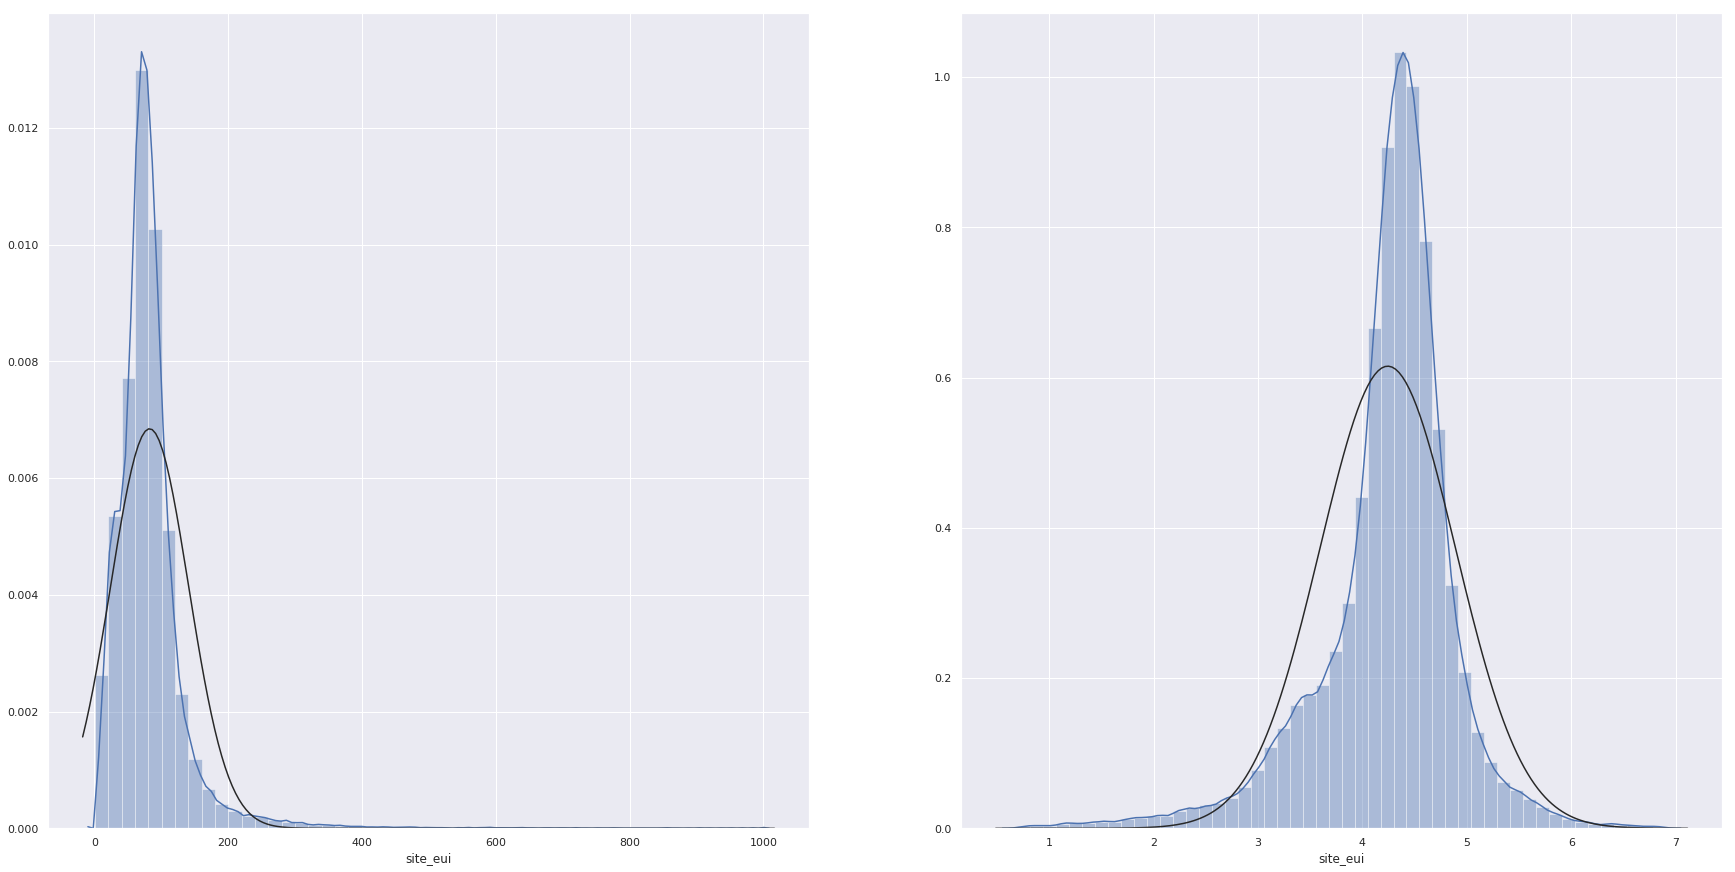

In [183]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(df_train['site_eui'], ax=ax[0], fit=norm)
sns.distplot(np.log(df_train[('site_eui')]+1), ax=ax[1], fit= norm)

# Data Engineering
We have to do some work to get the data into a format that will work with LightGBM. This covers:

<ul>
  <li>Handling categoricals</li>
  <li>Handling numericals</li>
  <li>Feature engineering - To generate new features</li>
</ul>

This would normally be packaged into some form of utility library as a separate step in the ML pipeline. In production setups this would typically be either Python or perhaps Spark for larger data sets.

## Basic data engineering
First lets define some useful functions. Again this *should* be encapsulated in an external function library. For simplicity these are defined here.

In [184]:
def fill_missing(df, cols, val):
    """ Fill with the supplied val """
    for col in cols:
        df[col] = df[col].fillna(val)

def fill_missing_with_mode(df, cols):
    """ Fill with the mode """
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
def addlogs(res, cols):
    """ Log transform feature list"""
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)   
        res.columns.values[m] = c + '_log'
        m += 1
    return res

In [185]:
df_train.iloc[:, 8:44].sample(3)

,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp
13044,-2,25.166667,50,2,29.711538,65,12,44.516129,73,23,49.017241,88,38,61.933333,94,42,73.400000,97,54,77.451613,96,54,77.887097,98,48,70.931034,96,34,57.758065,83,20,47.116667,76,-9,24.629032,54
19642,13,37.322581,62,20,40.879310,62,25,50.935484,78,38,54.766667,88,49,65.096774,89,51,70.983333,94,61,78.758065,100,61,76.693548,91,53,68.800000,91,38,58.048387,78,31,43.866667,66,28,41.467742,62
47014,8,29.854839,56,2,23.946429,43,12,38.096774,62,32,54.250000,80,48,68.516129,88,50,71.183333,90,64,78.790323,96,63,78.967742,95,56,74.450000,97,35,58.048387,78,32,52.783333,74,34,50.774194,72


In [186]:
df_train['year_avg_temp'] = (df_train['january_avg_temp']+ df_train['february_avg_temp']+ df_train['march_avg_temp']+df_train['april_avg_temp']+df_train['may_avg_temp']+df_train['june_avg_temp']+df_train['july_avg_temp']+df_train['august_avg_temp']+df_train['september_avg_temp']+df_train['october_avg_temp']+df_train['november_avg_temp']+df_train['december_avg_temp'])/12.0

In [187]:
df_train['year_max_temp']= df_train.iloc[:, 8:44].max(axis=1)

In [188]:
df_train['year_min_temp']= df_train.iloc[:, 8:44].min(axis=1)

In [189]:
#Get a sense of all integer features
numerics = ['int16', 'int32', 'int64']
newdf = df_train.select_dtypes(include=numerics)
pd.options.display.max_columns = None # Show all cols
newdf.sample(3)

,Year_Factor,january_min_temp,january_max_temp,february_min_temp,february_max_temp,march_min_temp,march_max_temp,april_min_temp,april_max_temp,may_min_temp,may_max_temp,june_min_temp,june_max_temp,july_min_temp,july_max_temp,august_min_temp,august_max_temp,september_min_temp,september_max_temp,october_min_temp,october_max_temp,november_min_temp,november_max_temp,december_min_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowdepth_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,id
32422,3,11,61,17,55,27,59,33,82,42,90,53,92,64,98,59,90,47,96,40,86,23,70,19,71,1272,4670,64,50,11,0,0,75,11,0,0,32422
74026,6,28,56,34,64,35,71,40,89,45,88,47,91,54,87,52,91,44,79,39,68,40,71,24,51,260,3772,1,6,0,0,0,25,3,0,0,74026
22975,2,13,62,20,62,25,78,38,88,49,89,51,94,61,100,61,91,53,91,38,78,31,66,28,62,1277,3978,10,22,5,0,0,72,17,0,0,22975


In [190]:
#Add Log transform columns for simple integer features.
loglist = ['january_min_temp','january_max_temp','february_min_temp','february_max_temp','march_min_temp','march_max_temp',
                 'april_min_temp','april_max_temp','may_min_temp','may_max_temp','june_min_temp',
                 'june_max_temp','july_min_temp','july_max_temp','august_min_temp','august_max_temp','september_min_temp',
                 'september_max_temp','october_min_temp','october_max_temp','november_min_temp','november_max_temp','december_min_temp',
                 'december_max_temp','cooling_degree_days','heating_degree_days','snowdepth_inches','days_below_30F','days_below_20F','days_below_10F',
                 'days_below_0F','days_above_80F','days_above_90F','days_above_100F']

df_train = addlogs(df_train, loglist)

/Users/qianlonglan/opt/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [191]:
#For sale price we have effectively a real valued number, 
#so we need to use log1p to ensure the log transform is accurate. 
#This is particularly important when the numbers are small but is just good practice for real numbers.
df_train["site_eui"] = np.log1p(df_train["site_eui"])

## Fill Missing Value
Follow the missing data shown before to fill missing values

This part can be improve later

<li>days_with_fog	60.451179
<li>direction_peak_wind_speed	55.190939
<li>max_wind_speed	54.228652
<li>direction_max_wind_speed	54.228652
<li>energy_star_rating	35.256148
<li>january_min_temp_log	5.683963
<li>december_min_temp_log	3.451826
<li>february_min_temp_log	3.437306
<li>year_built	2.424858
<li>march_min_temp_log	0.893647

In [192]:
fill_missing(df_train, ["january_min_temp_log", "december_min_temp_log", "february_min_temp_log", "march_min_temp_log"], 0)

fill_missing_with_mode(df_train, ["days_with_fog"])

# Drop column that is meaningless
# df_train.drop(['Utilities'], axis=1, inplace=True)

df_train["direction_peak_wind_speed"] = df_train["direction_peak_wind_speed"].transform(
    lambda x: x.fillna(x.median()))

df_train["max_wind_speed"] = df_train["max_wind_speed"].transform(
    lambda x: x.fillna(x.median()))

df_train["direction_max_wind_speed"] = df_train["direction_max_wind_speed"].transform(
    lambda x: x.fillna(x.median()))

df_train["energy_star_rating"] = df_train["energy_star_rating"].transform(
    lambda x: x.fillna(x.median()))


## Remove outliers
Remove outliers. These can seriously mess up a model so its best to either cap them, or drop them. Here we drop them.

In [193]:
# df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
# df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index, inplace=True)

# df_train.drop(df_train[(df_train['site_eui']>900)].index, inplace=True)
# df_train.drop(df_train[(df_train['site_eui']<15)].index, inplace=True)
# df_train.reset_index(drop=True, inplace=True)

And finally there are some fields that are categorical and we should not treat them as numbers. So we have to convert non-numeric -> string where approriate

In [194]:
df_train['State_Factor'] = df_train['State_Factor'].apply(str)
df_train['building_class'] = df_train['building_class'].astype(str)
df_train['facility_type'] = df_train['facility_type'].astype(str)

## Handle categoricals
First some util functions to dummy encode the categoricals. LightGBM can handle these natively but for now we do it manually as this could then easily be applied a pre process step for other algorithms.

In [195]:
def fix_missing_cols(in_train, in_test):
    missing_cols = set(in_train.columns) - set(in_test.columns)
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        in_test[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    in_test = in_test[in_train.columns]
    return in_test

def dummy_encode(in_df_train, in_df_test):
    df_train = in_df_train
    df_test = in_df_test
    categorical_feats = [
        f for f in df_train.columns if df_train[f].dtype == 'object'
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = pd.concat([df_test, pd.get_dummies(df_test[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = fix_missing_cols(df_train, df_test)
    return df_train, df_test



In [196]:
df_train, df_test = dummy_encode(df_train, df_test)
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

['State_Factor', 'building_class', 'facility_type']
Shape train: (75757, 167), test: (9705, 167)


## Additional Feature Engineering
Additional daa engineering often involves some complex computations. For small data sets like this its not a problem. For larger data sets you need to verify the performance vs the change in performance / accuracy after adding the features. This should be in terms of both accuracy and time to train. If there is a real benefit, then these can be applied but could be perhaps be done as a pre procesing step (eg via a Spark Job). This depends on the feature / data but the point is to ensure you test with and without the new feature.

### Interaction Terms
First generate some interaction terms based on the highest correlated features (these were pre-computed). 

See https://en.wikipedia.org/wiki/Interaction_(statistics)

Analysis of the features selected here showed they were more correlated (either +ve or -ve) with the sales price. This can be seen by looking using the [dataframe.corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method, then selecting the top N features. All the ones here had a positive correlation over 0.6.

In [197]:
def load_poly_features(df_train, df_test, cols):
    """
    USeful function to generate poly terms
    :param df_train: The training data frame
    :param df_test: The test data frame
    :return: df_poly_features, df_poly_features_test - The training polynomial features + the test
    """
    print('Loading polynomial features..')
    # Make a new dataframe for polynomial features
    poly_features = df_train[cols]
    poly_features_test = df_test[cols]

    # imputer for handling missing values
    imputer = Imputer(strategy='median')

    # Need to impute missing values
    poly_features = imputer.fit_transform(poly_features)
    poly_features_test = imputer.transform(poly_features_test)

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree=3)
    # Train the polynomial features
    poly_transformer.fit(poly_features)

    # Transform the features
    poly_features = poly_transformer.transform(poly_features)
    poly_features_test = poly_transformer.transform(poly_features_test)
    print('Polynomial Features shape: %s' % str(poly_features.shape))

    df_poly_features = pd.DataFrame(poly_features,
                                    columns=poly_transformer.get_feature_names(cols))
    df_poly_features_test = pd.DataFrame(poly_features_test,
                                         columns=poly_transformer.get_feature_names(cols))
    df_poly_features['Id'] = df_train['Id']
    df_poly_features_test['Id'] = df_test['Id']
    print('Loaded polynomial features')
    return df_poly_features, df_poly_features_test

In [198]:
# correlated_cols = ['january_min_temp','january_max_temp','february_min_temp','february_max_temp','march_min_temp','march_max_temp',
#                  'april_min_temp','april_max_temp','may_min_temp','may_max_temp','june_min_temp',
#                  'june_max_temp','july_min_temp','july_max_temp','august_min_temp','august_max_temp','september_min_temp',
#                  'september_max_temp','october_min_temp','october_max_temp','november_min_temp','november_max_temp','december_min_temp',
#                  'december_max_temp','cooling_degree_days','heating_degree_days','snowdepth_inches','days_below_30F','days_below_20F','days_below_10F',
#                  'days_below_0F','days_above_80F','days_above_90F','days_above_100F']
# df_train_poly, df_test_poly =  load_poly_features(df_train, df_test, cols=correlated_cols)
# print("Shape train: %s, test: %s" % (df_train_poly.shape, df_test_poly.shape))

In [199]:
# df_train = df_train.merge(right=df_train_poly.reset_index(), how='left', on='Id')
# df_test = df_test.merge(right=df_test_poly.reset_index(), how='left', on='Id')

In [200]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (75757, 167), test: (9705, 167)


So in the end our features have gone from the original 80 to 446. The number of records has slightly reduced as we dropped the outliers.

## Correlation

# Light GBM
Now lets run our regression!

First lets split up the data into our training data (X_train), our testing data frame (X_test) and our target variables that we want to predict for both training and testing (y_train and y_test respectively).

In [201]:
y = df_train["site_eui"]
y.sample(3)

28680    4.476543
31028    3.920382
6100     4.331080
Name: site_eui, dtype: float64

In [202]:
df_train.drop(["site_eui"], axis=1, inplace=True)
# The fix missing cols above will have added the target column to the test data frame, so this is a workaround to remove it


In [213]:
df_test.drop(["site_eui"], axis=1, inplace=True) 

In [214]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (75757, 166), test: (9705, 166)


In [215]:
#Split the data set into training and testing data with a fixed random value.
X_train, X_test, y_train, y_test = train_test_split( df_train, y, test_size=0.2, random_state=42)

The hyper parameter settings are below. The settings below are best on a few iterations of training with some guided attempts driven by the documentation on the LightGBM website. They are far from the optimum..

In a real application we would adjust these to see the impact on loss - over numerous iterations. This would either be manual or more likely use a tool like Optunity or Hyperopt, to run automated hyper parameter tuning.

In [216]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [217]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [218]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

/Users/qianlonglan/opt/anaconda3/envs/kaggle/lib/python3.5/site-packages/lightgbm/engine.py:111: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.44979	valid_0's l2: 0.416886
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l1: 0.448704	valid_0's l2: 0.414996
[3]	valid_0's l1: 0.447628	valid_0's l2: 0.41313
[4]	valid_0's l1: 0.446562	valid_0's l2: 0.411282
[5]	valid_0's l1: 0.445497	valid_0's l2: 0.40946
[6]	valid_0's l1: 0.444438	valid_0's l2: 0.407657
[7]	valid_0's l1: 0.443391	valid_0's l2: 0.405886
[8]	valid_0's l1: 0.442356	valid_0's l2: 0.404121
[9]	valid_0's l1: 0.441321	valid_0's l2: 0.402366
[10]	valid_0's l1: 0.440294	valid_0's l2: 0.400631
[11]	valid_0's l1: 0.439277	valid_0's l2: 0.398901
[12]	valid_0's l1: 0.438318	valid_0's l2: 0.397325
[13]	valid_0's l1: 0.437318	valid_0's l2: 0.395634
[14]	valid_0's l1: 0.436408	valid_0's l2: 0.394167
[15]	valid_0's l1: 0.435402	valid_0's l2: 0.392486
[16]	valid_0's l1: 0.434419	valid_0's l2: 0.390869
[17]	valid_0's l1: 0.433879	valid_0's l2: 0.389938
[18]	valid_0's l1: 0.432877	valid_0's l2: 0.388297
[19]	valid_0's l1: 0.431901	va

[172]	valid_0's l1: 0.339558	valid_0's l2: 0.256388
[173]	valid_0's l1: 0.339182	valid_0's l2: 0.255943
[174]	valid_0's l1: 0.338811	valid_0's l2: 0.255525
[175]	valid_0's l1: 0.338452	valid_0's l2: 0.255113
[176]	valid_0's l1: 0.338087	valid_0's l2: 0.254692
[177]	valid_0's l1: 0.337726	valid_0's l2: 0.254272
[178]	valid_0's l1: 0.337358	valid_0's l2: 0.253845
[179]	valid_0's l1: 0.33702	valid_0's l2: 0.253455
[180]	valid_0's l1: 0.336656	valid_0's l2: 0.253033
[181]	valid_0's l1: 0.336296	valid_0's l2: 0.252609
[182]	valid_0's l1: 0.335936	valid_0's l2: 0.25219
[183]	valid_0's l1: 0.335584	valid_0's l2: 0.25178
[184]	valid_0's l1: 0.33523	valid_0's l2: 0.251394
[185]	valid_0's l1: 0.334867	valid_0's l2: 0.250992
[186]	valid_0's l1: 0.33452	valid_0's l2: 0.250614
[187]	valid_0's l1: 0.334182	valid_0's l2: 0.250239
[188]	valid_0's l1: 0.33384	valid_0's l2: 0.249846
[189]	valid_0's l1: 0.333494	valid_0's l2: 0.249468
[190]	valid_0's l1: 0.333164	valid_0's l2: 0.2491
[191]	valid_0's l1: 

[337]	valid_0's l1: 0.300761	valid_0's l2: 0.215285
[338]	valid_0's l1: 0.300595	valid_0's l2: 0.215129
[339]	valid_0's l1: 0.300431	valid_0's l2: 0.214975
[340]	valid_0's l1: 0.30027	valid_0's l2: 0.214819
[341]	valid_0's l1: 0.300123	valid_0's l2: 0.214686
[342]	valid_0's l1: 0.299996	valid_0's l2: 0.214565
[343]	valid_0's l1: 0.299846	valid_0's l2: 0.214433
[344]	valid_0's l1: 0.299717	valid_0's l2: 0.214308
[345]	valid_0's l1: 0.299582	valid_0's l2: 0.21418
[346]	valid_0's l1: 0.299444	valid_0's l2: 0.214055
[347]	valid_0's l1: 0.299322	valid_0's l2: 0.213938
[348]	valid_0's l1: 0.299179	valid_0's l2: 0.213808
[349]	valid_0's l1: 0.299065	valid_0's l2: 0.213692
[350]	valid_0's l1: 0.298912	valid_0's l2: 0.213554
[351]	valid_0's l1: 0.298762	valid_0's l2: 0.21341
[352]	valid_0's l1: 0.298616	valid_0's l2: 0.213276
[353]	valid_0's l1: 0.298473	valid_0's l2: 0.213138
[354]	valid_0's l1: 0.29833	valid_0's l2: 0.213
[355]	valid_0's l1: 0.298192	valid_0's l2: 0.212868
[356]	valid_0's l1:

[498]	valid_0's l1: 0.284862	valid_0's l2: 0.20058
[499]	valid_0's l1: 0.284808	valid_0's l2: 0.200528
[500]	valid_0's l1: 0.284758	valid_0's l2: 0.200477
[501]	valid_0's l1: 0.284697	valid_0's l2: 0.200428
[502]	valid_0's l1: 0.284635	valid_0's l2: 0.200375
[503]	valid_0's l1: 0.28456	valid_0's l2: 0.200308
[504]	valid_0's l1: 0.284501	valid_0's l2: 0.200259
[505]	valid_0's l1: 0.284422	valid_0's l2: 0.200185
[506]	valid_0's l1: 0.284348	valid_0's l2: 0.200109
[507]	valid_0's l1: 0.284281	valid_0's l2: 0.200038
[508]	valid_0's l1: 0.284223	valid_0's l2: 0.199991
[509]	valid_0's l1: 0.284155	valid_0's l2: 0.199926
[510]	valid_0's l1: 0.284107	valid_0's l2: 0.199883
[511]	valid_0's l1: 0.284032	valid_0's l2: 0.199822
[512]	valid_0's l1: 0.283956	valid_0's l2: 0.19976
[513]	valid_0's l1: 0.283907	valid_0's l2: 0.199706
[514]	valid_0's l1: 0.283822	valid_0's l2: 0.199631
[515]	valid_0's l1: 0.283743	valid_0's l2: 0.199571
[516]	valid_0's l1: 0.283674	valid_0's l2: 0.199507
[517]	valid_0's

[677]	valid_0's l1: 0.276641	valid_0's l2: 0.192875
[678]	valid_0's l1: 0.276604	valid_0's l2: 0.192843
[679]	valid_0's l1: 0.276584	valid_0's l2: 0.19282
[680]	valid_0's l1: 0.276565	valid_0's l2: 0.192799
[681]	valid_0's l1: 0.276522	valid_0's l2: 0.192751
[682]	valid_0's l1: 0.276477	valid_0's l2: 0.192696
[683]	valid_0's l1: 0.276439	valid_0's l2: 0.192655
[684]	valid_0's l1: 0.276397	valid_0's l2: 0.192608
[685]	valid_0's l1: 0.276357	valid_0's l2: 0.192566
[686]	valid_0's l1: 0.276316	valid_0's l2: 0.192522
[687]	valid_0's l1: 0.27628	valid_0's l2: 0.192479
[688]	valid_0's l1: 0.276237	valid_0's l2: 0.192435
[689]	valid_0's l1: 0.276194	valid_0's l2: 0.192382
[690]	valid_0's l1: 0.276152	valid_0's l2: 0.192339
[691]	valid_0's l1: 0.276129	valid_0's l2: 0.192315
[692]	valid_0's l1: 0.276103	valid_0's l2: 0.19229
[693]	valid_0's l1: 0.276082	valid_0's l2: 0.192268
[694]	valid_0's l1: 0.276062	valid_0's l2: 0.19225
[695]	valid_0's l1: 0.276044	valid_0's l2: 0.19223
[696]	valid_0's l

[859]	valid_0's l1: 0.27266	valid_0's l2: 0.188969
[860]	valid_0's l1: 0.272643	valid_0's l2: 0.188957
[861]	valid_0's l1: 0.27262	valid_0's l2: 0.188933
[862]	valid_0's l1: 0.272599	valid_0's l2: 0.188918
[863]	valid_0's l1: 0.272577	valid_0's l2: 0.188895
[864]	valid_0's l1: 0.27255	valid_0's l2: 0.188865
[865]	valid_0's l1: 0.27253	valid_0's l2: 0.188844
[866]	valid_0's l1: 0.27251	valid_0's l2: 0.188822
[867]	valid_0's l1: 0.27249	valid_0's l2: 0.188803
[868]	valid_0's l1: 0.272469	valid_0's l2: 0.188779
[869]	valid_0's l1: 0.272449	valid_0's l2: 0.18876
[870]	valid_0's l1: 0.27243	valid_0's l2: 0.188736
[871]	valid_0's l1: 0.272418	valid_0's l2: 0.188724
[872]	valid_0's l1: 0.272406	valid_0's l2: 0.188714
[873]	valid_0's l1: 0.272392	valid_0's l2: 0.188702
[874]	valid_0's l1: 0.27238	valid_0's l2: 0.188692
[875]	valid_0's l1: 0.272369	valid_0's l2: 0.188684
[876]	valid_0's l1: 0.272358	valid_0's l2: 0.188674
[877]	valid_0's l1: 0.272345	valid_0's l2: 0.188663
[878]	valid_0's l1: 0

[1022]	valid_0's l1: 0.27023	valid_0's l2: 0.186505
[1023]	valid_0's l1: 0.27022	valid_0's l2: 0.186493
[1024]	valid_0's l1: 0.270208	valid_0's l2: 0.186483
[1025]	valid_0's l1: 0.270198	valid_0's l2: 0.186473
[1026]	valid_0's l1: 0.270186	valid_0's l2: 0.186457
[1027]	valid_0's l1: 0.270178	valid_0's l2: 0.186451
[1028]	valid_0's l1: 0.270166	valid_0's l2: 0.186435
[1029]	valid_0's l1: 0.270158	valid_0's l2: 0.186429
[1030]	valid_0's l1: 0.270151	valid_0's l2: 0.186423
[1031]	valid_0's l1: 0.270142	valid_0's l2: 0.186418
[1032]	valid_0's l1: 0.27013	valid_0's l2: 0.186408
[1033]	valid_0's l1: 0.27012	valid_0's l2: 0.186403
[1034]	valid_0's l1: 0.270111	valid_0's l2: 0.186398
[1035]	valid_0's l1: 0.2701	valid_0's l2: 0.186389
[1036]	valid_0's l1: 0.270091	valid_0's l2: 0.186383
[1037]	valid_0's l1: 0.270076	valid_0's l2: 0.18637
[1038]	valid_0's l1: 0.270066	valid_0's l2: 0.186362
[1039]	valid_0's l1: 0.27006	valid_0's l2: 0.186359
[1040]	valid_0's l1: 0.27005	valid_0's l2: 0.186352
[1

[1191]	valid_0's l1: 0.268445	valid_0's l2: 0.184564
[1192]	valid_0's l1: 0.268436	valid_0's l2: 0.184551
[1193]	valid_0's l1: 0.26843	valid_0's l2: 0.184544
[1194]	valid_0's l1: 0.268421	valid_0's l2: 0.184532
[1195]	valid_0's l1: 0.268413	valid_0's l2: 0.184519
[1196]	valid_0's l1: 0.268405	valid_0's l2: 0.184507
[1197]	valid_0's l1: 0.268395	valid_0's l2: 0.184491
[1198]	valid_0's l1: 0.268388	valid_0's l2: 0.184485
[1199]	valid_0's l1: 0.268381	valid_0's l2: 0.184477
[1200]	valid_0's l1: 0.268376	valid_0's l2: 0.184471
[1201]	valid_0's l1: 0.268368	valid_0's l2: 0.184462
[1202]	valid_0's l1: 0.268362	valid_0's l2: 0.184456
[1203]	valid_0's l1: 0.268356	valid_0's l2: 0.184448
[1204]	valid_0's l1: 0.268348	valid_0's l2: 0.184441
[1205]	valid_0's l1: 0.268343	valid_0's l2: 0.184433
[1206]	valid_0's l1: 0.268336	valid_0's l2: 0.184421
[1207]	valid_0's l1: 0.268329	valid_0's l2: 0.184414
[1208]	valid_0's l1: 0.268321	valid_0's l2: 0.184405
[1209]	valid_0's l1: 0.268316	valid_0's l2: 0.1

[1355]	valid_0's l1: 0.267012	valid_0's l2: 0.182946
[1356]	valid_0's l1: 0.267003	valid_0's l2: 0.182936
[1357]	valid_0's l1: 0.266994	valid_0's l2: 0.182925
[1358]	valid_0's l1: 0.266987	valid_0's l2: 0.182919
[1359]	valid_0's l1: 0.266981	valid_0's l2: 0.182913
[1360]	valid_0's l1: 0.266973	valid_0's l2: 0.182906
[1361]	valid_0's l1: 0.266967	valid_0's l2: 0.182901
[1362]	valid_0's l1: 0.26696	valid_0's l2: 0.182893
[1363]	valid_0's l1: 0.266949	valid_0's l2: 0.182874
[1364]	valid_0's l1: 0.266944	valid_0's l2: 0.182867
[1365]	valid_0's l1: 0.266937	valid_0's l2: 0.18286
[1366]	valid_0's l1: 0.26693	valid_0's l2: 0.182853
[1367]	valid_0's l1: 0.266921	valid_0's l2: 0.182843
[1368]	valid_0's l1: 0.266914	valid_0's l2: 0.182835
[1369]	valid_0's l1: 0.266906	valid_0's l2: 0.182827
[1370]	valid_0's l1: 0.2669	valid_0's l2: 0.182823
[1371]	valid_0's l1: 0.266885	valid_0's l2: 0.182809
[1372]	valid_0's l1: 0.266878	valid_0's l2: 0.182798
[1373]	valid_0's l1: 0.266872	valid_0's l2: 0.18278

[1523]	valid_0's l1: 0.265956	valid_0's l2: 0.181809
[1524]	valid_0's l1: 0.26595	valid_0's l2: 0.1818
[1525]	valid_0's l1: 0.265943	valid_0's l2: 0.18179
[1526]	valid_0's l1: 0.265931	valid_0's l2: 0.181779
[1527]	valid_0's l1: 0.265919	valid_0's l2: 0.181768
[1528]	valid_0's l1: 0.26591	valid_0's l2: 0.18176
[1529]	valid_0's l1: 0.265902	valid_0's l2: 0.181754
[1530]	valid_0's l1: 0.265893	valid_0's l2: 0.181742
[1531]	valid_0's l1: 0.265889	valid_0's l2: 0.181739
[1532]	valid_0's l1: 0.265886	valid_0's l2: 0.181736
[1533]	valid_0's l1: 0.265882	valid_0's l2: 0.181732
[1534]	valid_0's l1: 0.265876	valid_0's l2: 0.181724
[1535]	valid_0's l1: 0.265872	valid_0's l2: 0.18172
[1536]	valid_0's l1: 0.265869	valid_0's l2: 0.181715
[1537]	valid_0's l1: 0.265865	valid_0's l2: 0.181708
[1538]	valid_0's l1: 0.265863	valid_0's l2: 0.181706
[1539]	valid_0's l1: 0.265857	valid_0's l2: 0.181698
[1540]	valid_0's l1: 0.26585	valid_0's l2: 0.181689
[1541]	valid_0's l1: 0.265844	valid_0's l2: 0.181678
[

[1694]	valid_0's l1: 0.264802	valid_0's l2: 0.180409
[1695]	valid_0's l1: 0.264799	valid_0's l2: 0.180401
[1696]	valid_0's l1: 0.264797	valid_0's l2: 0.180397
[1697]	valid_0's l1: 0.264794	valid_0's l2: 0.18039
[1698]	valid_0's l1: 0.264792	valid_0's l2: 0.18038
[1699]	valid_0's l1: 0.264789	valid_0's l2: 0.180373
[1700]	valid_0's l1: 0.264785	valid_0's l2: 0.180364
[1701]	valid_0's l1: 0.264784	valid_0's l2: 0.180364
[1702]	valid_0's l1: 0.264782	valid_0's l2: 0.180362
[1703]	valid_0's l1: 0.26478	valid_0's l2: 0.180362
[1704]	valid_0's l1: 0.264778	valid_0's l2: 0.180362
[1705]	valid_0's l1: 0.264772	valid_0's l2: 0.18036
[1706]	valid_0's l1: 0.264771	valid_0's l2: 0.18036
[1707]	valid_0's l1: 0.26477	valid_0's l2: 0.18036
[1708]	valid_0's l1: 0.264768	valid_0's l2: 0.18036
[1709]	valid_0's l1: 0.264765	valid_0's l2: 0.180358
[1710]	valid_0's l1: 0.264762	valid_0's l2: 0.180356
[1711]	valid_0's l1: 0.264749	valid_0's l2: 0.180342
[1712]	valid_0's l1: 0.264742	valid_0's l2: 0.180337
[

[1856]	valid_0's l1: 0.26404	valid_0's l2: 0.17956
[1857]	valid_0's l1: 0.264039	valid_0's l2: 0.179558
[1858]	valid_0's l1: 0.264038	valid_0's l2: 0.179557
[1859]	valid_0's l1: 0.264037	valid_0's l2: 0.179556
[1860]	valid_0's l1: 0.264032	valid_0's l2: 0.179554
[1861]	valid_0's l1: 0.264028	valid_0's l2: 0.179549
[1862]	valid_0's l1: 0.264026	valid_0's l2: 0.179545
[1863]	valid_0's l1: 0.264022	valid_0's l2: 0.17954
[1864]	valid_0's l1: 0.264018	valid_0's l2: 0.179536
[1865]	valid_0's l1: 0.26401	valid_0's l2: 0.179529
[1866]	valid_0's l1: 0.264006	valid_0's l2: 0.179524
[1867]	valid_0's l1: 0.264003	valid_0's l2: 0.17952
[1868]	valid_0's l1: 0.263998	valid_0's l2: 0.179516
[1869]	valid_0's l1: 0.263995	valid_0's l2: 0.179512
[1870]	valid_0's l1: 0.263992	valid_0's l2: 0.179508
[1871]	valid_0's l1: 0.263985	valid_0's l2: 0.179497
[1872]	valid_0's l1: 0.263977	valid_0's l2: 0.179485
[1873]	valid_0's l1: 0.263972	valid_0's l2: 0.179473
[1874]	valid_0's l1: 0.263964	valid_0's l2: 0.17946

[2017]	valid_0's l1: 0.263438	valid_0's l2: 0.178776
[2018]	valid_0's l1: 0.263433	valid_0's l2: 0.178769
[2019]	valid_0's l1: 0.263429	valid_0's l2: 0.178759
[2020]	valid_0's l1: 0.263423	valid_0's l2: 0.17875
[2021]	valid_0's l1: 0.263421	valid_0's l2: 0.178747
[2022]	valid_0's l1: 0.263419	valid_0's l2: 0.178744
[2023]	valid_0's l1: 0.263417	valid_0's l2: 0.17874
[2024]	valid_0's l1: 0.263415	valid_0's l2: 0.178737
[2025]	valid_0's l1: 0.263416	valid_0's l2: 0.178734
[2026]	valid_0's l1: 0.263414	valid_0's l2: 0.178731
[2027]	valid_0's l1: 0.263413	valid_0's l2: 0.178729
[2028]	valid_0's l1: 0.263414	valid_0's l2: 0.178729
[2029]	valid_0's l1: 0.263412	valid_0's l2: 0.178725
[2030]	valid_0's l1: 0.263412	valid_0's l2: 0.178722
[2031]	valid_0's l1: 0.263407	valid_0's l2: 0.178718
[2032]	valid_0's l1: 0.2634	valid_0's l2: 0.17871
[2033]	valid_0's l1: 0.263394	valid_0's l2: 0.178702
[2034]	valid_0's l1: 0.263387	valid_0's l2: 0.178696
[2035]	valid_0's l1: 0.263382	valid_0's l2: 0.17869

[2176]	valid_0's l1: 0.262832	valid_0's l2: 0.177899
[2177]	valid_0's l1: 0.262831	valid_0's l2: 0.1779
[2178]	valid_0's l1: 0.262832	valid_0's l2: 0.177902
[2179]	valid_0's l1: 0.262831	valid_0's l2: 0.177902
[2180]	valid_0's l1: 0.262832	valid_0's l2: 0.177901
[2181]	valid_0's l1: 0.262822	valid_0's l2: 0.177889
[2182]	valid_0's l1: 0.262814	valid_0's l2: 0.177879
[2183]	valid_0's l1: 0.262803	valid_0's l2: 0.177866
[2184]	valid_0's l1: 0.262795	valid_0's l2: 0.177854
[2185]	valid_0's l1: 0.262786	valid_0's l2: 0.177844
[2186]	valid_0's l1: 0.262777	valid_0's l2: 0.177833
[2187]	valid_0's l1: 0.262768	valid_0's l2: 0.177823
[2188]	valid_0's l1: 0.26276	valid_0's l2: 0.177813
[2189]	valid_0's l1: 0.262753	valid_0's l2: 0.177803
[2190]	valid_0's l1: 0.262744	valid_0's l2: 0.177794
[2191]	valid_0's l1: 0.262742	valid_0's l2: 0.177789
[2192]	valid_0's l1: 0.26274	valid_0's l2: 0.177784
[2193]	valid_0's l1: 0.262738	valid_0's l2: 0.177778
[2194]	valid_0's l1: 0.262737	valid_0's l2: 0.1777

[2342]	valid_0's l1: 0.26232	valid_0's l2: 0.177317
[2343]	valid_0's l1: 0.262318	valid_0's l2: 0.177318
[2344]	valid_0's l1: 0.262316	valid_0's l2: 0.177316
[2345]	valid_0's l1: 0.262313	valid_0's l2: 0.177318
[2346]	valid_0's l1: 0.262309	valid_0's l2: 0.177315
[2347]	valid_0's l1: 0.262306	valid_0's l2: 0.177311
[2348]	valid_0's l1: 0.262303	valid_0's l2: 0.177309
[2349]	valid_0's l1: 0.2623	valid_0's l2: 0.177306
[2350]	valid_0's l1: 0.262297	valid_0's l2: 0.177305
[2351]	valid_0's l1: 0.262296	valid_0's l2: 0.177298
[2352]	valid_0's l1: 0.262289	valid_0's l2: 0.177286
[2353]	valid_0's l1: 0.262282	valid_0's l2: 0.177274
[2354]	valid_0's l1: 0.262275	valid_0's l2: 0.17726
[2355]	valid_0's l1: 0.262273	valid_0's l2: 0.177252
[2356]	valid_0's l1: 0.262273	valid_0's l2: 0.177251
[2357]	valid_0's l1: 0.262269	valid_0's l2: 0.17724
[2358]	valid_0's l1: 0.262267	valid_0's l2: 0.177237
[2359]	valid_0's l1: 0.26226	valid_0's l2: 0.177224
[2360]	valid_0's l1: 0.262256	valid_0's l2: 0.177215

[2510]	valid_0's l1: 0.261885	valid_0's l2: 0.176734
[2511]	valid_0's l1: 0.261885	valid_0's l2: 0.176732
[2512]	valid_0's l1: 0.261885	valid_0's l2: 0.176734
[2513]	valid_0's l1: 0.261883	valid_0's l2: 0.176735
[2514]	valid_0's l1: 0.261878	valid_0's l2: 0.176732
[2515]	valid_0's l1: 0.261877	valid_0's l2: 0.176735
[2516]	valid_0's l1: 0.261877	valid_0's l2: 0.176734
[2517]	valid_0's l1: 0.261875	valid_0's l2: 0.176734
[2518]	valid_0's l1: 0.261873	valid_0's l2: 0.176735
[2519]	valid_0's l1: 0.261872	valid_0's l2: 0.176737
[2520]	valid_0's l1: 0.261868	valid_0's l2: 0.176732
[2521]	valid_0's l1: 0.261869	valid_0's l2: 0.176732
[2522]	valid_0's l1: 0.261869	valid_0's l2: 0.176732
[2523]	valid_0's l1: 0.261869	valid_0's l2: 0.176731
[2524]	valid_0's l1: 0.261869	valid_0's l2: 0.176731
[2525]	valid_0's l1: 0.261869	valid_0's l2: 0.176731
[2526]	valid_0's l1: 0.26187	valid_0's l2: 0.17673
[2527]	valid_0's l1: 0.26187	valid_0's l2: 0.17673
[2528]	valid_0's l1: 0.26187	valid_0's l2: 0.17673

[2681]	valid_0's l1: 0.261522	valid_0's l2: 0.176256
[2682]	valid_0's l1: 0.26152	valid_0's l2: 0.176253
[2683]	valid_0's l1: 0.261519	valid_0's l2: 0.176251
[2684]	valid_0's l1: 0.261516	valid_0's l2: 0.176248
[2685]	valid_0's l1: 0.261517	valid_0's l2: 0.176246
[2686]	valid_0's l1: 0.261515	valid_0's l2: 0.176242
[2687]	valid_0's l1: 0.261512	valid_0's l2: 0.176238
[2688]	valid_0's l1: 0.261514	valid_0's l2: 0.176237
[2689]	valid_0's l1: 0.261512	valid_0's l2: 0.176236
[2690]	valid_0's l1: 0.26151	valid_0's l2: 0.176234
[2691]	valid_0's l1: 0.261509	valid_0's l2: 0.176233
[2692]	valid_0's l1: 0.261509	valid_0's l2: 0.176232
[2693]	valid_0's l1: 0.261509	valid_0's l2: 0.176231
[2694]	valid_0's l1: 0.261509	valid_0's l2: 0.176229
[2695]	valid_0's l1: 0.261508	valid_0's l2: 0.176228
[2696]	valid_0's l1: 0.261507	valid_0's l2: 0.176228
[2697]	valid_0's l1: 0.261507	valid_0's l2: 0.176227
[2698]	valid_0's l1: 0.261507	valid_0's l2: 0.176228
[2699]	valid_0's l1: 0.261507	valid_0's l2: 0.17

[2853]	valid_0's l1: 0.261175	valid_0's l2: 0.175716
[2854]	valid_0's l1: 0.261173	valid_0's l2: 0.175712
[2855]	valid_0's l1: 0.261167	valid_0's l2: 0.175708
[2856]	valid_0's l1: 0.261159	valid_0's l2: 0.175701
[2857]	valid_0's l1: 0.261154	valid_0's l2: 0.175691
[2858]	valid_0's l1: 0.261152	valid_0's l2: 0.175689
[2859]	valid_0's l1: 0.261148	valid_0's l2: 0.175685
[2860]	valid_0's l1: 0.261144	valid_0's l2: 0.175681
[2861]	valid_0's l1: 0.261141	valid_0's l2: 0.175678
[2862]	valid_0's l1: 0.26114	valid_0's l2: 0.175676
[2863]	valid_0's l1: 0.261138	valid_0's l2: 0.175671
[2864]	valid_0's l1: 0.261136	valid_0's l2: 0.175668
[2865]	valid_0's l1: 0.261133	valid_0's l2: 0.175661
[2866]	valid_0's l1: 0.261131	valid_0's l2: 0.175659
[2867]	valid_0's l1: 0.261129	valid_0's l2: 0.17566
[2868]	valid_0's l1: 0.261129	valid_0's l2: 0.175656
[2869]	valid_0's l1: 0.261128	valid_0's l2: 0.175655
[2870]	valid_0's l1: 0.261127	valid_0's l2: 0.175654
[2871]	valid_0's l1: 0.261124	valid_0's l2: 0.17

[3024]	valid_0's l1: 0.260943	valid_0's l2: 0.175316
[3025]	valid_0's l1: 0.260945	valid_0's l2: 0.17532
[3026]	valid_0's l1: 0.260946	valid_0's l2: 0.175322
[3027]	valid_0's l1: 0.260946	valid_0's l2: 0.175328
[3028]	valid_0's l1: 0.260947	valid_0's l2: 0.17533
[3029]	valid_0's l1: 0.260946	valid_0's l2: 0.175333
[3030]	valid_0's l1: 0.260945	valid_0's l2: 0.175333
[3031]	valid_0's l1: 0.260946	valid_0's l2: 0.175335
[3032]	valid_0's l1: 0.260945	valid_0's l2: 0.175337
[3033]	valid_0's l1: 0.260945	valid_0's l2: 0.17534
[3034]	valid_0's l1: 0.260945	valid_0's l2: 0.175342
[3035]	valid_0's l1: 0.260947	valid_0's l2: 0.175341
[3036]	valid_0's l1: 0.260947	valid_0's l2: 0.175341
[3037]	valid_0's l1: 0.260948	valid_0's l2: 0.175342
[3038]	valid_0's l1: 0.260944	valid_0's l2: 0.17534
[3039]	valid_0's l1: 0.260945	valid_0's l2: 0.17534
[3040]	valid_0's l1: 0.260945	valid_0's l2: 0.175342
[3041]	valid_0's l1: 0.260942	valid_0's l2: 0.17534
[3042]	valid_0's l1: 0.26094	valid_0's l2: 0.175338


[3193]	valid_0's l1: 0.260703	valid_0's l2: 0.174984
[3194]	valid_0's l1: 0.2607	valid_0's l2: 0.17498
[3195]	valid_0's l1: 0.260697	valid_0's l2: 0.174975
[3196]	valid_0's l1: 0.260695	valid_0's l2: 0.174972
[3197]	valid_0's l1: 0.260692	valid_0's l2: 0.174968
[3198]	valid_0's l1: 0.26069	valid_0's l2: 0.174964
[3199]	valid_0's l1: 0.260688	valid_0's l2: 0.174961
[3200]	valid_0's l1: 0.260685	valid_0's l2: 0.174957
[3201]	valid_0's l1: 0.260683	valid_0's l2: 0.174951
[3202]	valid_0's l1: 0.260682	valid_0's l2: 0.174945
[3203]	valid_0's l1: 0.260679	valid_0's l2: 0.174939
[3204]	valid_0's l1: 0.260677	valid_0's l2: 0.174932
[3205]	valid_0's l1: 0.260674	valid_0's l2: 0.174925
[3206]	valid_0's l1: 0.260673	valid_0's l2: 0.174921
[3207]	valid_0's l1: 0.260671	valid_0's l2: 0.174915
[3208]	valid_0's l1: 0.260667	valid_0's l2: 0.174907
[3209]	valid_0's l1: 0.260665	valid_0's l2: 0.174904
[3210]	valid_0's l1: 0.260663	valid_0's l2: 0.174898
[3211]	valid_0's l1: 0.26066	valid_0's l2: 0.17489

[3372]	valid_0's l1: 0.260461	valid_0's l2: 0.174536
[3373]	valid_0's l1: 0.260461	valid_0's l2: 0.174535
[3374]	valid_0's l1: 0.260461	valid_0's l2: 0.174533
[3375]	valid_0's l1: 0.260461	valid_0's l2: 0.174532
[3376]	valid_0's l1: 0.260461	valid_0's l2: 0.174528
[3377]	valid_0's l1: 0.260461	valid_0's l2: 0.174524
[3378]	valid_0's l1: 0.26046	valid_0's l2: 0.174521
[3379]	valid_0's l1: 0.260458	valid_0's l2: 0.174515
[3380]	valid_0's l1: 0.260457	valid_0's l2: 0.174511
[3381]	valid_0's l1: 0.260453	valid_0's l2: 0.174509
[3382]	valid_0's l1: 0.260451	valid_0's l2: 0.174506
[3383]	valid_0's l1: 0.260447	valid_0's l2: 0.174504
[3384]	valid_0's l1: 0.260448	valid_0's l2: 0.174504
[3385]	valid_0's l1: 0.260443	valid_0's l2: 0.174501
[3386]	valid_0's l1: 0.26044	valid_0's l2: 0.174498
[3387]	valid_0's l1: 0.260438	valid_0's l2: 0.174495
[3388]	valid_0's l1: 0.260434	valid_0's l2: 0.174494
[3389]	valid_0's l1: 0.26043	valid_0's l2: 0.174491
[3390]	valid_0's l1: 0.26043	valid_0's l2: 0.1744

[3542]	valid_0's l1: 0.260166	valid_0's l2: 0.174129
[3543]	valid_0's l1: 0.260165	valid_0's l2: 0.174127
[3544]	valid_0's l1: 0.260164	valid_0's l2: 0.174126
[3545]	valid_0's l1: 0.260161	valid_0's l2: 0.174123
[3546]	valid_0's l1: 0.260158	valid_0's l2: 0.174116
[3547]	valid_0's l1: 0.260156	valid_0's l2: 0.174112
[3548]	valid_0's l1: 0.260156	valid_0's l2: 0.17411
[3549]	valid_0's l1: 0.260155	valid_0's l2: 0.174106
[3550]	valid_0's l1: 0.260152	valid_0's l2: 0.174102
[3551]	valid_0's l1: 0.260151	valid_0's l2: 0.174101
[3552]	valid_0's l1: 0.260149	valid_0's l2: 0.174101
[3553]	valid_0's l1: 0.260149	valid_0's l2: 0.174101
[3554]	valid_0's l1: 0.260148	valid_0's l2: 0.174101
[3555]	valid_0's l1: 0.260148	valid_0's l2: 0.174102
[3556]	valid_0's l1: 0.260149	valid_0's l2: 0.174102
[3557]	valid_0's l1: 0.260148	valid_0's l2: 0.174102
[3558]	valid_0's l1: 0.260147	valid_0's l2: 0.1741
[3559]	valid_0's l1: 0.260147	valid_0's l2: 0.174099
[3560]	valid_0's l1: 0.260147	valid_0's l2: 0.174

[3718]	valid_0's l1: 0.259918	valid_0's l2: 0.173705
[3719]	valid_0's l1: 0.259915	valid_0's l2: 0.173699
[3720]	valid_0's l1: 0.259911	valid_0's l2: 0.17369
[3721]	valid_0's l1: 0.259911	valid_0's l2: 0.173689
[3722]	valid_0's l1: 0.259911	valid_0's l2: 0.173689
[3723]	valid_0's l1: 0.259911	valid_0's l2: 0.173689
[3724]	valid_0's l1: 0.259911	valid_0's l2: 0.173688
[3725]	valid_0's l1: 0.259911	valid_0's l2: 0.173687
[3726]	valid_0's l1: 0.259911	valid_0's l2: 0.173686
[3727]	valid_0's l1: 0.259911	valid_0's l2: 0.173686
[3728]	valid_0's l1: 0.259911	valid_0's l2: 0.173686
[3729]	valid_0's l1: 0.259911	valid_0's l2: 0.173686
[3730]	valid_0's l1: 0.259911	valid_0's l2: 0.173685
[3731]	valid_0's l1: 0.259909	valid_0's l2: 0.173684
[3732]	valid_0's l1: 0.259906	valid_0's l2: 0.173678
[3733]	valid_0's l1: 0.259906	valid_0's l2: 0.173677
[3734]	valid_0's l1: 0.259904	valid_0's l2: 0.173675
[3735]	valid_0's l1: 0.259902	valid_0's l2: 0.173673
[3736]	valid_0's l1: 0.259901	valid_0's l2: 0.1

[3887]	valid_0's l1: 0.259691	valid_0's l2: 0.17343
[3888]	valid_0's l1: 0.259692	valid_0's l2: 0.173428
[3889]	valid_0's l1: 0.259691	valid_0's l2: 0.173427
[3890]	valid_0's l1: 0.259692	valid_0's l2: 0.173425
[3891]	valid_0's l1: 0.259687	valid_0's l2: 0.173415
[3892]	valid_0's l1: 0.259684	valid_0's l2: 0.173405
[3893]	valid_0's l1: 0.259682	valid_0's l2: 0.173397
[3894]	valid_0's l1: 0.259681	valid_0's l2: 0.17339
[3895]	valid_0's l1: 0.259676	valid_0's l2: 0.173381
[3896]	valid_0's l1: 0.259677	valid_0's l2: 0.173378
[3897]	valid_0's l1: 0.259675	valid_0's l2: 0.173373
[3898]	valid_0's l1: 0.259676	valid_0's l2: 0.173374
[3899]	valid_0's l1: 0.259672	valid_0's l2: 0.173366
[3900]	valid_0's l1: 0.259671	valid_0's l2: 0.173358
[3901]	valid_0's l1: 0.259669	valid_0's l2: 0.173356
[3902]	valid_0's l1: 0.259667	valid_0's l2: 0.173354
[3903]	valid_0's l1: 0.259665	valid_0's l2: 0.173352
[3904]	valid_0's l1: 0.259663	valid_0's l2: 0.17335
[3905]	valid_0's l1: 0.259662	valid_0's l2: 0.173

[4057]	valid_0's l1: 0.259527	valid_0's l2: 0.173113
[4058]	valid_0's l1: 0.259527	valid_0's l2: 0.17311
[4059]	valid_0's l1: 0.259526	valid_0's l2: 0.173108
[4060]	valid_0's l1: 0.259523	valid_0's l2: 0.173103
[4061]	valid_0's l1: 0.259524	valid_0's l2: 0.173103
[4062]	valid_0's l1: 0.259526	valid_0's l2: 0.173103
[4063]	valid_0's l1: 0.259527	valid_0's l2: 0.173102
[4064]	valid_0's l1: 0.259528	valid_0's l2: 0.173101
[4065]	valid_0's l1: 0.259529	valid_0's l2: 0.1731
[4066]	valid_0's l1: 0.25953	valid_0's l2: 0.173099
[4067]	valid_0's l1: 0.259531	valid_0's l2: 0.173097
[4068]	valid_0's l1: 0.259531	valid_0's l2: 0.173093
[4069]	valid_0's l1: 0.259533	valid_0's l2: 0.173094
[4070]	valid_0's l1: 0.259534	valid_0's l2: 0.173093
[4071]	valid_0's l1: 0.259532	valid_0's l2: 0.17309
[4072]	valid_0's l1: 0.259531	valid_0's l2: 0.173087
[4073]	valid_0's l1: 0.25953	valid_0's l2: 0.173085
[4074]	valid_0's l1: 0.25953	valid_0's l2: 0.173082
[4075]	valid_0's l1: 0.25953	valid_0's l2: 0.17308
[4

[4230]	valid_0's l1: 0.259421	valid_0's l2: 0.172847
[4231]	valid_0's l1: 0.259422	valid_0's l2: 0.172848
[4232]	valid_0's l1: 0.259423	valid_0's l2: 0.172849
[4233]	valid_0's l1: 0.259424	valid_0's l2: 0.172849
[4234]	valid_0's l1: 0.259426	valid_0's l2: 0.17285
[4235]	valid_0's l1: 0.259426	valid_0's l2: 0.172848
[4236]	valid_0's l1: 0.259427	valid_0's l2: 0.172849
[4237]	valid_0's l1: 0.259428	valid_0's l2: 0.17285
[4238]	valid_0's l1: 0.259429	valid_0's l2: 0.172854
[4239]	valid_0's l1: 0.259431	valid_0's l2: 0.172854
[4240]	valid_0's l1: 0.259432	valid_0's l2: 0.172859
[4241]	valid_0's l1: 0.259432	valid_0's l2: 0.172858
[4242]	valid_0's l1: 0.259428	valid_0's l2: 0.172855
[4243]	valid_0's l1: 0.259428	valid_0's l2: 0.172854
[4244]	valid_0's l1: 0.259426	valid_0's l2: 0.172852
[4245]	valid_0's l1: 0.259423	valid_0's l2: 0.172847
[4246]	valid_0's l1: 0.259421	valid_0's l2: 0.172845
[4247]	valid_0's l1: 0.259418	valid_0's l2: 0.172839
[4248]	valid_0's l1: 0.259418	valid_0's l2: 0.17

[4405]	valid_0's l1: 0.259269	valid_0's l2: 0.172564
[4406]	valid_0's l1: 0.259269	valid_0's l2: 0.172566
[4407]	valid_0's l1: 0.259268	valid_0's l2: 0.172567
[4408]	valid_0's l1: 0.259268	valid_0's l2: 0.172568
[4409]	valid_0's l1: 0.259268	valid_0's l2: 0.17257
[4410]	valid_0's l1: 0.259268	valid_0's l2: 0.17257
[4411]	valid_0's l1: 0.259266	valid_0's l2: 0.172569
[4412]	valid_0's l1: 0.259265	valid_0's l2: 0.172569
[4413]	valid_0's l1: 0.259266	valid_0's l2: 0.172569
[4414]	valid_0's l1: 0.259264	valid_0's l2: 0.172568
[4415]	valid_0's l1: 0.259262	valid_0's l2: 0.172567
[4416]	valid_0's l1: 0.259261	valid_0's l2: 0.172566
[4417]	valid_0's l1: 0.259259	valid_0's l2: 0.172564
[4418]	valid_0's l1: 0.259258	valid_0's l2: 0.172564
[4419]	valid_0's l1: 0.259255	valid_0's l2: 0.172564
[4420]	valid_0's l1: 0.259257	valid_0's l2: 0.172565
[4421]	valid_0's l1: 0.259256	valid_0's l2: 0.172564
[4422]	valid_0's l1: 0.259256	valid_0's l2: 0.172562
[4423]	valid_0's l1: 0.259255	valid_0's l2: 0.17

[4586]	valid_0's l1: 0.259051	valid_0's l2: 0.172268
[4587]	valid_0's l1: 0.259053	valid_0's l2: 0.172265
[4588]	valid_0's l1: 0.259053	valid_0's l2: 0.172262
[4589]	valid_0's l1: 0.259053	valid_0's l2: 0.172259
[4590]	valid_0's l1: 0.259053	valid_0's l2: 0.172256
[4591]	valid_0's l1: 0.259053	valid_0's l2: 0.172254
[4592]	valid_0's l1: 0.259053	valid_0's l2: 0.172253
[4593]	valid_0's l1: 0.259052	valid_0's l2: 0.17225
[4594]	valid_0's l1: 0.259051	valid_0's l2: 0.172249
[4595]	valid_0's l1: 0.259052	valid_0's l2: 0.172247
[4596]	valid_0's l1: 0.259051	valid_0's l2: 0.172246
[4597]	valid_0's l1: 0.25905	valid_0's l2: 0.172243
[4598]	valid_0's l1: 0.259052	valid_0's l2: 0.172243
[4599]	valid_0's l1: 0.259051	valid_0's l2: 0.172242
[4600]	valid_0's l1: 0.259052	valid_0's l2: 0.172242
[4601]	valid_0's l1: 0.259049	valid_0's l2: 0.172239
[4602]	valid_0's l1: 0.259048	valid_0's l2: 0.172237
[4603]	valid_0's l1: 0.259046	valid_0's l2: 0.172234
[4604]	valid_0's l1: 0.259044	valid_0's l2: 0.17

[4751]	valid_0's l1: 0.259009	valid_0's l2: 0.172146
[4752]	valid_0's l1: 0.259008	valid_0's l2: 0.172145
[4753]	valid_0's l1: 0.259005	valid_0's l2: 0.172143
[4754]	valid_0's l1: 0.259003	valid_0's l2: 0.172144
[4755]	valid_0's l1: 0.259	valid_0's l2: 0.172143
[4756]	valid_0's l1: 0.258999	valid_0's l2: 0.172142
[4757]	valid_0's l1: 0.258996	valid_0's l2: 0.172139
[4758]	valid_0's l1: 0.258994	valid_0's l2: 0.172137
[4759]	valid_0's l1: 0.258992	valid_0's l2: 0.172136
[4760]	valid_0's l1: 0.258989	valid_0's l2: 0.172133
[4761]	valid_0's l1: 0.258988	valid_0's l2: 0.172129
[4762]	valid_0's l1: 0.258987	valid_0's l2: 0.172126
[4763]	valid_0's l1: 0.258986	valid_0's l2: 0.172124
[4764]	valid_0's l1: 0.258985	valid_0's l2: 0.172121
[4765]	valid_0's l1: 0.258983	valid_0's l2: 0.172119
[4766]	valid_0's l1: 0.258982	valid_0's l2: 0.172116
[4767]	valid_0's l1: 0.258981	valid_0's l2: 0.172114
[4768]	valid_0's l1: 0.25898	valid_0's l2: 0.172112
[4769]	valid_0's l1: 0.258979	valid_0's l2: 0.1721

[4916]	valid_0's l1: 0.258806	valid_0's l2: 0.171826
[4917]	valid_0's l1: 0.258805	valid_0's l2: 0.171826
[4918]	valid_0's l1: 0.258805	valid_0's l2: 0.171826
[4919]	valid_0's l1: 0.258804	valid_0's l2: 0.171826
[4920]	valid_0's l1: 0.258804	valid_0's l2: 0.171826
[4921]	valid_0's l1: 0.258804	valid_0's l2: 0.171826
[4922]	valid_0's l1: 0.258802	valid_0's l2: 0.171823
[4923]	valid_0's l1: 0.258802	valid_0's l2: 0.171822
[4924]	valid_0's l1: 0.2588	valid_0's l2: 0.171819
[4925]	valid_0's l1: 0.2588	valid_0's l2: 0.171818
[4926]	valid_0's l1: 0.258799	valid_0's l2: 0.171816
[4927]	valid_0's l1: 0.258798	valid_0's l2: 0.171814
[4928]	valid_0's l1: 0.258796	valid_0's l2: 0.171811
[4929]	valid_0's l1: 0.258795	valid_0's l2: 0.171808
[4930]	valid_0's l1: 0.258793	valid_0's l2: 0.171806
[4931]	valid_0's l1: 0.258792	valid_0's l2: 0.171803
[4932]	valid_0's l1: 0.258791	valid_0's l2: 0.171801
[4933]	valid_0's l1: 0.258789	valid_0's l2: 0.1718
[4934]	valid_0's l1: 0.258788	valid_0's l2: 0.171799

[5091]	valid_0's l1: 0.25855	valid_0's l2: 0.171467
[5092]	valid_0's l1: 0.25855	valid_0's l2: 0.171467
[5093]	valid_0's l1: 0.25855	valid_0's l2: 0.171465
[5094]	valid_0's l1: 0.25855	valid_0's l2: 0.171465
[5095]	valid_0's l1: 0.25855	valid_0's l2: 0.171465
[5096]	valid_0's l1: 0.25855	valid_0's l2: 0.171464
[5097]	valid_0's l1: 0.25855	valid_0's l2: 0.171464
[5098]	valid_0's l1: 0.25855	valid_0's l2: 0.171464
[5099]	valid_0's l1: 0.25855	valid_0's l2: 0.171464
[5100]	valid_0's l1: 0.25855	valid_0's l2: 0.171464
[5101]	valid_0's l1: 0.258549	valid_0's l2: 0.171462
[5102]	valid_0's l1: 0.258548	valid_0's l2: 0.17146
[5103]	valid_0's l1: 0.258547	valid_0's l2: 0.171459
[5104]	valid_0's l1: 0.258545	valid_0's l2: 0.171457
[5105]	valid_0's l1: 0.258543	valid_0's l2: 0.171456
[5106]	valid_0's l1: 0.258542	valid_0's l2: 0.171455
[5107]	valid_0's l1: 0.258539	valid_0's l2: 0.171452
[5108]	valid_0's l1: 0.258537	valid_0's l2: 0.17145
[5109]	valid_0's l1: 0.258535	valid_0's l2: 0.171446
[5110

[5270]	valid_0's l1: 0.258391	valid_0's l2: 0.171241
[5271]	valid_0's l1: 0.258389	valid_0's l2: 0.17124
[5272]	valid_0's l1: 0.258387	valid_0's l2: 0.171238
[5273]	valid_0's l1: 0.258387	valid_0's l2: 0.171237
[5274]	valid_0's l1: 0.258386	valid_0's l2: 0.171236
[5275]	valid_0's l1: 0.258385	valid_0's l2: 0.171235
[5276]	valid_0's l1: 0.258383	valid_0's l2: 0.171233
[5277]	valid_0's l1: 0.258382	valid_0's l2: 0.171232
[5278]	valid_0's l1: 0.258382	valid_0's l2: 0.171232
[5279]	valid_0's l1: 0.258381	valid_0's l2: 0.171231
[5280]	valid_0's l1: 0.258381	valid_0's l2: 0.17123
[5281]	valid_0's l1: 0.258382	valid_0's l2: 0.17123
[5282]	valid_0's l1: 0.258382	valid_0's l2: 0.17123
[5283]	valid_0's l1: 0.258383	valid_0's l2: 0.17123
[5284]	valid_0's l1: 0.258384	valid_0's l2: 0.17123
[5285]	valid_0's l1: 0.258384	valid_0's l2: 0.17123
[5286]	valid_0's l1: 0.258385	valid_0's l2: 0.17123
[5287]	valid_0's l1: 0.258385	valid_0's l2: 0.17123
[5288]	valid_0's l1: 0.258385	valid_0's l2: 0.17123
[52

[5445]	valid_0's l1: 0.258288	valid_0's l2: 0.171093
[5446]	valid_0's l1: 0.258289	valid_0's l2: 0.171095
[5447]	valid_0's l1: 0.258286	valid_0's l2: 0.171092
[5448]	valid_0's l1: 0.258284	valid_0's l2: 0.171091
[5449]	valid_0's l1: 0.258284	valid_0's l2: 0.17109
[5450]	valid_0's l1: 0.258283	valid_0's l2: 0.17109
[5451]	valid_0's l1: 0.258281	valid_0's l2: 0.171088
[5452]	valid_0's l1: 0.25828	valid_0's l2: 0.171086
[5453]	valid_0's l1: 0.258277	valid_0's l2: 0.171082
[5454]	valid_0's l1: 0.258276	valid_0's l2: 0.171082
[5455]	valid_0's l1: 0.258274	valid_0's l2: 0.17108
[5456]	valid_0's l1: 0.258275	valid_0's l2: 0.171081
[5457]	valid_0's l1: 0.258275	valid_0's l2: 0.171079
[5458]	valid_0's l1: 0.258273	valid_0's l2: 0.171076
[5459]	valid_0's l1: 0.258272	valid_0's l2: 0.171075
[5460]	valid_0's l1: 0.258272	valid_0's l2: 0.171073
[5461]	valid_0's l1: 0.258269	valid_0's l2: 0.17107
[5462]	valid_0's l1: 0.258266	valid_0's l2: 0.171068
[5463]	valid_0's l1: 0.258263	valid_0's l2: 0.17106

[5609]	valid_0's l1: 0.258138	valid_0's l2: 0.170915
[5610]	valid_0's l1: 0.258139	valid_0's l2: 0.170915
[5611]	valid_0's l1: 0.258138	valid_0's l2: 0.170913
[5612]	valid_0's l1: 0.258138	valid_0's l2: 0.170915
[5613]	valid_0's l1: 0.258136	valid_0's l2: 0.170912
[5614]	valid_0's l1: 0.258135	valid_0's l2: 0.17091
[5615]	valid_0's l1: 0.258135	valid_0's l2: 0.170911
[5616]	valid_0's l1: 0.258135	valid_0's l2: 0.170908
[5617]	valid_0's l1: 0.258134	valid_0's l2: 0.170904
[5618]	valid_0's l1: 0.258133	valid_0's l2: 0.170901
[5619]	valid_0's l1: 0.258132	valid_0's l2: 0.170902
[5620]	valid_0's l1: 0.258132	valid_0's l2: 0.170902
[5621]	valid_0's l1: 0.258134	valid_0's l2: 0.170902
[5622]	valid_0's l1: 0.258134	valid_0's l2: 0.170902
[5623]	valid_0's l1: 0.258135	valid_0's l2: 0.170902
[5624]	valid_0's l1: 0.258136	valid_0's l2: 0.170901
[5625]	valid_0's l1: 0.258138	valid_0's l2: 0.170906
[5626]	valid_0's l1: 0.258139	valid_0's l2: 0.170906
[5627]	valid_0's l1: 0.25814	valid_0's l2: 0.17

[5781]	valid_0's l1: 0.258091	valid_0's l2: 0.170784
[5782]	valid_0's l1: 0.25809	valid_0's l2: 0.170779
[5783]	valid_0's l1: 0.258087	valid_0's l2: 0.170775
[5784]	valid_0's l1: 0.258084	valid_0's l2: 0.17077
[5785]	valid_0's l1: 0.258082	valid_0's l2: 0.170767
[5786]	valid_0's l1: 0.258081	valid_0's l2: 0.170764
[5787]	valid_0's l1: 0.258078	valid_0's l2: 0.17076
[5788]	valid_0's l1: 0.258076	valid_0's l2: 0.170756
[5789]	valid_0's l1: 0.258074	valid_0's l2: 0.170752
[5790]	valid_0's l1: 0.258072	valid_0's l2: 0.17075
[5791]	valid_0's l1: 0.258073	valid_0's l2: 0.170745
[5792]	valid_0's l1: 0.258073	valid_0's l2: 0.170741
[5793]	valid_0's l1: 0.258073	valid_0's l2: 0.170737
[5794]	valid_0's l1: 0.258073	valid_0's l2: 0.170733
[5795]	valid_0's l1: 0.258073	valid_0's l2: 0.170729
[5796]	valid_0's l1: 0.258073	valid_0's l2: 0.170725
[5797]	valid_0's l1: 0.258073	valid_0's l2: 0.170722
[5798]	valid_0's l1: 0.258071	valid_0's l2: 0.170716
[5799]	valid_0's l1: 0.258071	valid_0's l2: 0.1707

[5958]	valid_0's l1: 0.258031	valid_0's l2: 0.170652
[5959]	valid_0's l1: 0.258027	valid_0's l2: 0.17065
[5960]	valid_0's l1: 0.258024	valid_0's l2: 0.17065
[5961]	valid_0's l1: 0.258023	valid_0's l2: 0.170649
[5962]	valid_0's l1: 0.258023	valid_0's l2: 0.170648
[5963]	valid_0's l1: 0.258022	valid_0's l2: 0.170647
[5964]	valid_0's l1: 0.258023	valid_0's l2: 0.170647
[5965]	valid_0's l1: 0.258022	valid_0's l2: 0.170645
[5966]	valid_0's l1: 0.258022	valid_0's l2: 0.170644
[5967]	valid_0's l1: 0.258022	valid_0's l2: 0.170643
[5968]	valid_0's l1: 0.25802	valid_0's l2: 0.170641
[5969]	valid_0's l1: 0.25802	valid_0's l2: 0.17064
[5970]	valid_0's l1: 0.258019	valid_0's l2: 0.170639
[5971]	valid_0's l1: 0.258016	valid_0's l2: 0.170637
[5972]	valid_0's l1: 0.258012	valid_0's l2: 0.170635
[5973]	valid_0's l1: 0.25801	valid_0's l2: 0.170633
[5974]	valid_0's l1: 0.258008	valid_0's l2: 0.170631
[5975]	valid_0's l1: 0.258004	valid_0's l2: 0.170626
[5976]	valid_0's l1: 0.258002	valid_0's l2: 0.170625

[6136]	valid_0's l1: 0.257864	valid_0's l2: 0.170444
[6137]	valid_0's l1: 0.257863	valid_0's l2: 0.170442
[6138]	valid_0's l1: 0.257863	valid_0's l2: 0.170437
[6139]	valid_0's l1: 0.257862	valid_0's l2: 0.170434
[6140]	valid_0's l1: 0.257862	valid_0's l2: 0.17043
[6141]	valid_0's l1: 0.257862	valid_0's l2: 0.170428
[6142]	valid_0's l1: 0.257861	valid_0's l2: 0.170426
[6143]	valid_0's l1: 0.257856	valid_0's l2: 0.170421
[6144]	valid_0's l1: 0.257856	valid_0's l2: 0.170419
[6145]	valid_0's l1: 0.257855	valid_0's l2: 0.170418
[6146]	valid_0's l1: 0.257854	valid_0's l2: 0.170416
[6147]	valid_0's l1: 0.257855	valid_0's l2: 0.170415
[6148]	valid_0's l1: 0.257855	valid_0's l2: 0.170414
[6149]	valid_0's l1: 0.257856	valid_0's l2: 0.170412
[6150]	valid_0's l1: 0.257856	valid_0's l2: 0.17041
[6151]	valid_0's l1: 0.257858	valid_0's l2: 0.170412
[6152]	valid_0's l1: 0.257859	valid_0's l2: 0.170413
[6153]	valid_0's l1: 0.257861	valid_0's l2: 0.170414
[6154]	valid_0's l1: 0.257862	valid_0's l2: 0.17

[6305]	valid_0's l1: 0.257774	valid_0's l2: 0.170233
[6306]	valid_0's l1: 0.257774	valid_0's l2: 0.170235
[6307]	valid_0's l1: 0.257774	valid_0's l2: 0.170235
[6308]	valid_0's l1: 0.257774	valid_0's l2: 0.170235
[6309]	valid_0's l1: 0.257775	valid_0's l2: 0.170237
[6310]	valid_0's l1: 0.257775	valid_0's l2: 0.170236
[6311]	valid_0's l1: 0.257774	valid_0's l2: 0.170235
[6312]	valid_0's l1: 0.257773	valid_0's l2: 0.170235
[6313]	valid_0's l1: 0.257772	valid_0's l2: 0.170233
[6314]	valid_0's l1: 0.257772	valid_0's l2: 0.170232
[6315]	valid_0's l1: 0.257772	valid_0's l2: 0.17023
[6316]	valid_0's l1: 0.257771	valid_0's l2: 0.170228
[6317]	valid_0's l1: 0.257771	valid_0's l2: 0.170228
[6318]	valid_0's l1: 0.25777	valid_0's l2: 0.170226
[6319]	valid_0's l1: 0.257769	valid_0's l2: 0.170223
[6320]	valid_0's l1: 0.257768	valid_0's l2: 0.170221
[6321]	valid_0's l1: 0.257768	valid_0's l2: 0.170219
[6322]	valid_0's l1: 0.257769	valid_0's l2: 0.170219
[6323]	valid_0's l1: 0.25777	valid_0's l2: 0.170

[6474]	valid_0's l1: 0.257735	valid_0's l2: 0.170096
[6475]	valid_0's l1: 0.257735	valid_0's l2: 0.170098
[6476]	valid_0's l1: 0.257735	valid_0's l2: 0.170099
[6477]	valid_0's l1: 0.257736	valid_0's l2: 0.1701
[6478]	valid_0's l1: 0.257736	valid_0's l2: 0.170101
[6479]	valid_0's l1: 0.257735	valid_0's l2: 0.170101
[6480]	valid_0's l1: 0.257733	valid_0's l2: 0.170101
[6481]	valid_0's l1: 0.257734	valid_0's l2: 0.170101
[6482]	valid_0's l1: 0.257734	valid_0's l2: 0.1701
[6483]	valid_0's l1: 0.257734	valid_0's l2: 0.170098
[6484]	valid_0's l1: 0.257734	valid_0's l2: 0.170098
[6485]	valid_0's l1: 0.257734	valid_0's l2: 0.170098
[6486]	valid_0's l1: 0.257733	valid_0's l2: 0.170097
[6487]	valid_0's l1: 0.257734	valid_0's l2: 0.170097
[6488]	valid_0's l1: 0.257735	valid_0's l2: 0.170098
[6489]	valid_0's l1: 0.257738	valid_0's l2: 0.170099
[6490]	valid_0's l1: 0.257737	valid_0's l2: 0.170098
[6491]	valid_0's l1: 0.257736	valid_0's l2: 0.170098
[6492]	valid_0's l1: 0.257734	valid_0's l2: 0.1700

[6646]	valid_0's l1: 0.257604	valid_0's l2: 0.169973
[6647]	valid_0's l1: 0.257604	valid_0's l2: 0.169974
[6648]	valid_0's l1: 0.257605	valid_0's l2: 0.169976
[6649]	valid_0's l1: 0.257605	valid_0's l2: 0.169977
[6650]	valid_0's l1: 0.257605	valid_0's l2: 0.169978
[6651]	valid_0's l1: 0.257604	valid_0's l2: 0.169977
[6652]	valid_0's l1: 0.257604	valid_0's l2: 0.169976
[6653]	valid_0's l1: 0.257604	valid_0's l2: 0.169976
[6654]	valid_0's l1: 0.257604	valid_0's l2: 0.169975
[6655]	valid_0's l1: 0.257605	valid_0's l2: 0.169975
[6656]	valid_0's l1: 0.257605	valid_0's l2: 0.169974
[6657]	valid_0's l1: 0.257604	valid_0's l2: 0.169973
[6658]	valid_0's l1: 0.257603	valid_0's l2: 0.169972
[6659]	valid_0's l1: 0.257603	valid_0's l2: 0.169971
[6660]	valid_0's l1: 0.257603	valid_0's l2: 0.16997
[6661]	valid_0's l1: 0.257602	valid_0's l2: 0.16997
[6662]	valid_0's l1: 0.257602	valid_0's l2: 0.16997
[6663]	valid_0's l1: 0.257602	valid_0's l2: 0.16997
[6664]	valid_0's l1: 0.257601	valid_0's l2: 0.1699

[6831]	valid_0's l1: 0.257585	valid_0's l2: 0.169947
[6832]	valid_0's l1: 0.257586	valid_0's l2: 0.16995
[6833]	valid_0's l1: 0.257584	valid_0's l2: 0.169949
[6834]	valid_0's l1: 0.257585	valid_0's l2: 0.169949
[6835]	valid_0's l1: 0.257585	valid_0's l2: 0.16995
[6836]	valid_0's l1: 0.257585	valid_0's l2: 0.169952
[6837]	valid_0's l1: 0.257586	valid_0's l2: 0.169952
[6838]	valid_0's l1: 0.257587	valid_0's l2: 0.169954
[6839]	valid_0's l1: 0.257588	valid_0's l2: 0.169956
[6840]	valid_0's l1: 0.25759	valid_0's l2: 0.169958
[6841]	valid_0's l1: 0.257589	valid_0's l2: 0.169959
[6842]	valid_0's l1: 0.257589	valid_0's l2: 0.169959
[6843]	valid_0's l1: 0.257588	valid_0's l2: 0.16996
[6844]	valid_0's l1: 0.257587	valid_0's l2: 0.169961
[6845]	valid_0's l1: 0.257588	valid_0's l2: 0.169963
[6846]	valid_0's l1: 0.257587	valid_0's l2: 0.169964
[6847]	valid_0's l1: 0.257587	valid_0's l2: 0.169965
[6848]	valid_0's l1: 0.257587	valid_0's l2: 0.169966
[6849]	valid_0's l1: 0.257588	valid_0's l2: 0.1699

[6994]	valid_0's l1: 0.257514	valid_0's l2: 0.16985
[6995]	valid_0's l1: 0.257513	valid_0's l2: 0.169847
[6996]	valid_0's l1: 0.257512	valid_0's l2: 0.169844
[6997]	valid_0's l1: 0.257509	valid_0's l2: 0.16984
[6998]	valid_0's l1: 0.257505	valid_0's l2: 0.169835
[6999]	valid_0's l1: 0.257503	valid_0's l2: 0.169831
[7000]	valid_0's l1: 0.257502	valid_0's l2: 0.16983
[7001]	valid_0's l1: 0.257501	valid_0's l2: 0.16983
[7002]	valid_0's l1: 0.2575	valid_0's l2: 0.169829
[7003]	valid_0's l1: 0.2575	valid_0's l2: 0.169829
[7004]	valid_0's l1: 0.257501	valid_0's l2: 0.169829
[7005]	valid_0's l1: 0.2575	valid_0's l2: 0.169829
[7006]	valid_0's l1: 0.2575	valid_0's l2: 0.169829
[7007]	valid_0's l1: 0.257501	valid_0's l2: 0.16983
[7008]	valid_0's l1: 0.257501	valid_0's l2: 0.16983
[7009]	valid_0's l1: 0.257501	valid_0's l2: 0.169829
[7010]	valid_0's l1: 0.257501	valid_0's l2: 0.169829
[7011]	valid_0's l1: 0.2575	valid_0's l2: 0.169828
[7012]	valid_0's l1: 0.257499	valid_0's l2: 0.169827
[7013]	va

[7177]	valid_0's l1: 0.25746	valid_0's l2: 0.169739
[7178]	valid_0's l1: 0.25746	valid_0's l2: 0.169739
[7179]	valid_0's l1: 0.25746	valid_0's l2: 0.169741
[7180]	valid_0's l1: 0.257461	valid_0's l2: 0.169741
[7181]	valid_0's l1: 0.25746	valid_0's l2: 0.16974
[7182]	valid_0's l1: 0.257459	valid_0's l2: 0.169738
[7183]	valid_0's l1: 0.257458	valid_0's l2: 0.169736
[7184]	valid_0's l1: 0.257457	valid_0's l2: 0.169734
[7185]	valid_0's l1: 0.257455	valid_0's l2: 0.169733
[7186]	valid_0's l1: 0.257454	valid_0's l2: 0.169731
[7187]	valid_0's l1: 0.257453	valid_0's l2: 0.169731
[7188]	valid_0's l1: 0.257452	valid_0's l2: 0.169729
[7189]	valid_0's l1: 0.257452	valid_0's l2: 0.169728
[7190]	valid_0's l1: 0.257451	valid_0's l2: 0.169726
[7191]	valid_0's l1: 0.25745	valid_0's l2: 0.169726
[7192]	valid_0's l1: 0.25745	valid_0's l2: 0.169726
[7193]	valid_0's l1: 0.257449	valid_0's l2: 0.169725
[7194]	valid_0's l1: 0.257449	valid_0's l2: 0.169726
[7195]	valid_0's l1: 0.257451	valid_0's l2: 0.169727


[7346]	valid_0's l1: 0.257409	valid_0's l2: 0.169667
[7347]	valid_0's l1: 0.25741	valid_0's l2: 0.169668
[7348]	valid_0's l1: 0.25741	valid_0's l2: 0.169667
[7349]	valid_0's l1: 0.257411	valid_0's l2: 0.169667
[7350]	valid_0's l1: 0.257411	valid_0's l2: 0.169668
[7351]	valid_0's l1: 0.257411	valid_0's l2: 0.169666
[7352]	valid_0's l1: 0.257409	valid_0's l2: 0.169665
[7353]	valid_0's l1: 0.257407	valid_0's l2: 0.169663
[7354]	valid_0's l1: 0.257406	valid_0's l2: 0.169663
[7355]	valid_0's l1: 0.257407	valid_0's l2: 0.169664
[7356]	valid_0's l1: 0.257405	valid_0's l2: 0.169663
[7357]	valid_0's l1: 0.257404	valid_0's l2: 0.169662
[7358]	valid_0's l1: 0.257403	valid_0's l2: 0.169661
[7359]	valid_0's l1: 0.257402	valid_0's l2: 0.16966
[7360]	valid_0's l1: 0.257401	valid_0's l2: 0.169658
[7361]	valid_0's l1: 0.2574	valid_0's l2: 0.169655
[7362]	valid_0's l1: 0.257399	valid_0's l2: 0.169653
[7363]	valid_0's l1: 0.257398	valid_0's l2: 0.16965
[7364]	valid_0's l1: 0.257398	valid_0's l2: 0.169649

[7512]	valid_0's l1: 0.257244	valid_0's l2: 0.169441
[7513]	valid_0's l1: 0.257243	valid_0's l2: 0.16944
[7514]	valid_0's l1: 0.257243	valid_0's l2: 0.169438
[7515]	valid_0's l1: 0.257243	valid_0's l2: 0.169437
[7516]	valid_0's l1: 0.257242	valid_0's l2: 0.169436
[7517]	valid_0's l1: 0.257242	valid_0's l2: 0.169435
[7518]	valid_0's l1: 0.257243	valid_0's l2: 0.169436
[7519]	valid_0's l1: 0.257244	valid_0's l2: 0.169437
[7520]	valid_0's l1: 0.257245	valid_0's l2: 0.169437
[7521]	valid_0's l1: 0.257245	valid_0's l2: 0.169435
[7522]	valid_0's l1: 0.257244	valid_0's l2: 0.169434
[7523]	valid_0's l1: 0.257243	valid_0's l2: 0.16943
[7524]	valid_0's l1: 0.257242	valid_0's l2: 0.169427
[7525]	valid_0's l1: 0.257241	valid_0's l2: 0.169425
[7526]	valid_0's l1: 0.257241	valid_0's l2: 0.169423
[7527]	valid_0's l1: 0.257241	valid_0's l2: 0.169421
[7528]	valid_0's l1: 0.257238	valid_0's l2: 0.169419
[7529]	valid_0's l1: 0.257235	valid_0's l2: 0.169414
[7530]	valid_0's l1: 0.257232	valid_0's l2: 0.16

[7671]	valid_0's l1: 0.257239	valid_0's l2: 0.169375
[7672]	valid_0's l1: 0.25724	valid_0's l2: 0.169374
[7673]	valid_0's l1: 0.257239	valid_0's l2: 0.169372
[7674]	valid_0's l1: 0.257239	valid_0's l2: 0.169371
[7675]	valid_0's l1: 0.257239	valid_0's l2: 0.16937
[7676]	valid_0's l1: 0.257239	valid_0's l2: 0.16937
[7677]	valid_0's l1: 0.257239	valid_0's l2: 0.169369
[7678]	valid_0's l1: 0.257236	valid_0's l2: 0.169366
[7679]	valid_0's l1: 0.257235	valid_0's l2: 0.169364
[7680]	valid_0's l1: 0.257236	valid_0's l2: 0.169364
[7681]	valid_0's l1: 0.257236	valid_0's l2: 0.169363
[7682]	valid_0's l1: 0.257237	valid_0's l2: 0.169362
[7683]	valid_0's l1: 0.257237	valid_0's l2: 0.169361
[7684]	valid_0's l1: 0.257237	valid_0's l2: 0.16936
[7685]	valid_0's l1: 0.257237	valid_0's l2: 0.16936
[7686]	valid_0's l1: 0.257237	valid_0's l2: 0.169359
[7687]	valid_0's l1: 0.257238	valid_0's l2: 0.169358
[7688]	valid_0's l1: 0.257237	valid_0's l2: 0.169357
[7689]	valid_0's l1: 0.257237	valid_0's l2: 0.16935

[7837]	valid_0's l1: 0.257149	valid_0's l2: 0.169257
[7838]	valid_0's l1: 0.257146	valid_0's l2: 0.169251
[7839]	valid_0's l1: 0.257145	valid_0's l2: 0.169248
[7840]	valid_0's l1: 0.257143	valid_0's l2: 0.169245
[7841]	valid_0's l1: 0.257143	valid_0's l2: 0.169245
[7842]	valid_0's l1: 0.257143	valid_0's l2: 0.169244
[7843]	valid_0's l1: 0.25714	valid_0's l2: 0.169243
[7844]	valid_0's l1: 0.257139	valid_0's l2: 0.169243
[7845]	valid_0's l1: 0.257138	valid_0's l2: 0.169242
[7846]	valid_0's l1: 0.257137	valid_0's l2: 0.169242
[7847]	valid_0's l1: 0.257138	valid_0's l2: 0.169241
[7848]	valid_0's l1: 0.257138	valid_0's l2: 0.169241
[7849]	valid_0's l1: 0.257139	valid_0's l2: 0.169241
[7850]	valid_0's l1: 0.257138	valid_0's l2: 0.16924
[7851]	valid_0's l1: 0.257138	valid_0's l2: 0.16924
[7852]	valid_0's l1: 0.257137	valid_0's l2: 0.16924
[7853]	valid_0's l1: 0.257135	valid_0's l2: 0.169237
[7854]	valid_0's l1: 0.257134	valid_0's l2: 0.169237
[7855]	valid_0's l1: 0.257134	valid_0's l2: 0.1692

[7995]	valid_0's l1: 0.257062	valid_0's l2: 0.169063
[7996]	valid_0's l1: 0.25706	valid_0's l2: 0.169061
[7997]	valid_0's l1: 0.257061	valid_0's l2: 0.169061
[7998]	valid_0's l1: 0.257062	valid_0's l2: 0.16906
[7999]	valid_0's l1: 0.257061	valid_0's l2: 0.16906
[8000]	valid_0's l1: 0.257062	valid_0's l2: 0.169059
[8001]	valid_0's l1: 0.257059	valid_0's l2: 0.169058
[8002]	valid_0's l1: 0.257056	valid_0's l2: 0.169056
[8003]	valid_0's l1: 0.257054	valid_0's l2: 0.169055
[8004]	valid_0's l1: 0.257051	valid_0's l2: 0.16905
[8005]	valid_0's l1: 0.25705	valid_0's l2: 0.169049
[8006]	valid_0's l1: 0.257046	valid_0's l2: 0.169044
[8007]	valid_0's l1: 0.257043	valid_0's l2: 0.169039
[8008]	valid_0's l1: 0.257042	valid_0's l2: 0.169035
[8009]	valid_0's l1: 0.25704	valid_0's l2: 0.169034
[8010]	valid_0's l1: 0.257038	valid_0's l2: 0.16903
[8011]	valid_0's l1: 0.257037	valid_0's l2: 0.169031
[8012]	valid_0's l1: 0.257037	valid_0's l2: 0.169031
[8013]	valid_0's l1: 0.257039	valid_0's l2: 0.169033


[8167]	valid_0's l1: 0.257003	valid_0's l2: 0.168964
[8168]	valid_0's l1: 0.257004	valid_0's l2: 0.168965
[8169]	valid_0's l1: 0.257005	valid_0's l2: 0.168967
[8170]	valid_0's l1: 0.257004	valid_0's l2: 0.168967
[8171]	valid_0's l1: 0.257004	valid_0's l2: 0.168967
[8172]	valid_0's l1: 0.257005	valid_0's l2: 0.168968
[8173]	valid_0's l1: 0.257005	valid_0's l2: 0.168968
[8174]	valid_0's l1: 0.257005	valid_0's l2: 0.168968
[8175]	valid_0's l1: 0.257006	valid_0's l2: 0.168969
[8176]	valid_0's l1: 0.257005	valid_0's l2: 0.168968
[8177]	valid_0's l1: 0.257004	valid_0's l2: 0.168966
[8178]	valid_0's l1: 0.257005	valid_0's l2: 0.168966
[8179]	valid_0's l1: 0.257005	valid_0's l2: 0.168965
[8180]	valid_0's l1: 0.257005	valid_0's l2: 0.168965
[8181]	valid_0's l1: 0.257006	valid_0's l2: 0.168965
[8182]	valid_0's l1: 0.257006	valid_0's l2: 0.168964
[8183]	valid_0's l1: 0.257004	valid_0's l2: 0.168962
[8184]	valid_0's l1: 0.257004	valid_0's l2: 0.168962
[8185]	valid_0's l1: 0.257004	valid_0's l2: 0.

[8335]	valid_0's l1: 0.256951	valid_0's l2: 0.16885
[8336]	valid_0's l1: 0.256949	valid_0's l2: 0.168847
[8337]	valid_0's l1: 0.256948	valid_0's l2: 0.168844
[8338]	valid_0's l1: 0.256947	valid_0's l2: 0.168843
[8339]	valid_0's l1: 0.256944	valid_0's l2: 0.16884
[8340]	valid_0's l1: 0.256942	valid_0's l2: 0.168838
[8341]	valid_0's l1: 0.256942	valid_0's l2: 0.168838
[8342]	valid_0's l1: 0.256941	valid_0's l2: 0.168836
[8343]	valid_0's l1: 0.256939	valid_0's l2: 0.168835
[8344]	valid_0's l1: 0.25694	valid_0's l2: 0.168834
[8345]	valid_0's l1: 0.256939	valid_0's l2: 0.168833
[8346]	valid_0's l1: 0.256937	valid_0's l2: 0.168832
[8347]	valid_0's l1: 0.256936	valid_0's l2: 0.168832
[8348]	valid_0's l1: 0.256935	valid_0's l2: 0.168829
[8349]	valid_0's l1: 0.256933	valid_0's l2: 0.168828
[8350]	valid_0's l1: 0.256932	valid_0's l2: 0.168828
[8351]	valid_0's l1: 0.256932	valid_0's l2: 0.168828
[8352]	valid_0's l1: 0.256933	valid_0's l2: 0.168829
[8353]	valid_0's l1: 0.256933	valid_0's l2: 0.168

[8499]	valid_0's l1: 0.256857	valid_0's l2: 0.168651
[8500]	valid_0's l1: 0.256857	valid_0's l2: 0.168651
[8501]	valid_0's l1: 0.256854	valid_0's l2: 0.16865
[8502]	valid_0's l1: 0.256851	valid_0's l2: 0.168649
[8503]	valid_0's l1: 0.256851	valid_0's l2: 0.16865
[8504]	valid_0's l1: 0.256849	valid_0's l2: 0.16865
[8505]	valid_0's l1: 0.256848	valid_0's l2: 0.16865
[8506]	valid_0's l1: 0.256845	valid_0's l2: 0.168648
[8507]	valid_0's l1: 0.256844	valid_0's l2: 0.168647
[8508]	valid_0's l1: 0.256842	valid_0's l2: 0.168647
[8509]	valid_0's l1: 0.256843	valid_0's l2: 0.168647
[8510]	valid_0's l1: 0.256841	valid_0's l2: 0.168646
[8511]	valid_0's l1: 0.256842	valid_0's l2: 0.168646
[8512]	valid_0's l1: 0.256844	valid_0's l2: 0.168647
[8513]	valid_0's l1: 0.256845	valid_0's l2: 0.168648
[8514]	valid_0's l1: 0.256846	valid_0's l2: 0.168648
[8515]	valid_0's l1: 0.256847	valid_0's l2: 0.168648
[8516]	valid_0's l1: 0.256847	valid_0's l2: 0.168648
[8517]	valid_0's l1: 0.256849	valid_0's l2: 0.1686

[8662]	valid_0's l1: 0.256749	valid_0's l2: 0.16849
[8663]	valid_0's l1: 0.256749	valid_0's l2: 0.16849
[8664]	valid_0's l1: 0.256749	valid_0's l2: 0.16849
[8665]	valid_0's l1: 0.25675	valid_0's l2: 0.16849
[8666]	valid_0's l1: 0.25675	valid_0's l2: 0.16849
[8667]	valid_0's l1: 0.25675	valid_0's l2: 0.16849
[8668]	valid_0's l1: 0.25675	valid_0's l2: 0.16849
[8669]	valid_0's l1: 0.25675	valid_0's l2: 0.16849
[8670]	valid_0's l1: 0.25675	valid_0's l2: 0.16849
[8671]	valid_0's l1: 0.256748	valid_0's l2: 0.168489
[8672]	valid_0's l1: 0.256746	valid_0's l2: 0.168488
[8673]	valid_0's l1: 0.256744	valid_0's l2: 0.168487
[8674]	valid_0's l1: 0.256742	valid_0's l2: 0.168485
[8675]	valid_0's l1: 0.25674	valid_0's l2: 0.168484
[8676]	valid_0's l1: 0.256738	valid_0's l2: 0.168483
[8677]	valid_0's l1: 0.256736	valid_0's l2: 0.168481
[8678]	valid_0's l1: 0.256735	valid_0's l2: 0.16848
[8679]	valid_0's l1: 0.256733	valid_0's l2: 0.168478
[8680]	valid_0's l1: 0.256736	valid_0's l2: 0.168478
[8681]	val

[8837]	valid_0's l1: 0.256687	valid_0's l2: 0.168356
[8838]	valid_0's l1: 0.256686	valid_0's l2: 0.168355
[8839]	valid_0's l1: 0.256684	valid_0's l2: 0.168352
[8840]	valid_0's l1: 0.256682	valid_0's l2: 0.168351
[8841]	valid_0's l1: 0.256681	valid_0's l2: 0.168348
[8842]	valid_0's l1: 0.25668	valid_0's l2: 0.168346
[8843]	valid_0's l1: 0.256681	valid_0's l2: 0.168347
[8844]	valid_0's l1: 0.256679	valid_0's l2: 0.168344
[8845]	valid_0's l1: 0.256681	valid_0's l2: 0.168345
[8846]	valid_0's l1: 0.256679	valid_0's l2: 0.168343
[8847]	valid_0's l1: 0.25668	valid_0's l2: 0.168343
[8848]	valid_0's l1: 0.256681	valid_0's l2: 0.168344
[8849]	valid_0's l1: 0.256681	valid_0's l2: 0.168344
[8850]	valid_0's l1: 0.256682	valid_0's l2: 0.168344
[8851]	valid_0's l1: 0.25668	valid_0's l2: 0.168342
[8852]	valid_0's l1: 0.25668	valid_0's l2: 0.168341
[8853]	valid_0's l1: 0.256679	valid_0's l2: 0.168339
[8854]	valid_0's l1: 0.256679	valid_0's l2: 0.168338
[8855]	valid_0's l1: 0.256678	valid_0's l2: 0.1683

[9006]	valid_0's l1: 0.256589	valid_0's l2: 0.168159
[9007]	valid_0's l1: 0.256586	valid_0's l2: 0.168155
[9008]	valid_0's l1: 0.256585	valid_0's l2: 0.168152
[9009]	valid_0's l1: 0.256585	valid_0's l2: 0.168151
[9010]	valid_0's l1: 0.256584	valid_0's l2: 0.168149
[9011]	valid_0's l1: 0.256582	valid_0's l2: 0.168145
[9012]	valid_0's l1: 0.25658	valid_0's l2: 0.168142
[9013]	valid_0's l1: 0.256578	valid_0's l2: 0.168139
[9014]	valid_0's l1: 0.256576	valid_0's l2: 0.168134
[9015]	valid_0's l1: 0.256575	valid_0's l2: 0.168132
[9016]	valid_0's l1: 0.256575	valid_0's l2: 0.168131
[9017]	valid_0's l1: 0.256574	valid_0's l2: 0.16813
[9018]	valid_0's l1: 0.256572	valid_0's l2: 0.168126
[9019]	valid_0's l1: 0.25657	valid_0's l2: 0.168123
[9020]	valid_0's l1: 0.256568	valid_0's l2: 0.168121
[9021]	valid_0's l1: 0.256568	valid_0's l2: 0.168121
[9022]	valid_0's l1: 0.256568	valid_0's l2: 0.168121
[9023]	valid_0's l1: 0.256568	valid_0's l2: 0.168122
[9024]	valid_0's l1: 0.256568	valid_0's l2: 0.168

[9183]	valid_0's l1: 0.256476	valid_0's l2: 0.16796
[9184]	valid_0's l1: 0.256477	valid_0's l2: 0.167959
[9185]	valid_0's l1: 0.256476	valid_0's l2: 0.167959
[9186]	valid_0's l1: 0.256472	valid_0's l2: 0.167956
[9187]	valid_0's l1: 0.256471	valid_0's l2: 0.167954
[9188]	valid_0's l1: 0.256467	valid_0's l2: 0.167951
[9189]	valid_0's l1: 0.256464	valid_0's l2: 0.167949
[9190]	valid_0's l1: 0.256461	valid_0's l2: 0.167947
[9191]	valid_0's l1: 0.25646	valid_0's l2: 0.167946
[9192]	valid_0's l1: 0.25646	valid_0's l2: 0.167947
[9193]	valid_0's l1: 0.256459	valid_0's l2: 0.167947
[9194]	valid_0's l1: 0.256458	valid_0's l2: 0.167947
[9195]	valid_0's l1: 0.256457	valid_0's l2: 0.167946
[9196]	valid_0's l1: 0.256457	valid_0's l2: 0.167946
[9197]	valid_0's l1: 0.256456	valid_0's l2: 0.167945
[9198]	valid_0's l1: 0.256454	valid_0's l2: 0.167943
[9199]	valid_0's l1: 0.256454	valid_0's l2: 0.167942
[9200]	valid_0's l1: 0.256453	valid_0's l2: 0.167941
[9201]	valid_0's l1: 0.256455	valid_0's l2: 0.167

[9340]	valid_0's l1: 0.256434	valid_0's l2: 0.167885
[9341]	valid_0's l1: 0.256434	valid_0's l2: 0.167886
[9342]	valid_0's l1: 0.256435	valid_0's l2: 0.167884
[9343]	valid_0's l1: 0.256434	valid_0's l2: 0.167883
[9344]	valid_0's l1: 0.256432	valid_0's l2: 0.167882
[9345]	valid_0's l1: 0.256431	valid_0's l2: 0.167881
[9346]	valid_0's l1: 0.256429	valid_0's l2: 0.16788
[9347]	valid_0's l1: 0.25643	valid_0's l2: 0.167882
[9348]	valid_0's l1: 0.256428	valid_0's l2: 0.16788
[9349]	valid_0's l1: 0.256428	valid_0's l2: 0.167879
[9350]	valid_0's l1: 0.256427	valid_0's l2: 0.167877
[9351]	valid_0's l1: 0.256427	valid_0's l2: 0.167878
[9352]	valid_0's l1: 0.256428	valid_0's l2: 0.167879
[9353]	valid_0's l1: 0.256429	valid_0's l2: 0.167881
[9354]	valid_0's l1: 0.256429	valid_0's l2: 0.167881
[9355]	valid_0's l1: 0.25643	valid_0's l2: 0.167882
[9356]	valid_0's l1: 0.25643	valid_0's l2: 0.167883
[9357]	valid_0's l1: 0.25643	valid_0's l2: 0.167884
[9358]	valid_0's l1: 0.25643	valid_0's l2: 0.167884


[9510]	valid_0's l1: 0.256291	valid_0's l2: 0.167753
[9511]	valid_0's l1: 0.256291	valid_0's l2: 0.167754
[9512]	valid_0's l1: 0.256291	valid_0's l2: 0.167755
[9513]	valid_0's l1: 0.256292	valid_0's l2: 0.167756
[9514]	valid_0's l1: 0.256293	valid_0's l2: 0.167757
[9515]	valid_0's l1: 0.256294	valid_0's l2: 0.167758
[9516]	valid_0's l1: 0.256294	valid_0's l2: 0.167759
[9517]	valid_0's l1: 0.256295	valid_0's l2: 0.16776
[9518]	valid_0's l1: 0.256296	valid_0's l2: 0.167761
[9519]	valid_0's l1: 0.256297	valid_0's l2: 0.167762
[9520]	valid_0's l1: 0.256297	valid_0's l2: 0.167763
[9521]	valid_0's l1: 0.256298	valid_0's l2: 0.167764
[9522]	valid_0's l1: 0.256297	valid_0's l2: 0.167766
[9523]	valid_0's l1: 0.256297	valid_0's l2: 0.167767
[9524]	valid_0's l1: 0.256297	valid_0's l2: 0.167769
[9525]	valid_0's l1: 0.256297	valid_0's l2: 0.167771
[9526]	valid_0's l1: 0.256297	valid_0's l2: 0.167771
[9527]	valid_0's l1: 0.256297	valid_0's l2: 0.167773
[9528]	valid_0's l1: 0.256297	valid_0's l2: 0.1

[9681]	valid_0's l1: 0.256252	valid_0's l2: 0.167713
[9682]	valid_0's l1: 0.256253	valid_0's l2: 0.167713
[9683]	valid_0's l1: 0.256255	valid_0's l2: 0.167715
[9684]	valid_0's l1: 0.256256	valid_0's l2: 0.167716
[9685]	valid_0's l1: 0.256257	valid_0's l2: 0.167718
[9686]	valid_0's l1: 0.256258	valid_0's l2: 0.167718
[9687]	valid_0's l1: 0.25626	valid_0's l2: 0.16772
[9688]	valid_0's l1: 0.256261	valid_0's l2: 0.167721
[9689]	valid_0's l1: 0.256263	valid_0's l2: 0.167722
[9690]	valid_0's l1: 0.256265	valid_0's l2: 0.167724
[9691]	valid_0's l1: 0.256263	valid_0's l2: 0.16772
[9692]	valid_0's l1: 0.25626	valid_0's l2: 0.167718
[9693]	valid_0's l1: 0.256258	valid_0's l2: 0.167714
[9694]	valid_0's l1: 0.256256	valid_0's l2: 0.167711
[9695]	valid_0's l1: 0.256254	valid_0's l2: 0.167709
[9696]	valid_0's l1: 0.256251	valid_0's l2: 0.167705
[9697]	valid_0's l1: 0.25625	valid_0's l2: 0.167701
[9698]	valid_0's l1: 0.256249	valid_0's l2: 0.167698
[9699]	valid_0's l1: 0.256246	valid_0's l2: 0.16769

[9848]	valid_0's l1: 0.256174	valid_0's l2: 0.167536
[9849]	valid_0's l1: 0.256175	valid_0's l2: 0.167538
[9850]	valid_0's l1: 0.256175	valid_0's l2: 0.167537
[9851]	valid_0's l1: 0.256175	valid_0's l2: 0.167537
[9852]	valid_0's l1: 0.256175	valid_0's l2: 0.167535
[9853]	valid_0's l1: 0.256176	valid_0's l2: 0.167533
[9854]	valid_0's l1: 0.256177	valid_0's l2: 0.167534
[9855]	valid_0's l1: 0.256176	valid_0's l2: 0.167533
[9856]	valid_0's l1: 0.256174	valid_0's l2: 0.167529
[9857]	valid_0's l1: 0.256175	valid_0's l2: 0.167528
[9858]	valid_0's l1: 0.256175	valid_0's l2: 0.167527
[9859]	valid_0's l1: 0.256177	valid_0's l2: 0.167528
[9860]	valid_0's l1: 0.256179	valid_0's l2: 0.167528
[9861]	valid_0's l1: 0.256182	valid_0's l2: 0.167529
[9862]	valid_0's l1: 0.256184	valid_0's l2: 0.16753
[9863]	valid_0's l1: 0.256187	valid_0's l2: 0.16753
[9864]	valid_0's l1: 0.25619	valid_0's l2: 0.167531
[9865]	valid_0's l1: 0.256193	valid_0's l2: 0.167532
[9866]	valid_0's l1: 0.256195	valid_0's l2: 0.167

[10017]	valid_0's l1: 0.256173	valid_0's l2: 0.167482
[10018]	valid_0's l1: 0.256171	valid_0's l2: 0.16748
[10019]	valid_0's l1: 0.256172	valid_0's l2: 0.167483
[10020]	valid_0's l1: 0.256172	valid_0's l2: 0.167482
[10021]	valid_0's l1: 0.256171	valid_0's l2: 0.167479
[10022]	valid_0's l1: 0.25617	valid_0's l2: 0.167477
[10023]	valid_0's l1: 0.256168	valid_0's l2: 0.167473
[10024]	valid_0's l1: 0.256168	valid_0's l2: 0.16747
[10025]	valid_0's l1: 0.256167	valid_0's l2: 0.16747
[10026]	valid_0's l1: 0.256167	valid_0's l2: 0.167468
[10027]	valid_0's l1: 0.256166	valid_0's l2: 0.167467
[10028]	valid_0's l1: 0.256165	valid_0's l2: 0.167467
[10029]	valid_0's l1: 0.256165	valid_0's l2: 0.167466
[10030]	valid_0's l1: 0.256165	valid_0's l2: 0.167463
[10031]	valid_0's l1: 0.256165	valid_0's l2: 0.167463
[10032]	valid_0's l1: 0.256164	valid_0's l2: 0.167463
[10033]	valid_0's l1: 0.256163	valid_0's l2: 0.167462
[10034]	valid_0's l1: 0.256164	valid_0's l2: 0.167461
[10035]	valid_0's l1: 0.256164	v

[10178]	valid_0's l1: 0.256179	valid_0's l2: 0.167426
[10179]	valid_0's l1: 0.256179	valid_0's l2: 0.167426
[10180]	valid_0's l1: 0.25618	valid_0's l2: 0.167427
[10181]	valid_0's l1: 0.256179	valid_0's l2: 0.167426
[10182]	valid_0's l1: 0.25618	valid_0's l2: 0.167428
[10183]	valid_0's l1: 0.256179	valid_0's l2: 0.167428
[10184]	valid_0's l1: 0.25618	valid_0's l2: 0.167429
[10185]	valid_0's l1: 0.25618	valid_0's l2: 0.167431
[10186]	valid_0's l1: 0.25618	valid_0's l2: 0.167432
[10187]	valid_0's l1: 0.256179	valid_0's l2: 0.167432
[10188]	valid_0's l1: 0.25618	valid_0's l2: 0.167434
[10189]	valid_0's l1: 0.25618	valid_0's l2: 0.167434
[10190]	valid_0's l1: 0.25618	valid_0's l2: 0.167436
[10191]	valid_0's l1: 0.256182	valid_0's l2: 0.167436
[10192]	valid_0's l1: 0.256183	valid_0's l2: 0.167437
[10193]	valid_0's l1: 0.256183	valid_0's l2: 0.167435
[10194]	valid_0's l1: 0.256185	valid_0's l2: 0.167436
[10195]	valid_0's l1: 0.256186	valid_0's l2: 0.167437
[10196]	valid_0's l1: 0.256187	valid

[10341]	valid_0's l1: 0.25614	valid_0's l2: 0.167356
[10342]	valid_0's l1: 0.25614	valid_0's l2: 0.167356
[10343]	valid_0's l1: 0.256141	valid_0's l2: 0.167357
[10344]	valid_0's l1: 0.256141	valid_0's l2: 0.167355
[10345]	valid_0's l1: 0.25614	valid_0's l2: 0.167354
[10346]	valid_0's l1: 0.25614	valid_0's l2: 0.167353
[10347]	valid_0's l1: 0.25614	valid_0's l2: 0.167353
[10348]	valid_0's l1: 0.25614	valid_0's l2: 0.167353
[10349]	valid_0's l1: 0.25614	valid_0's l2: 0.167353
[10350]	valid_0's l1: 0.25614	valid_0's l2: 0.167352
[10351]	valid_0's l1: 0.25614	valid_0's l2: 0.16735
[10352]	valid_0's l1: 0.256139	valid_0's l2: 0.167347
[10353]	valid_0's l1: 0.256138	valid_0's l2: 0.167347
[10354]	valid_0's l1: 0.256138	valid_0's l2: 0.167345
[10355]	valid_0's l1: 0.256137	valid_0's l2: 0.167342
[10356]	valid_0's l1: 0.256136	valid_0's l2: 0.167342
[10357]	valid_0's l1: 0.256135	valid_0's l2: 0.16734
[10358]	valid_0's l1: 0.256135	valid_0's l2: 0.167337
[10359]	valid_0's l1: 0.256134	valid_0'

[10506]	valid_0's l1: 0.256113	valid_0's l2: 0.167238
[10507]	valid_0's l1: 0.256115	valid_0's l2: 0.16724
[10508]	valid_0's l1: 0.256114	valid_0's l2: 0.167239
[10509]	valid_0's l1: 0.256113	valid_0's l2: 0.167238
[10510]	valid_0's l1: 0.256112	valid_0's l2: 0.167237
[10511]	valid_0's l1: 0.256111	valid_0's l2: 0.167236
[10512]	valid_0's l1: 0.256111	valid_0's l2: 0.167235
[10513]	valid_0's l1: 0.256111	valid_0's l2: 0.167234
[10514]	valid_0's l1: 0.256109	valid_0's l2: 0.167233
[10515]	valid_0's l1: 0.256109	valid_0's l2: 0.167232
[10516]	valid_0's l1: 0.256107	valid_0's l2: 0.16723
[10517]	valid_0's l1: 0.256107	valid_0's l2: 0.167229
[10518]	valid_0's l1: 0.256105	valid_0's l2: 0.167228
[10519]	valid_0's l1: 0.256105	valid_0's l2: 0.167229
[10520]	valid_0's l1: 0.256103	valid_0's l2: 0.167225
[10521]	valid_0's l1: 0.256104	valid_0's l2: 0.167226
[10522]	valid_0's l1: 0.256104	valid_0's l2: 0.167227
[10523]	valid_0's l1: 0.256104	valid_0's l2: 0.167227
[10524]	valid_0's l1: 0.256104

[10674]	valid_0's l1: 0.256096	valid_0's l2: 0.167247
[10675]	valid_0's l1: 0.256094	valid_0's l2: 0.167244
[10676]	valid_0's l1: 0.256093	valid_0's l2: 0.167244
[10677]	valid_0's l1: 0.256092	valid_0's l2: 0.167242
[10678]	valid_0's l1: 0.25609	valid_0's l2: 0.167239
[10679]	valid_0's l1: 0.25609	valid_0's l2: 0.167238
[10680]	valid_0's l1: 0.256089	valid_0's l2: 0.167237
[10681]	valid_0's l1: 0.256088	valid_0's l2: 0.167234
[10682]	valid_0's l1: 0.256087	valid_0's l2: 0.167233
[10683]	valid_0's l1: 0.256086	valid_0's l2: 0.16723
[10684]	valid_0's l1: 0.256086	valid_0's l2: 0.167228
[10685]	valid_0's l1: 0.256085	valid_0's l2: 0.167225
[10686]	valid_0's l1: 0.256084	valid_0's l2: 0.167222
[10687]	valid_0's l1: 0.256084	valid_0's l2: 0.167219
[10688]	valid_0's l1: 0.256082	valid_0's l2: 0.167216
[10689]	valid_0's l1: 0.256081	valid_0's l2: 0.167214
[10690]	valid_0's l1: 0.25608	valid_0's l2: 0.16721
[10691]	valid_0's l1: 0.256078	valid_0's l2: 0.167209
[10692]	valid_0's l1: 0.256077	va

[10836]	valid_0's l1: 0.256007	valid_0's l2: 0.167167
[10837]	valid_0's l1: 0.256006	valid_0's l2: 0.167167
[10838]	valid_0's l1: 0.256006	valid_0's l2: 0.167167
[10839]	valid_0's l1: 0.256005	valid_0's l2: 0.167165
[10840]	valid_0's l1: 0.256005	valid_0's l2: 0.167165
[10841]	valid_0's l1: 0.256005	valid_0's l2: 0.167164
[10842]	valid_0's l1: 0.256005	valid_0's l2: 0.167163
[10843]	valid_0's l1: 0.256004	valid_0's l2: 0.167161
[10844]	valid_0's l1: 0.256005	valid_0's l2: 0.16716
[10845]	valid_0's l1: 0.256004	valid_0's l2: 0.167158
[10846]	valid_0's l1: 0.256003	valid_0's l2: 0.167158
[10847]	valid_0's l1: 0.256004	valid_0's l2: 0.167156
[10848]	valid_0's l1: 0.256004	valid_0's l2: 0.167155
[10849]	valid_0's l1: 0.256005	valid_0's l2: 0.167154
[10850]	valid_0's l1: 0.256005	valid_0's l2: 0.167153
[10851]	valid_0's l1: 0.256004	valid_0's l2: 0.167151
[10852]	valid_0's l1: 0.256002	valid_0's l2: 0.16715
[10853]	valid_0's l1: 0.256	valid_0's l2: 0.167147
[10854]	valid_0's l1: 0.255999	va

[11006]	valid_0's l1: 0.256033	valid_0's l2: 0.167137
[11007]	valid_0's l1: 0.256034	valid_0's l2: 0.167137
[11008]	valid_0's l1: 0.256034	valid_0's l2: 0.167138
[11009]	valid_0's l1: 0.256035	valid_0's l2: 0.167139
[11010]	valid_0's l1: 0.256035	valid_0's l2: 0.167138
[11011]	valid_0's l1: 0.256032	valid_0's l2: 0.167133
[11012]	valid_0's l1: 0.256033	valid_0's l2: 0.167133
[11013]	valid_0's l1: 0.256033	valid_0's l2: 0.167132
[11014]	valid_0's l1: 0.256031	valid_0's l2: 0.167128
[11015]	valid_0's l1: 0.256031	valid_0's l2: 0.167128
[11016]	valid_0's l1: 0.25603	valid_0's l2: 0.167125
[11017]	valid_0's l1: 0.256028	valid_0's l2: 0.167122
[11018]	valid_0's l1: 0.256029	valid_0's l2: 0.167122
[11019]	valid_0's l1: 0.25603	valid_0's l2: 0.167121
[11020]	valid_0's l1: 0.25603	valid_0's l2: 0.167121
[11021]	valid_0's l1: 0.256029	valid_0's l2: 0.167118
[11022]	valid_0's l1: 0.256027	valid_0's l2: 0.167113
[11023]	valid_0's l1: 0.256025	valid_0's l2: 0.16711
[11024]	valid_0's l1: 0.256023	v

[11166]	valid_0's l1: 0.255967	valid_0's l2: 0.166972
[11167]	valid_0's l1: 0.255967	valid_0's l2: 0.166972
[11168]	valid_0's l1: 0.255968	valid_0's l2: 0.166971
[11169]	valid_0's l1: 0.255968	valid_0's l2: 0.166971
[11170]	valid_0's l1: 0.25597	valid_0's l2: 0.166971
[11171]	valid_0's l1: 0.25597	valid_0's l2: 0.166973
[11172]	valid_0's l1: 0.25597	valid_0's l2: 0.166973
[11173]	valid_0's l1: 0.25597	valid_0's l2: 0.166974
[11174]	valid_0's l1: 0.25597	valid_0's l2: 0.166975
[11175]	valid_0's l1: 0.25597	valid_0's l2: 0.166976
[11176]	valid_0's l1: 0.25597	valid_0's l2: 0.166978
[11177]	valid_0's l1: 0.25597	valid_0's l2: 0.166978
[11178]	valid_0's l1: 0.255969	valid_0's l2: 0.166979
[11179]	valid_0's l1: 0.25597	valid_0's l2: 0.16698
[11180]	valid_0's l1: 0.25597	valid_0's l2: 0.166981
[11181]	valid_0's l1: 0.25597	valid_0's l2: 0.166981
[11182]	valid_0's l1: 0.255972	valid_0's l2: 0.166983
[11183]	valid_0's l1: 0.255973	valid_0's l2: 0.166985
[11184]	valid_0's l1: 0.255973	valid_0's

[11343]	valid_0's l1: 0.255908	valid_0's l2: 0.166902
[11344]	valid_0's l1: 0.255909	valid_0's l2: 0.166903
[11345]	valid_0's l1: 0.255908	valid_0's l2: 0.166901
[11346]	valid_0's l1: 0.255907	valid_0's l2: 0.166898
[11347]	valid_0's l1: 0.255907	valid_0's l2: 0.166896
[11348]	valid_0's l1: 0.255908	valid_0's l2: 0.166897
[11349]	valid_0's l1: 0.25591	valid_0's l2: 0.166899
[11350]	valid_0's l1: 0.25591	valid_0's l2: 0.166898
[11351]	valid_0's l1: 0.255909	valid_0's l2: 0.166896
[11352]	valid_0's l1: 0.25591	valid_0's l2: 0.166897
[11353]	valid_0's l1: 0.255911	valid_0's l2: 0.1669
[11354]	valid_0's l1: 0.255913	valid_0's l2: 0.166902
[11355]	valid_0's l1: 0.255915	valid_0's l2: 0.166903
[11356]	valid_0's l1: 0.255916	valid_0's l2: 0.166904
[11357]	valid_0's l1: 0.255918	valid_0's l2: 0.166905
[11358]	valid_0's l1: 0.255919	valid_0's l2: 0.166905
[11359]	valid_0's l1: 0.25592	valid_0's l2: 0.166906
[11360]	valid_0's l1: 0.255921	valid_0's l2: 0.166908
[11361]	valid_0's l1: 0.255921	val

[11509]	valid_0's l1: 0.255898	valid_0's l2: 0.166809
[11510]	valid_0's l1: 0.255898	valid_0's l2: 0.166809
[11511]	valid_0's l1: 0.255899	valid_0's l2: 0.166809
[11512]	valid_0's l1: 0.2559	valid_0's l2: 0.166809
[11513]	valid_0's l1: 0.255902	valid_0's l2: 0.166809
[11514]	valid_0's l1: 0.255904	valid_0's l2: 0.16681
[11515]	valid_0's l1: 0.255905	valid_0's l2: 0.166811
[11516]	valid_0's l1: 0.255906	valid_0's l2: 0.16681
[11517]	valid_0's l1: 0.255908	valid_0's l2: 0.166811
[11518]	valid_0's l1: 0.25591	valid_0's l2: 0.166811
[11519]	valid_0's l1: 0.255911	valid_0's l2: 0.166811
[11520]	valid_0's l1: 0.255913	valid_0's l2: 0.166812
[11521]	valid_0's l1: 0.255911	valid_0's l2: 0.16681
[11522]	valid_0's l1: 0.25591	valid_0's l2: 0.166808
[11523]	valid_0's l1: 0.255907	valid_0's l2: 0.166804
[11524]	valid_0's l1: 0.255906	valid_0's l2: 0.166802
[11525]	valid_0's l1: 0.255905	valid_0's l2: 0.1668
[11526]	valid_0's l1: 0.255904	valid_0's l2: 0.166798
[11527]	valid_0's l1: 0.255904	valid_

[11689]	valid_0's l1: 0.255882	valid_0's l2: 0.166729
[11690]	valid_0's l1: 0.25588	valid_0's l2: 0.166726
[11691]	valid_0's l1: 0.255881	valid_0's l2: 0.166726
[11692]	valid_0's l1: 0.255881	valid_0's l2: 0.166726
[11693]	valid_0's l1: 0.25588	valid_0's l2: 0.166726
[11694]	valid_0's l1: 0.255881	valid_0's l2: 0.166728
[11695]	valid_0's l1: 0.255883	valid_0's l2: 0.166728
[11696]	valid_0's l1: 0.255882	valid_0's l2: 0.166729
[11697]	valid_0's l1: 0.255883	valid_0's l2: 0.166729
[11698]	valid_0's l1: 0.255885	valid_0's l2: 0.16673
[11699]	valid_0's l1: 0.255884	valid_0's l2: 0.166728
[11700]	valid_0's l1: 0.255885	valid_0's l2: 0.166728
[11701]	valid_0's l1: 0.255883	valid_0's l2: 0.166727
[11702]	valid_0's l1: 0.25588	valid_0's l2: 0.166724
[11703]	valid_0's l1: 0.25588	valid_0's l2: 0.166724
[11704]	valid_0's l1: 0.255879	valid_0's l2: 0.166723
[11705]	valid_0's l1: 0.255878	valid_0's l2: 0.166722
[11706]	valid_0's l1: 0.255876	valid_0's l2: 0.166721
[11707]	valid_0's l1: 0.255874	va

[11858]	valid_0's l1: 0.255806	valid_0's l2: 0.166613
[11859]	valid_0's l1: 0.255806	valid_0's l2: 0.166612
[11860]	valid_0's l1: 0.255804	valid_0's l2: 0.166611
[11861]	valid_0's l1: 0.255806	valid_0's l2: 0.166612
[11862]	valid_0's l1: 0.255806	valid_0's l2: 0.166613
[11863]	valid_0's l1: 0.255807	valid_0's l2: 0.166613
[11864]	valid_0's l1: 0.255809	valid_0's l2: 0.166615
[11865]	valid_0's l1: 0.255809	valid_0's l2: 0.166615
[11866]	valid_0's l1: 0.255809	valid_0's l2: 0.166616
[11867]	valid_0's l1: 0.25581	valid_0's l2: 0.166617
[11868]	valid_0's l1: 0.25581	valid_0's l2: 0.166617
[11869]	valid_0's l1: 0.255811	valid_0's l2: 0.166618
[11870]	valid_0's l1: 0.255811	valid_0's l2: 0.166618
[11871]	valid_0's l1: 0.255809	valid_0's l2: 0.166616
[11872]	valid_0's l1: 0.255806	valid_0's l2: 0.166611
[11873]	valid_0's l1: 0.255804	valid_0's l2: 0.166608
[11874]	valid_0's l1: 0.255801	valid_0's l2: 0.166605
[11875]	valid_0's l1: 0.2558	valid_0's l2: 0.166602
[11876]	valid_0's l1: 0.255799	v

[12015]	valid_0's l1: 0.255689	valid_0's l2: 0.166485
[12016]	valid_0's l1: 0.25569	valid_0's l2: 0.166485
[12017]	valid_0's l1: 0.25569	valid_0's l2: 0.166486
[12018]	valid_0's l1: 0.25569	valid_0's l2: 0.166485
[12019]	valid_0's l1: 0.255691	valid_0's l2: 0.166485
[12020]	valid_0's l1: 0.255692	valid_0's l2: 0.166485
[12021]	valid_0's l1: 0.255691	valid_0's l2: 0.166486
[12022]	valid_0's l1: 0.255691	valid_0's l2: 0.166485
[12023]	valid_0's l1: 0.255691	valid_0's l2: 0.166485
[12024]	valid_0's l1: 0.25569	valid_0's l2: 0.166485
[12025]	valid_0's l1: 0.25569	valid_0's l2: 0.166486
[12026]	valid_0's l1: 0.255689	valid_0's l2: 0.166486
[12027]	valid_0's l1: 0.255689	valid_0's l2: 0.166486
[12028]	valid_0's l1: 0.255689	valid_0's l2: 0.166487
[12029]	valid_0's l1: 0.255689	valid_0's l2: 0.166487
[12030]	valid_0's l1: 0.255689	valid_0's l2: 0.166487
[12031]	valid_0's l1: 0.25569	valid_0's l2: 0.166487
[12032]	valid_0's l1: 0.255691	valid_0's l2: 0.166487
[12033]	valid_0's l1: 0.255693	val

[12192]	valid_0's l1: 0.255699	valid_0's l2: 0.166448
[12193]	valid_0's l1: 0.2557	valid_0's l2: 0.166449
[12194]	valid_0's l1: 0.255699	valid_0's l2: 0.166448
[12195]	valid_0's l1: 0.255699	valid_0's l2: 0.166448
[12196]	valid_0's l1: 0.255699	valid_0's l2: 0.166449
[12197]	valid_0's l1: 0.255699	valid_0's l2: 0.166448
[12198]	valid_0's l1: 0.255699	valid_0's l2: 0.166448
[12199]	valid_0's l1: 0.255699	valid_0's l2: 0.166449
[12200]	valid_0's l1: 0.2557	valid_0's l2: 0.166448
[12201]	valid_0's l1: 0.255702	valid_0's l2: 0.16645
[12202]	valid_0's l1: 0.255702	valid_0's l2: 0.16645
[12203]	valid_0's l1: 0.255702	valid_0's l2: 0.166451
[12204]	valid_0's l1: 0.255702	valid_0's l2: 0.166451
[12205]	valid_0's l1: 0.255704	valid_0's l2: 0.166452
[12206]	valid_0's l1: 0.255705	valid_0's l2: 0.166453
[12207]	valid_0's l1: 0.255706	valid_0's l2: 0.166454
[12208]	valid_0's l1: 0.255706	valid_0's l2: 0.166454
[12209]	valid_0's l1: 0.255707	valid_0's l2: 0.166454
[12210]	valid_0's l1: 0.255708	val

[12362]	valid_0's l1: 0.255706	valid_0's l2: 0.166416
[12363]	valid_0's l1: 0.255706	valid_0's l2: 0.166413
[12364]	valid_0's l1: 0.255706	valid_0's l2: 0.166412
[12365]	valid_0's l1: 0.255706	valid_0's l2: 0.166411
[12366]	valid_0's l1: 0.255705	valid_0's l2: 0.166409
[12367]	valid_0's l1: 0.255705	valid_0's l2: 0.166407
[12368]	valid_0's l1: 0.255705	valid_0's l2: 0.166405
[12369]	valid_0's l1: 0.255702	valid_0's l2: 0.166401
[12370]	valid_0's l1: 0.255703	valid_0's l2: 0.1664
[12371]	valid_0's l1: 0.255704	valid_0's l2: 0.1664
[12372]	valid_0's l1: 0.255703	valid_0's l2: 0.166399
[12373]	valid_0's l1: 0.255701	valid_0's l2: 0.166398
[12374]	valid_0's l1: 0.2557	valid_0's l2: 0.166397
[12375]	valid_0's l1: 0.255699	valid_0's l2: 0.166397
[12376]	valid_0's l1: 0.255698	valid_0's l2: 0.166396
[12377]	valid_0's l1: 0.255697	valid_0's l2: 0.166395
[12378]	valid_0's l1: 0.255696	valid_0's l2: 0.166393
[12379]	valid_0's l1: 0.255695	valid_0's l2: 0.166393
[12380]	valid_0's l1: 0.255694	val

[12537]	valid_0's l1: 0.25566	valid_0's l2: 0.166325
[12538]	valid_0's l1: 0.255659	valid_0's l2: 0.166323
[12539]	valid_0's l1: 0.255658	valid_0's l2: 0.166325
[12540]	valid_0's l1: 0.255657	valid_0's l2: 0.166324
[12541]	valid_0's l1: 0.255657	valid_0's l2: 0.166325
[12542]	valid_0's l1: 0.255656	valid_0's l2: 0.166323
[12543]	valid_0's l1: 0.255657	valid_0's l2: 0.166324
[12544]	valid_0's l1: 0.255658	valid_0's l2: 0.166325
[12545]	valid_0's l1: 0.25566	valid_0's l2: 0.166327
[12546]	valid_0's l1: 0.255662	valid_0's l2: 0.166329
[12547]	valid_0's l1: 0.255663	valid_0's l2: 0.16633
[12548]	valid_0's l1: 0.255663	valid_0's l2: 0.166331
[12549]	valid_0's l1: 0.255663	valid_0's l2: 0.16633
[12550]	valid_0's l1: 0.255664	valid_0's l2: 0.166331
[12551]	valid_0's l1: 0.255664	valid_0's l2: 0.166331
[12552]	valid_0's l1: 0.255664	valid_0's l2: 0.166331
[12553]	valid_0's l1: 0.255664	valid_0's l2: 0.166332
[12554]	valid_0's l1: 0.255664	valid_0's l2: 0.166334
[12555]	valid_0's l1: 0.255663	v

[12697]	valid_0's l1: 0.255628	valid_0's l2: 0.166306
[12698]	valid_0's l1: 0.255626	valid_0's l2: 0.166305
[12699]	valid_0's l1: 0.255625	valid_0's l2: 0.166305
[12700]	valid_0's l1: 0.255623	valid_0's l2: 0.166305
[12701]	valid_0's l1: 0.255623	valid_0's l2: 0.166304
[12702]	valid_0's l1: 0.255623	valid_0's l2: 0.166302
[12703]	valid_0's l1: 0.255622	valid_0's l2: 0.166301
[12704]	valid_0's l1: 0.255622	valid_0's l2: 0.166299
[12705]	valid_0's l1: 0.255622	valid_0's l2: 0.166299
[12706]	valid_0's l1: 0.255623	valid_0's l2: 0.166298
[12707]	valid_0's l1: 0.255623	valid_0's l2: 0.166297
[12708]	valid_0's l1: 0.255622	valid_0's l2: 0.166296
[12709]	valid_0's l1: 0.255622	valid_0's l2: 0.166295
[12710]	valid_0's l1: 0.25562	valid_0's l2: 0.166294
[12711]	valid_0's l1: 0.255619	valid_0's l2: 0.166292
[12712]	valid_0's l1: 0.255617	valid_0's l2: 0.166289
[12713]	valid_0's l1: 0.255615	valid_0's l2: 0.166287
[12714]	valid_0's l1: 0.255615	valid_0's l2: 0.166285
[12715]	valid_0's l1: 0.25561

[12853]	valid_0's l1: 0.255607	valid_0's l2: 0.166275
[12854]	valid_0's l1: 0.255604	valid_0's l2: 0.166271
[12855]	valid_0's l1: 0.255601	valid_0's l2: 0.166267
[12856]	valid_0's l1: 0.2556	valid_0's l2: 0.166264
[12857]	valid_0's l1: 0.255598	valid_0's l2: 0.166261
[12858]	valid_0's l1: 0.255597	valid_0's l2: 0.166257
[12859]	valid_0's l1: 0.255595	valid_0's l2: 0.166254
[12860]	valid_0's l1: 0.255594	valid_0's l2: 0.166251
[12861]	valid_0's l1: 0.255594	valid_0's l2: 0.16625
[12862]	valid_0's l1: 0.255594	valid_0's l2: 0.166249
[12863]	valid_0's l1: 0.255593	valid_0's l2: 0.166248
[12864]	valid_0's l1: 0.255593	valid_0's l2: 0.166246
[12865]	valid_0's l1: 0.255592	valid_0's l2: 0.166247
[12866]	valid_0's l1: 0.255592	valid_0's l2: 0.166246
[12867]	valid_0's l1: 0.255592	valid_0's l2: 0.166245
[12868]	valid_0's l1: 0.255592	valid_0's l2: 0.166244
[12869]	valid_0's l1: 0.255592	valid_0's l2: 0.166244
[12870]	valid_0's l1: 0.255591	valid_0's l2: 0.166242
[12871]	valid_0's l1: 0.25559	v

[13012]	valid_0's l1: 0.255595	valid_0's l2: 0.166264
[13013]	valid_0's l1: 0.255593	valid_0's l2: 0.166263
[13014]	valid_0's l1: 0.255593	valid_0's l2: 0.166262
[13015]	valid_0's l1: 0.255592	valid_0's l2: 0.166262
[13016]	valid_0's l1: 0.255591	valid_0's l2: 0.166261
[13017]	valid_0's l1: 0.25559	valid_0's l2: 0.166261
[13018]	valid_0's l1: 0.255589	valid_0's l2: 0.16626
[13019]	valid_0's l1: 0.255588	valid_0's l2: 0.16626
[13020]	valid_0's l1: 0.255587	valid_0's l2: 0.166259
[13021]	valid_0's l1: 0.255588	valid_0's l2: 0.166259
[13022]	valid_0's l1: 0.255588	valid_0's l2: 0.16626
[13023]	valid_0's l1: 0.255589	valid_0's l2: 0.16626
[13024]	valid_0's l1: 0.255589	valid_0's l2: 0.166261
[13025]	valid_0's l1: 0.255588	valid_0's l2: 0.166261
[13026]	valid_0's l1: 0.255588	valid_0's l2: 0.166261
[13027]	valid_0's l1: 0.255588	valid_0's l2: 0.166261
[13028]	valid_0's l1: 0.255589	valid_0's l2: 0.166262
[13029]	valid_0's l1: 0.255589	valid_0's l2: 0.166263
[13030]	valid_0's l1: 0.255589	va

[13175]	valid_0's l1: 0.255572	valid_0's l2: 0.166223
[13176]	valid_0's l1: 0.255572	valid_0's l2: 0.166224
[13177]	valid_0's l1: 0.255572	valid_0's l2: 0.166224
[13178]	valid_0's l1: 0.255571	valid_0's l2: 0.166225
[13179]	valid_0's l1: 0.255573	valid_0's l2: 0.166227
[13180]	valid_0's l1: 0.255573	valid_0's l2: 0.166226
[13181]	valid_0's l1: 0.255573	valid_0's l2: 0.166228
[13182]	valid_0's l1: 0.255573	valid_0's l2: 0.166229
[13183]	valid_0's l1: 0.255573	valid_0's l2: 0.16623
[13184]	valid_0's l1: 0.255573	valid_0's l2: 0.16623
[13185]	valid_0's l1: 0.255572	valid_0's l2: 0.166231
[13186]	valid_0's l1: 0.255572	valid_0's l2: 0.166232
[13187]	valid_0's l1: 0.255572	valid_0's l2: 0.166233
[13188]	valid_0's l1: 0.255572	valid_0's l2: 0.166235
[13189]	valid_0's l1: 0.255572	valid_0's l2: 0.166236
[13190]	valid_0's l1: 0.255573	valid_0's l2: 0.166237
[13191]	valid_0's l1: 0.255571	valid_0's l2: 0.166238
[13192]	valid_0's l1: 0.25557	valid_0's l2: 0.16624
[13193]	valid_0's l1: 0.25557	va

[13335]	valid_0's l1: 0.255594	valid_0's l2: 0.166246
[13336]	valid_0's l1: 0.255591	valid_0's l2: 0.166242
[13337]	valid_0's l1: 0.255589	valid_0's l2: 0.16624
[13338]	valid_0's l1: 0.255585	valid_0's l2: 0.166237
[13339]	valid_0's l1: 0.255581	valid_0's l2: 0.166233
[13340]	valid_0's l1: 0.255576	valid_0's l2: 0.166229
[13341]	valid_0's l1: 0.255576	valid_0's l2: 0.16623
[13342]	valid_0's l1: 0.255576	valid_0's l2: 0.166231
[13343]	valid_0's l1: 0.255576	valid_0's l2: 0.166233
[13344]	valid_0's l1: 0.255576	valid_0's l2: 0.166233
[13345]	valid_0's l1: 0.255576	valid_0's l2: 0.166235
[13346]	valid_0's l1: 0.255576	valid_0's l2: 0.166235
[13347]	valid_0's l1: 0.255576	valid_0's l2: 0.166237
[13348]	valid_0's l1: 0.255576	valid_0's l2: 0.166238
[13349]	valid_0's l1: 0.255576	valid_0's l2: 0.166239
[13350]	valid_0's l1: 0.255575	valid_0's l2: 0.166239
[13351]	valid_0's l1: 0.255574	valid_0's l2: 0.166237
[13352]	valid_0's l1: 0.255574	valid_0's l2: 0.166237
[13353]	valid_0's l1: 0.255575

[13505]	valid_0's l1: 0.255557	valid_0's l2: 0.166229
[13506]	valid_0's l1: 0.255557	valid_0's l2: 0.166229
[13507]	valid_0's l1: 0.255557	valid_0's l2: 0.166228
[13508]	valid_0's l1: 0.255557	valid_0's l2: 0.166227
[13509]	valid_0's l1: 0.255558	valid_0's l2: 0.166228
[13510]	valid_0's l1: 0.255558	valid_0's l2: 0.166228
[13511]	valid_0's l1: 0.255557	valid_0's l2: 0.166226
[13512]	valid_0's l1: 0.255558	valid_0's l2: 0.166228
[13513]	valid_0's l1: 0.255557	valid_0's l2: 0.166226
[13514]	valid_0's l1: 0.255556	valid_0's l2: 0.166224
[13515]	valid_0's l1: 0.255556	valid_0's l2: 0.166224
[13516]	valid_0's l1: 0.255555	valid_0's l2: 0.166223
[13517]	valid_0's l1: 0.255554	valid_0's l2: 0.166222
[13518]	valid_0's l1: 0.255554	valid_0's l2: 0.166219
[13519]	valid_0's l1: 0.255554	valid_0's l2: 0.166219
[13520]	valid_0's l1: 0.255554	valid_0's l2: 0.166218
[13521]	valid_0's l1: 0.255553	valid_0's l2: 0.166217
[13522]	valid_0's l1: 0.255552	valid_0's l2: 0.166217
[13523]	valid_0's l1: 0.2555

[13667]	valid_0's l1: 0.25547	valid_0's l2: 0.166097
[13668]	valid_0's l1: 0.255469	valid_0's l2: 0.166096
[13669]	valid_0's l1: 0.255469	valid_0's l2: 0.166097
[13670]	valid_0's l1: 0.255469	valid_0's l2: 0.166096
[13671]	valid_0's l1: 0.255468	valid_0's l2: 0.166094
[13672]	valid_0's l1: 0.255467	valid_0's l2: 0.166091
[13673]	valid_0's l1: 0.255465	valid_0's l2: 0.166089
[13674]	valid_0's l1: 0.255465	valid_0's l2: 0.166089
[13675]	valid_0's l1: 0.255464	valid_0's l2: 0.166087
[13676]	valid_0's l1: 0.255463	valid_0's l2: 0.166085
[13677]	valid_0's l1: 0.255462	valid_0's l2: 0.166083
[13678]	valid_0's l1: 0.255461	valid_0's l2: 0.166082
[13679]	valid_0's l1: 0.255461	valid_0's l2: 0.166081
[13680]	valid_0's l1: 0.255462	valid_0's l2: 0.16608
[13681]	valid_0's l1: 0.255459	valid_0's l2: 0.16608
[13682]	valid_0's l1: 0.255456	valid_0's l2: 0.166079
[13683]	valid_0's l1: 0.255454	valid_0's l2: 0.166079
[13684]	valid_0's l1: 0.255454	valid_0's l2: 0.166078
[13685]	valid_0's l1: 0.255451	

[13833]	valid_0's l1: 0.255453	valid_0's l2: 0.166112
[13834]	valid_0's l1: 0.255451	valid_0's l2: 0.16611
[13835]	valid_0's l1: 0.25545	valid_0's l2: 0.166107
[13836]	valid_0's l1: 0.255449	valid_0's l2: 0.166107
[13837]	valid_0's l1: 0.255449	valid_0's l2: 0.166107
[13838]	valid_0's l1: 0.255446	valid_0's l2: 0.166101
[13839]	valid_0's l1: 0.255444	valid_0's l2: 0.166098
[13840]	valid_0's l1: 0.255442	valid_0's l2: 0.166096
[13841]	valid_0's l1: 0.255441	valid_0's l2: 0.166096
[13842]	valid_0's l1: 0.25544	valid_0's l2: 0.166096
[13843]	valid_0's l1: 0.255439	valid_0's l2: 0.166096
[13844]	valid_0's l1: 0.255438	valid_0's l2: 0.166095
[13845]	valid_0's l1: 0.255437	valid_0's l2: 0.166095
[13846]	valid_0's l1: 0.255435	valid_0's l2: 0.166095
[13847]	valid_0's l1: 0.255436	valid_0's l2: 0.166096
[13848]	valid_0's l1: 0.255436	valid_0's l2: 0.166095
[13849]	valid_0's l1: 0.255435	valid_0's l2: 0.166095
[13850]	valid_0's l1: 0.255435	valid_0's l2: 0.166096
[13851]	valid_0's l1: 0.255437	

[14000]	valid_0's l1: 0.255377	valid_0's l2: 0.166032
[14001]	valid_0's l1: 0.255375	valid_0's l2: 0.166029
[14002]	valid_0's l1: 0.255375	valid_0's l2: 0.166028
[14003]	valid_0's l1: 0.255374	valid_0's l2: 0.166027
[14004]	valid_0's l1: 0.255374	valid_0's l2: 0.166026
[14005]	valid_0's l1: 0.255372	valid_0's l2: 0.166024
[14006]	valid_0's l1: 0.255371	valid_0's l2: 0.166023
[14007]	valid_0's l1: 0.25537	valid_0's l2: 0.166023
[14008]	valid_0's l1: 0.255371	valid_0's l2: 0.166023
[14009]	valid_0's l1: 0.25537	valid_0's l2: 0.166023
[14010]	valid_0's l1: 0.25537	valid_0's l2: 0.166022
[14011]	valid_0's l1: 0.25537	valid_0's l2: 0.166022
[14012]	valid_0's l1: 0.25537	valid_0's l2: 0.166021
[14013]	valid_0's l1: 0.255369	valid_0's l2: 0.166019
[14014]	valid_0's l1: 0.255369	valid_0's l2: 0.166018
[14015]	valid_0's l1: 0.255369	valid_0's l2: 0.166017
[14016]	valid_0's l1: 0.255368	valid_0's l2: 0.166016
[14017]	valid_0's l1: 0.255368	valid_0's l2: 0.166015
[14018]	valid_0's l1: 0.255367	va

[14158]	valid_0's l1: 0.255319	valid_0's l2: 0.165969
[14159]	valid_0's l1: 0.25532	valid_0's l2: 0.165969
[14160]	valid_0's l1: 0.255321	valid_0's l2: 0.16597
[14161]	valid_0's l1: 0.25532	valid_0's l2: 0.165969
[14162]	valid_0's l1: 0.255319	valid_0's l2: 0.165968
[14163]	valid_0's l1: 0.255318	valid_0's l2: 0.165967
[14164]	valid_0's l1: 0.255318	valid_0's l2: 0.165967
[14165]	valid_0's l1: 0.255317	valid_0's l2: 0.165966
[14166]	valid_0's l1: 0.255317	valid_0's l2: 0.165965
[14167]	valid_0's l1: 0.255316	valid_0's l2: 0.165965
[14168]	valid_0's l1: 0.255316	valid_0's l2: 0.165965
[14169]	valid_0's l1: 0.255315	valid_0's l2: 0.165964
[14170]	valid_0's l1: 0.255315	valid_0's l2: 0.165964
[14171]	valid_0's l1: 0.255314	valid_0's l2: 0.165961
[14172]	valid_0's l1: 0.255315	valid_0's l2: 0.16596
[14173]	valid_0's l1: 0.255314	valid_0's l2: 0.165958
[14174]	valid_0's l1: 0.255314	valid_0's l2: 0.165957
[14175]	valid_0's l1: 0.255315	valid_0's l2: 0.165957
[14176]	valid_0's l1: 0.255315	v

[14326]	valid_0's l1: 0.255333	valid_0's l2: 0.165997
[14327]	valid_0's l1: 0.255332	valid_0's l2: 0.165997
[14328]	valid_0's l1: 0.255331	valid_0's l2: 0.165997
[14329]	valid_0's l1: 0.255331	valid_0's l2: 0.165999
[14330]	valid_0's l1: 0.255329	valid_0's l2: 0.165995
[14331]	valid_0's l1: 0.255328	valid_0's l2: 0.165993
[14332]	valid_0's l1: 0.255328	valid_0's l2: 0.165992
[14333]	valid_0's l1: 0.255329	valid_0's l2: 0.16599
[14334]	valid_0's l1: 0.255329	valid_0's l2: 0.165988
[14335]	valid_0's l1: 0.255329	valid_0's l2: 0.165986
[14336]	valid_0's l1: 0.255329	valid_0's l2: 0.165985
[14337]	valid_0's l1: 0.255329	valid_0's l2: 0.165983
[14338]	valid_0's l1: 0.255329	valid_0's l2: 0.165982
[14339]	valid_0's l1: 0.25533	valid_0's l2: 0.16598
[14340]	valid_0's l1: 0.25533	valid_0's l2: 0.165977
[14341]	valid_0's l1: 0.25533	valid_0's l2: 0.165976
[14342]	valid_0's l1: 0.25533	valid_0's l2: 0.165977
[14343]	valid_0's l1: 0.255329	valid_0's l2: 0.165977
[14344]	valid_0's l1: 0.255329	val

[14504]	valid_0's l1: 0.255236	valid_0's l2: 0.165907
[14505]	valid_0's l1: 0.255236	valid_0's l2: 0.165908
[14506]	valid_0's l1: 0.255235	valid_0's l2: 0.165909
[14507]	valid_0's l1: 0.255234	valid_0's l2: 0.165909
[14508]	valid_0's l1: 0.255234	valid_0's l2: 0.16591
[14509]	valid_0's l1: 0.255233	valid_0's l2: 0.16591
[14510]	valid_0's l1: 0.255233	valid_0's l2: 0.165911
[14511]	valid_0's l1: 0.255233	valid_0's l2: 0.16591
[14512]	valid_0's l1: 0.255233	valid_0's l2: 0.16591
[14513]	valid_0's l1: 0.255233	valid_0's l2: 0.165909
[14514]	valid_0's l1: 0.255233	valid_0's l2: 0.165908
[14515]	valid_0's l1: 0.255233	valid_0's l2: 0.165907
[14516]	valid_0's l1: 0.255233	valid_0's l2: 0.165905
[14517]	valid_0's l1: 0.255233	valid_0's l2: 0.165904
[14518]	valid_0's l1: 0.255233	valid_0's l2: 0.165903
[14519]	valid_0's l1: 0.255233	valid_0's l2: 0.165902
[14520]	valid_0's l1: 0.255233	valid_0's l2: 0.165901
[14521]	valid_0's l1: 0.255233	valid_0's l2: 0.165901
[14522]	valid_0's l1: 0.255233	v

[14672]	valid_0's l1: 0.255176	valid_0's l2: 0.165868
[14673]	valid_0's l1: 0.255175	valid_0's l2: 0.165867
[14674]	valid_0's l1: 0.255176	valid_0's l2: 0.165867
[14675]	valid_0's l1: 0.255176	valid_0's l2: 0.165869
[14676]	valid_0's l1: 0.255176	valid_0's l2: 0.16587
[14677]	valid_0's l1: 0.255178	valid_0's l2: 0.165871
[14678]	valid_0's l1: 0.255178	valid_0's l2: 0.165871
[14679]	valid_0's l1: 0.255178	valid_0's l2: 0.165872
[14680]	valid_0's l1: 0.255179	valid_0's l2: 0.165874
[14681]	valid_0's l1: 0.255179	valid_0's l2: 0.165873
[14682]	valid_0's l1: 0.25518	valid_0's l2: 0.165872
[14683]	valid_0's l1: 0.25518	valid_0's l2: 0.165871
[14684]	valid_0's l1: 0.255181	valid_0's l2: 0.16587
[14685]	valid_0's l1: 0.255182	valid_0's l2: 0.165869
[14686]	valid_0's l1: 0.255182	valid_0's l2: 0.165869
[14687]	valid_0's l1: 0.255184	valid_0's l2: 0.165869
[14688]	valid_0's l1: 0.255185	valid_0's l2: 0.165868
[14689]	valid_0's l1: 0.255186	valid_0's l2: 0.165867
[14690]	valid_0's l1: 0.255187	v

[14844]	valid_0's l1: 0.255155	valid_0's l2: 0.165819
[14845]	valid_0's l1: 0.255154	valid_0's l2: 0.165819
[14846]	valid_0's l1: 0.255153	valid_0's l2: 0.165818
[14847]	valid_0's l1: 0.255152	valid_0's l2: 0.165819
[14848]	valid_0's l1: 0.255152	valid_0's l2: 0.165819
[14849]	valid_0's l1: 0.255151	valid_0's l2: 0.165819
[14850]	valid_0's l1: 0.255151	valid_0's l2: 0.165819
[14851]	valid_0's l1: 0.255152	valid_0's l2: 0.165819
[14852]	valid_0's l1: 0.255152	valid_0's l2: 0.16582
[14853]	valid_0's l1: 0.255154	valid_0's l2: 0.165822
[14854]	valid_0's l1: 0.255156	valid_0's l2: 0.165824
[14855]	valid_0's l1: 0.255158	valid_0's l2: 0.165826
[14856]	valid_0's l1: 0.255159	valid_0's l2: 0.165828
[14857]	valid_0's l1: 0.25516	valid_0's l2: 0.165828
[14858]	valid_0's l1: 0.255161	valid_0's l2: 0.165829
[14859]	valid_0's l1: 0.255162	valid_0's l2: 0.16583
[14860]	valid_0's l1: 0.255163	valid_0's l2: 0.165832
[14861]	valid_0's l1: 0.255163	valid_0's l2: 0.16583
[14862]	valid_0's l1: 0.255162	v

[15003]	valid_0's l1: 0.255135	valid_0's l2: 0.16575
[15004]	valid_0's l1: 0.255136	valid_0's l2: 0.16575
[15005]	valid_0's l1: 0.255136	valid_0's l2: 0.16575
[15006]	valid_0's l1: 0.255136	valid_0's l2: 0.16575
[15007]	valid_0's l1: 0.255136	valid_0's l2: 0.165749
[15008]	valid_0's l1: 0.255135	valid_0's l2: 0.165748
[15009]	valid_0's l1: 0.255136	valid_0's l2: 0.165748
[15010]	valid_0's l1: 0.255136	valid_0's l2: 0.165748
[15011]	valid_0's l1: 0.255136	valid_0's l2: 0.16575
[15012]	valid_0's l1: 0.255136	valid_0's l2: 0.16575
[15013]	valid_0's l1: 0.255135	valid_0's l2: 0.165751
[15014]	valid_0's l1: 0.255134	valid_0's l2: 0.165752
[15015]	valid_0's l1: 0.255134	valid_0's l2: 0.165752
[15016]	valid_0's l1: 0.255133	valid_0's l2: 0.165752
[15017]	valid_0's l1: 0.255132	valid_0's l2: 0.165752
[15018]	valid_0's l1: 0.255131	valid_0's l2: 0.165753
[15019]	valid_0's l1: 0.255131	valid_0's l2: 0.165754
[15020]	valid_0's l1: 0.25513	valid_0's l2: 0.165753
[15021]	valid_0's l1: 0.255129	vali

[15179]	valid_0's l1: 0.255123	valid_0's l2: 0.165711
[15180]	valid_0's l1: 0.255121	valid_0's l2: 0.165709
[15181]	valid_0's l1: 0.255119	valid_0's l2: 0.165708
[15182]	valid_0's l1: 0.255121	valid_0's l2: 0.16571
[15183]	valid_0's l1: 0.255123	valid_0's l2: 0.165713
[15184]	valid_0's l1: 0.255121	valid_0's l2: 0.165711
[15185]	valid_0's l1: 0.25512	valid_0's l2: 0.16571
[15186]	valid_0's l1: 0.255122	valid_0's l2: 0.165712
[15187]	valid_0's l1: 0.255123	valid_0's l2: 0.165712
[15188]	valid_0's l1: 0.255124	valid_0's l2: 0.165713
[15189]	valid_0's l1: 0.255123	valid_0's l2: 0.165709
[15190]	valid_0's l1: 0.255122	valid_0's l2: 0.16571
[15191]	valid_0's l1: 0.255122	valid_0's l2: 0.165709
[15192]	valid_0's l1: 0.255121	valid_0's l2: 0.165706
[15193]	valid_0's l1: 0.25512	valid_0's l2: 0.165705
[15194]	valid_0's l1: 0.25512	valid_0's l2: 0.165704
[15195]	valid_0's l1: 0.255119	valid_0's l2: 0.165703
[15196]	valid_0's l1: 0.25512	valid_0's l2: 0.165705
[15197]	valid_0's l1: 0.255119	vali

[15354]	valid_0's l1: 0.255064	valid_0's l2: 0.165635
[15355]	valid_0's l1: 0.255065	valid_0's l2: 0.165635
[15356]	valid_0's l1: 0.255064	valid_0's l2: 0.165632
[15357]	valid_0's l1: 0.255065	valid_0's l2: 0.165631
[15358]	valid_0's l1: 0.255065	valid_0's l2: 0.16563
[15359]	valid_0's l1: 0.255066	valid_0's l2: 0.165629
[15360]	valid_0's l1: 0.255066	valid_0's l2: 0.165627
[15361]	valid_0's l1: 0.255065	valid_0's l2: 0.165627
[15362]	valid_0's l1: 0.255067	valid_0's l2: 0.165629
[15363]	valid_0's l1: 0.255067	valid_0's l2: 0.165628
[15364]	valid_0's l1: 0.255067	valid_0's l2: 0.165629
[15365]	valid_0's l1: 0.255069	valid_0's l2: 0.165631
[15366]	valid_0's l1: 0.255071	valid_0's l2: 0.165632
[15367]	valid_0's l1: 0.255071	valid_0's l2: 0.165632
[15368]	valid_0's l1: 0.255071	valid_0's l2: 0.165632
[15369]	valid_0's l1: 0.255072	valid_0's l2: 0.165633
[15370]	valid_0's l1: 0.255073	valid_0's l2: 0.165636
[15371]	valid_0's l1: 0.255073	valid_0's l2: 0.165635
[15372]	valid_0's l1: 0.25507

[15520]	valid_0's l1: 0.255076	valid_0's l2: 0.165614
[15521]	valid_0's l1: 0.255077	valid_0's l2: 0.165613
[15522]	valid_0's l1: 0.255078	valid_0's l2: 0.165612
[15523]	valid_0's l1: 0.255076	valid_0's l2: 0.165611
[15524]	valid_0's l1: 0.255076	valid_0's l2: 0.165609
[15525]	valid_0's l1: 0.255076	valid_0's l2: 0.165608
[15526]	valid_0's l1: 0.255076	valid_0's l2: 0.165607
[15527]	valid_0's l1: 0.255077	valid_0's l2: 0.165607
[15528]	valid_0's l1: 0.255077	valid_0's l2: 0.165606
[15529]	valid_0's l1: 0.255076	valid_0's l2: 0.165604
[15530]	valid_0's l1: 0.255076	valid_0's l2: 0.165603
[15531]	valid_0's l1: 0.255076	valid_0's l2: 0.165603
[15532]	valid_0's l1: 0.255076	valid_0's l2: 0.165602
[15533]	valid_0's l1: 0.255077	valid_0's l2: 0.165601
[15534]	valid_0's l1: 0.255077	valid_0's l2: 0.1656
[15535]	valid_0's l1: 0.255077	valid_0's l2: 0.165599
[15536]	valid_0's l1: 0.255077	valid_0's l2: 0.165598
[15537]	valid_0's l1: 0.255077	valid_0's l2: 0.165597
[15538]	valid_0's l1: 0.255077

[15689]	valid_0's l1: 0.255059	valid_0's l2: 0.16558
[15690]	valid_0's l1: 0.255059	valid_0's l2: 0.165579
[15691]	valid_0's l1: 0.255059	valid_0's l2: 0.16558
[15692]	valid_0's l1: 0.255059	valid_0's l2: 0.16558
[15693]	valid_0's l1: 0.255059	valid_0's l2: 0.16558
[15694]	valid_0's l1: 0.255058	valid_0's l2: 0.16558
[15695]	valid_0's l1: 0.255058	valid_0's l2: 0.16558
[15696]	valid_0's l1: 0.255058	valid_0's l2: 0.16558
[15697]	valid_0's l1: 0.255058	valid_0's l2: 0.165581
[15698]	valid_0's l1: 0.255058	valid_0's l2: 0.165581
[15699]	valid_0's l1: 0.255058	valid_0's l2: 0.16558
[15700]	valid_0's l1: 0.255057	valid_0's l2: 0.165577
[15701]	valid_0's l1: 0.255056	valid_0's l2: 0.165578
[15702]	valid_0's l1: 0.255056	valid_0's l2: 0.165578
[15703]	valid_0's l1: 0.255056	valid_0's l2: 0.165578
[15704]	valid_0's l1: 0.255056	valid_0's l2: 0.165578
[15705]	valid_0's l1: 0.255055	valid_0's l2: 0.165579
[15706]	valid_0's l1: 0.255055	valid_0's l2: 0.165579
[15707]	valid_0's l1: 0.255056	valid

[15852]	valid_0's l1: 0.255036	valid_0's l2: 0.165531
[15853]	valid_0's l1: 0.255035	valid_0's l2: 0.16553
[15854]	valid_0's l1: 0.255035	valid_0's l2: 0.165529
[15855]	valid_0's l1: 0.255034	valid_0's l2: 0.165527
[15856]	valid_0's l1: 0.255033	valid_0's l2: 0.165526
[15857]	valid_0's l1: 0.255032	valid_0's l2: 0.165524
[15858]	valid_0's l1: 0.255032	valid_0's l2: 0.165522
[15859]	valid_0's l1: 0.255032	valid_0's l2: 0.165522
[15860]	valid_0's l1: 0.25503	valid_0's l2: 0.165519
[15861]	valid_0's l1: 0.25503	valid_0's l2: 0.16552
[15862]	valid_0's l1: 0.25503	valid_0's l2: 0.165519
[15863]	valid_0's l1: 0.255029	valid_0's l2: 0.165519
[15864]	valid_0's l1: 0.255029	valid_0's l2: 0.165519
[15865]	valid_0's l1: 0.255029	valid_0's l2: 0.165519
[15866]	valid_0's l1: 0.255029	valid_0's l2: 0.165518
[15867]	valid_0's l1: 0.255029	valid_0's l2: 0.165518
[15868]	valid_0's l1: 0.255027	valid_0's l2: 0.165516
[15869]	valid_0's l1: 0.255027	valid_0's l2: 0.165516
[15870]	valid_0's l1: 0.255023	va

[16018]	valid_0's l1: 0.255061	valid_0's l2: 0.165537
[16019]	valid_0's l1: 0.255061	valid_0's l2: 0.165539
[16020]	valid_0's l1: 0.255061	valid_0's l2: 0.165539
[16021]	valid_0's l1: 0.25506	valid_0's l2: 0.165538
[16022]	valid_0's l1: 0.255062	valid_0's l2: 0.165538
[16023]	valid_0's l1: 0.255063	valid_0's l2: 0.165539
[16024]	valid_0's l1: 0.255064	valid_0's l2: 0.165539
[16025]	valid_0's l1: 0.255065	valid_0's l2: 0.165539
[16026]	valid_0's l1: 0.255065	valid_0's l2: 0.16554
[16027]	valid_0's l1: 0.255067	valid_0's l2: 0.165541
[16028]	valid_0's l1: 0.255068	valid_0's l2: 0.165542
[16029]	valid_0's l1: 0.25507	valid_0's l2: 0.165543
[16030]	valid_0's l1: 0.255071	valid_0's l2: 0.165544
[16031]	valid_0's l1: 0.255071	valid_0's l2: 0.165542
[16032]	valid_0's l1: 0.255071	valid_0's l2: 0.165541
[16033]	valid_0's l1: 0.25507	valid_0's l2: 0.165541
[16034]	valid_0's l1: 0.255067	valid_0's l2: 0.16554
[16035]	valid_0's l1: 0.255067	valid_0's l2: 0.16554
[16036]	valid_0's l1: 0.255066	val

[16177]	valid_0's l1: 0.255041	valid_0's l2: 0.165521
[16178]	valid_0's l1: 0.255042	valid_0's l2: 0.165521
[16179]	valid_0's l1: 0.255042	valid_0's l2: 0.165521
[16180]	valid_0's l1: 0.255042	valid_0's l2: 0.16552
[16181]	valid_0's l1: 0.255041	valid_0's l2: 0.16552
[16182]	valid_0's l1: 0.255042	valid_0's l2: 0.16552
[16183]	valid_0's l1: 0.255041	valid_0's l2: 0.165519
[16184]	valid_0's l1: 0.255041	valid_0's l2: 0.16552
[16185]	valid_0's l1: 0.255041	valid_0's l2: 0.16552
[16186]	valid_0's l1: 0.25504	valid_0's l2: 0.165519
[16187]	valid_0's l1: 0.255039	valid_0's l2: 0.165517
[16188]	valid_0's l1: 0.255039	valid_0's l2: 0.165515
[16189]	valid_0's l1: 0.255039	valid_0's l2: 0.165515
[16190]	valid_0's l1: 0.255039	valid_0's l2: 0.165516
[16191]	valid_0's l1: 0.255038	valid_0's l2: 0.165516
[16192]	valid_0's l1: 0.255037	valid_0's l2: 0.165514
[16193]	valid_0's l1: 0.255036	valid_0's l2: 0.165513
[16194]	valid_0's l1: 0.255036	valid_0's l2: 0.165512
[16195]	valid_0's l1: 0.255036	val

[16337]	valid_0's l1: 0.255068	valid_0's l2: 0.165486
[16338]	valid_0's l1: 0.255067	valid_0's l2: 0.165485
[16339]	valid_0's l1: 0.255066	valid_0's l2: 0.165484
[16340]	valid_0's l1: 0.255065	valid_0's l2: 0.165482
[16341]	valid_0's l1: 0.255065	valid_0's l2: 0.165481
[16342]	valid_0's l1: 0.255065	valid_0's l2: 0.165481
[16343]	valid_0's l1: 0.255065	valid_0's l2: 0.165481
[16344]	valid_0's l1: 0.255064	valid_0's l2: 0.16548
[16345]	valid_0's l1: 0.255065	valid_0's l2: 0.16548
[16346]	valid_0's l1: 0.255066	valid_0's l2: 0.165481
[16347]	valid_0's l1: 0.255067	valid_0's l2: 0.16548
[16348]	valid_0's l1: 0.255067	valid_0's l2: 0.16548
[16349]	valid_0's l1: 0.255067	valid_0's l2: 0.165479
[16350]	valid_0's l1: 0.255067	valid_0's l2: 0.165479
[16351]	valid_0's l1: 0.255067	valid_0's l2: 0.165478
[16352]	valid_0's l1: 0.255067	valid_0's l2: 0.165478
[16353]	valid_0's l1: 0.255065	valid_0's l2: 0.165477
[16354]	valid_0's l1: 0.255065	valid_0's l2: 0.165477
[16355]	valid_0's l1: 0.255064	v

[16501]	valid_0's l1: 0.254986	valid_0's l2: 0.165384
[16502]	valid_0's l1: 0.254985	valid_0's l2: 0.165382
[16503]	valid_0's l1: 0.254985	valid_0's l2: 0.16538
[16504]	valid_0's l1: 0.254984	valid_0's l2: 0.165377
[16505]	valid_0's l1: 0.254984	valid_0's l2: 0.165375
[16506]	valid_0's l1: 0.254982	valid_0's l2: 0.165373
[16507]	valid_0's l1: 0.254981	valid_0's l2: 0.165371
[16508]	valid_0's l1: 0.25498	valid_0's l2: 0.165369
[16509]	valid_0's l1: 0.254981	valid_0's l2: 0.165368
[16510]	valid_0's l1: 0.25498	valid_0's l2: 0.165366
[16511]	valid_0's l1: 0.25498	valid_0's l2: 0.165367
[16512]	valid_0's l1: 0.25498	valid_0's l2: 0.165367
[16513]	valid_0's l1: 0.254979	valid_0's l2: 0.165368
[16514]	valid_0's l1: 0.254979	valid_0's l2: 0.165368
[16515]	valid_0's l1: 0.254978	valid_0's l2: 0.165369
[16516]	valid_0's l1: 0.254978	valid_0's l2: 0.16537
[16517]	valid_0's l1: 0.254977	valid_0's l2: 0.16537
[16518]	valid_0's l1: 0.254977	valid_0's l2: 0.165371
[16519]	valid_0's l1: 0.254977	vali

[16671]	valid_0's l1: 0.254963	valid_0's l2: 0.16535
[16672]	valid_0's l1: 0.254961	valid_0's l2: 0.16535
[16673]	valid_0's l1: 0.25496	valid_0's l2: 0.165349
[16674]	valid_0's l1: 0.254957	valid_0's l2: 0.165346
[16675]	valid_0's l1: 0.254956	valid_0's l2: 0.165347
[16676]	valid_0's l1: 0.254955	valid_0's l2: 0.165348
[16677]	valid_0's l1: 0.254954	valid_0's l2: 0.165347
[16678]	valid_0's l1: 0.254951	valid_0's l2: 0.165344
[16679]	valid_0's l1: 0.254948	valid_0's l2: 0.165341
[16680]	valid_0's l1: 0.254946	valid_0's l2: 0.16534
[16681]	valid_0's l1: 0.254947	valid_0's l2: 0.16534
[16682]	valid_0's l1: 0.254946	valid_0's l2: 0.165339
[16683]	valid_0's l1: 0.254948	valid_0's l2: 0.16534
[16684]	valid_0's l1: 0.254949	valid_0's l2: 0.165341
[16685]	valid_0's l1: 0.254948	valid_0's l2: 0.16534
[16686]	valid_0's l1: 0.254948	valid_0's l2: 0.165339
[16687]	valid_0's l1: 0.254948	valid_0's l2: 0.165338
[16688]	valid_0's l1: 0.25495	valid_0's l2: 0.165339
[16689]	valid_0's l1: 0.254951	valid

[16828]	valid_0's l1: 0.254962	valid_0's l2: 0.165302
[16829]	valid_0's l1: 0.254962	valid_0's l2: 0.165301
[16830]	valid_0's l1: 0.254962	valid_0's l2: 0.1653
[16831]	valid_0's l1: 0.254962	valid_0's l2: 0.165299
[16832]	valid_0's l1: 0.254962	valid_0's l2: 0.165298
[16833]	valid_0's l1: 0.254962	valid_0's l2: 0.165297
[16834]	valid_0's l1: 0.254963	valid_0's l2: 0.165298
[16835]	valid_0's l1: 0.254963	valid_0's l2: 0.165297
[16836]	valid_0's l1: 0.254964	valid_0's l2: 0.165298
[16837]	valid_0's l1: 0.254964	valid_0's l2: 0.165297
[16838]	valid_0's l1: 0.254964	valid_0's l2: 0.165296
[16839]	valid_0's l1: 0.254964	valid_0's l2: 0.165295
[16840]	valid_0's l1: 0.254964	valid_0's l2: 0.165295
[16841]	valid_0's l1: 0.254963	valid_0's l2: 0.165292
[16842]	valid_0's l1: 0.254961	valid_0's l2: 0.165289
[16843]	valid_0's l1: 0.25496	valid_0's l2: 0.165286
[16844]	valid_0's l1: 0.254959	valid_0's l2: 0.165286
[16845]	valid_0's l1: 0.254958	valid_0's l2: 0.165284
[16846]	valid_0's l1: 0.254957	

[16991]	valid_0's l1: 0.254898	valid_0's l2: 0.165227
[16992]	valid_0's l1: 0.254899	valid_0's l2: 0.165228
[16993]	valid_0's l1: 0.254899	valid_0's l2: 0.165229
[16994]	valid_0's l1: 0.254899	valid_0's l2: 0.165231
[16995]	valid_0's l1: 0.2549	valid_0's l2: 0.165232
[16996]	valid_0's l1: 0.2549	valid_0's l2: 0.165233
[16997]	valid_0's l1: 0.2549	valid_0's l2: 0.165234
[16998]	valid_0's l1: 0.2549	valid_0's l2: 0.165233
[16999]	valid_0's l1: 0.254899	valid_0's l2: 0.165233
[17000]	valid_0's l1: 0.2549	valid_0's l2: 0.165234
[17001]	valid_0's l1: 0.2549	valid_0's l2: 0.165233
[17002]	valid_0's l1: 0.254899	valid_0's l2: 0.165232
[17003]	valid_0's l1: 0.254898	valid_0's l2: 0.165229
[17004]	valid_0's l1: 0.254898	valid_0's l2: 0.165228
[17005]	valid_0's l1: 0.254898	valid_0's l2: 0.165227
[17006]	valid_0's l1: 0.254897	valid_0's l2: 0.165225
[17007]	valid_0's l1: 0.254897	valid_0's l2: 0.165224
[17008]	valid_0's l1: 0.254897	valid_0's l2: 0.165223
[17009]	valid_0's l1: 0.254897	valid_0's

[17158]	valid_0's l1: 0.254894	valid_0's l2: 0.165211
[17159]	valid_0's l1: 0.254894	valid_0's l2: 0.165211
[17160]	valid_0's l1: 0.254894	valid_0's l2: 0.16521
[17161]	valid_0's l1: 0.254894	valid_0's l2: 0.165212
[17162]	valid_0's l1: 0.254894	valid_0's l2: 0.165214
[17163]	valid_0's l1: 0.254894	valid_0's l2: 0.165214
[17164]	valid_0's l1: 0.254894	valid_0's l2: 0.165216
[17165]	valid_0's l1: 0.254894	valid_0's l2: 0.165216
[17166]	valid_0's l1: 0.254894	valid_0's l2: 0.165216
[17167]	valid_0's l1: 0.254893	valid_0's l2: 0.165216
[17168]	valid_0's l1: 0.254893	valid_0's l2: 0.165215
[17169]	valid_0's l1: 0.254893	valid_0's l2: 0.165217
[17170]	valid_0's l1: 0.254893	valid_0's l2: 0.165218
[17171]	valid_0's l1: 0.254893	valid_0's l2: 0.165218
[17172]	valid_0's l1: 0.254893	valid_0's l2: 0.165216
[17173]	valid_0's l1: 0.254892	valid_0's l2: 0.165215
[17174]	valid_0's l1: 0.254891	valid_0's l2: 0.165214
[17175]	valid_0's l1: 0.25489	valid_0's l2: 0.165213
[17176]	valid_0's l1: 0.254891

[17325]	valid_0's l1: 0.254856	valid_0's l2: 0.165171
[17326]	valid_0's l1: 0.254855	valid_0's l2: 0.16517
[17327]	valid_0's l1: 0.254855	valid_0's l2: 0.16517
[17328]	valid_0's l1: 0.254855	valid_0's l2: 0.165171
[17329]	valid_0's l1: 0.254854	valid_0's l2: 0.165171
[17330]	valid_0's l1: 0.254855	valid_0's l2: 0.165172
[17331]	valid_0's l1: 0.254856	valid_0's l2: 0.165171
[17332]	valid_0's l1: 0.254854	valid_0's l2: 0.165169
[17333]	valid_0's l1: 0.254853	valid_0's l2: 0.165168
[17334]	valid_0's l1: 0.254852	valid_0's l2: 0.165165
[17335]	valid_0's l1: 0.254851	valid_0's l2: 0.165163
[17336]	valid_0's l1: 0.25485	valid_0's l2: 0.165163
[17337]	valid_0's l1: 0.254851	valid_0's l2: 0.165162
[17338]	valid_0's l1: 0.254851	valid_0's l2: 0.165163
[17339]	valid_0's l1: 0.254851	valid_0's l2: 0.165162
[17340]	valid_0's l1: 0.254851	valid_0's l2: 0.165161
[17341]	valid_0's l1: 0.254851	valid_0's l2: 0.165162
[17342]	valid_0's l1: 0.254851	valid_0's l2: 0.165161
[17343]	valid_0's l1: 0.254851	

[17478]	valid_0's l1: 0.254865	valid_0's l2: 0.165158
[17479]	valid_0's l1: 0.254865	valid_0's l2: 0.165158
[17480]	valid_0's l1: 0.254866	valid_0's l2: 0.165159
[17481]	valid_0's l1: 0.254865	valid_0's l2: 0.165159
[17482]	valid_0's l1: 0.254865	valid_0's l2: 0.16516
[17483]	valid_0's l1: 0.254865	valid_0's l2: 0.16516
[17484]	valid_0's l1: 0.254865	valid_0's l2: 0.165161
[17485]	valid_0's l1: 0.254865	valid_0's l2: 0.165162
[17486]	valid_0's l1: 0.254865	valid_0's l2: 0.165162
[17487]	valid_0's l1: 0.254865	valid_0's l2: 0.165163
[17488]	valid_0's l1: 0.254865	valid_0's l2: 0.165164
[17489]	valid_0's l1: 0.254865	valid_0's l2: 0.165164
[17490]	valid_0's l1: 0.254864	valid_0's l2: 0.165165
[17491]	valid_0's l1: 0.254864	valid_0's l2: 0.165165
[17492]	valid_0's l1: 0.254864	valid_0's l2: 0.165166
[17493]	valid_0's l1: 0.254865	valid_0's l2: 0.165166
[17494]	valid_0's l1: 0.254864	valid_0's l2: 0.165167
[17495]	valid_0's l1: 0.254864	valid_0's l2: 0.165167
[17496]	valid_0's l1: 0.254864

[17646]	valid_0's l1: 0.254857	valid_0's l2: 0.165082
[17647]	valid_0's l1: 0.254858	valid_0's l2: 0.165083
[17648]	valid_0's l1: 0.254858	valid_0's l2: 0.165084
[17649]	valid_0's l1: 0.254859	valid_0's l2: 0.165086
[17650]	valid_0's l1: 0.25486	valid_0's l2: 0.165088
[17651]	valid_0's l1: 0.254859	valid_0's l2: 0.165087
[17652]	valid_0's l1: 0.254859	valid_0's l2: 0.165085
[17653]	valid_0's l1: 0.254856	valid_0's l2: 0.165081
[17654]	valid_0's l1: 0.254855	valid_0's l2: 0.16508
[17655]	valid_0's l1: 0.254854	valid_0's l2: 0.165079
[17656]	valid_0's l1: 0.254854	valid_0's l2: 0.165079
[17657]	valid_0's l1: 0.254854	valid_0's l2: 0.165078
[17658]	valid_0's l1: 0.254853	valid_0's l2: 0.165076
[17659]	valid_0's l1: 0.254854	valid_0's l2: 0.165076
[17660]	valid_0's l1: 0.254854	valid_0's l2: 0.165075
[17661]	valid_0's l1: 0.254853	valid_0's l2: 0.165076
[17662]	valid_0's l1: 0.254852	valid_0's l2: 0.165073
[17663]	valid_0's l1: 0.254851	valid_0's l2: 0.165074
[17664]	valid_0's l1: 0.254851

[17826]	valid_0's l1: 0.254866	valid_0's l2: 0.165078
[17827]	valid_0's l1: 0.254867	valid_0's l2: 0.165079
[17828]	valid_0's l1: 0.254867	valid_0's l2: 0.165079
[17829]	valid_0's l1: 0.254868	valid_0's l2: 0.165081
[17830]	valid_0's l1: 0.254868	valid_0's l2: 0.165081
[17831]	valid_0's l1: 0.254869	valid_0's l2: 0.16508
[17832]	valid_0's l1: 0.254869	valid_0's l2: 0.16508
[17833]	valid_0's l1: 0.25487	valid_0's l2: 0.16508
[17834]	valid_0's l1: 0.254871	valid_0's l2: 0.165081
[17835]	valid_0's l1: 0.254871	valid_0's l2: 0.165081
[17836]	valid_0's l1: 0.254872	valid_0's l2: 0.165081
[17837]	valid_0's l1: 0.254873	valid_0's l2: 0.165082
[17838]	valid_0's l1: 0.254873	valid_0's l2: 0.165082
[17839]	valid_0's l1: 0.254873	valid_0's l2: 0.16508
[17840]	valid_0's l1: 0.254875	valid_0's l2: 0.165081
[17841]	valid_0's l1: 0.254875	valid_0's l2: 0.165081
[17842]	valid_0's l1: 0.254877	valid_0's l2: 0.165083
[17843]	valid_0's l1: 0.254878	valid_0's l2: 0.165084
[17844]	valid_0's l1: 0.254879	va

[17998]	valid_0's l1: 0.254855	valid_0's l2: 0.165052
[17999]	valid_0's l1: 0.254855	valid_0's l2: 0.165051
[18000]	valid_0's l1: 0.254855	valid_0's l2: 0.165051
[18001]	valid_0's l1: 0.254855	valid_0's l2: 0.165049
[18002]	valid_0's l1: 0.254854	valid_0's l2: 0.165047
[18003]	valid_0's l1: 0.254854	valid_0's l2: 0.165045
[18004]	valid_0's l1: 0.254853	valid_0's l2: 0.165041
[18005]	valid_0's l1: 0.254853	valid_0's l2: 0.165042
[18006]	valid_0's l1: 0.254854	valid_0's l2: 0.165042
[18007]	valid_0's l1: 0.254853	valid_0's l2: 0.165041
[18008]	valid_0's l1: 0.254852	valid_0's l2: 0.165038
[18009]	valid_0's l1: 0.254851	valid_0's l2: 0.165035
[18010]	valid_0's l1: 0.254852	valid_0's l2: 0.165036
[18011]	valid_0's l1: 0.25485	valid_0's l2: 0.165033
[18012]	valid_0's l1: 0.254847	valid_0's l2: 0.16503
[18013]	valid_0's l1: 0.254846	valid_0's l2: 0.165027
[18014]	valid_0's l1: 0.254845	valid_0's l2: 0.165025
[18015]	valid_0's l1: 0.254845	valid_0's l2: 0.165025
[18016]	valid_0's l1: 0.254845

[18156]	valid_0's l1: 0.254824	valid_0's l2: 0.164968
[18157]	valid_0's l1: 0.254822	valid_0's l2: 0.164968
[18158]	valid_0's l1: 0.254821	valid_0's l2: 0.164968
[18159]	valid_0's l1: 0.254818	valid_0's l2: 0.164966
[18160]	valid_0's l1: 0.254819	valid_0's l2: 0.164966
[18161]	valid_0's l1: 0.254818	valid_0's l2: 0.164966
[18162]	valid_0's l1: 0.254819	valid_0's l2: 0.164967
[18163]	valid_0's l1: 0.254819	valid_0's l2: 0.164967
[18164]	valid_0's l1: 0.25482	valid_0's l2: 0.164969
[18165]	valid_0's l1: 0.254819	valid_0's l2: 0.164969
[18166]	valid_0's l1: 0.25482	valid_0's l2: 0.16497
[18167]	valid_0's l1: 0.25482	valid_0's l2: 0.16497
[18168]	valid_0's l1: 0.25482	valid_0's l2: 0.16497
[18169]	valid_0's l1: 0.254821	valid_0's l2: 0.164972
[18170]	valid_0's l1: 0.254821	valid_0's l2: 0.164971
[18171]	valid_0's l1: 0.254822	valid_0's l2: 0.164972
[18172]	valid_0's l1: 0.254824	valid_0's l2: 0.164975
[18173]	valid_0's l1: 0.254825	valid_0's l2: 0.164976
[18174]	valid_0's l1: 0.254827	vali

[18331]	valid_0's l1: 0.254794	valid_0's l2: 0.16493
[18332]	valid_0's l1: 0.254794	valid_0's l2: 0.164928
[18333]	valid_0's l1: 0.254795	valid_0's l2: 0.164928
[18334]	valid_0's l1: 0.254796	valid_0's l2: 0.164928
[18335]	valid_0's l1: 0.254796	valid_0's l2: 0.164928
[18336]	valid_0's l1: 0.254796	valid_0's l2: 0.164926
[18337]	valid_0's l1: 0.254797	valid_0's l2: 0.164927
[18338]	valid_0's l1: 0.254797	valid_0's l2: 0.164925
[18339]	valid_0's l1: 0.254798	valid_0's l2: 0.164924
[18340]	valid_0's l1: 0.254799	valid_0's l2: 0.164923
[18341]	valid_0's l1: 0.254799	valid_0's l2: 0.164921
[18342]	valid_0's l1: 0.254799	valid_0's l2: 0.164919
[18343]	valid_0's l1: 0.2548	valid_0's l2: 0.164918
[18344]	valid_0's l1: 0.254801	valid_0's l2: 0.164918
[18345]	valid_0's l1: 0.254802	valid_0's l2: 0.164917
[18346]	valid_0's l1: 0.254803	valid_0's l2: 0.164917
[18347]	valid_0's l1: 0.254804	valid_0's l2: 0.164916
[18348]	valid_0's l1: 0.254805	valid_0's l2: 0.164916
[18349]	valid_0's l1: 0.254805	

[18490]	valid_0's l1: 0.254795	valid_0's l2: 0.164906
[18491]	valid_0's l1: 0.254797	valid_0's l2: 0.164908
[18492]	valid_0's l1: 0.254797	valid_0's l2: 0.164908
[18493]	valid_0's l1: 0.254798	valid_0's l2: 0.164907
[18494]	valid_0's l1: 0.254799	valid_0's l2: 0.164907
[18495]	valid_0's l1: 0.254799	valid_0's l2: 0.164907
[18496]	valid_0's l1: 0.254799	valid_0's l2: 0.164907
[18497]	valid_0's l1: 0.2548	valid_0's l2: 0.164907
[18498]	valid_0's l1: 0.254801	valid_0's l2: 0.164909
[18499]	valid_0's l1: 0.254801	valid_0's l2: 0.164908
[18500]	valid_0's l1: 0.254802	valid_0's l2: 0.164908
[18501]	valid_0's l1: 0.254803	valid_0's l2: 0.164908
[18502]	valid_0's l1: 0.254803	valid_0's l2: 0.164909
[18503]	valid_0's l1: 0.254804	valid_0's l2: 0.164911
[18504]	valid_0's l1: 0.254804	valid_0's l2: 0.164912
[18505]	valid_0's l1: 0.254805	valid_0's l2: 0.164912
[18506]	valid_0's l1: 0.254805	valid_0's l2: 0.164914
[18507]	valid_0's l1: 0.254807	valid_0's l2: 0.164917
[18508]	valid_0's l1: 0.254807

[18651]	valid_0's l1: 0.25479	valid_0's l2: 0.16486
[18652]	valid_0's l1: 0.254789	valid_0's l2: 0.164858
[18653]	valid_0's l1: 0.254788	valid_0's l2: 0.164857
[18654]	valid_0's l1: 0.254786	valid_0's l2: 0.164856
[18655]	valid_0's l1: 0.254785	valid_0's l2: 0.164854
[18656]	valid_0's l1: 0.254784	valid_0's l2: 0.164854
[18657]	valid_0's l1: 0.254783	valid_0's l2: 0.164852
[18658]	valid_0's l1: 0.254781	valid_0's l2: 0.16485
[18659]	valid_0's l1: 0.25478	valid_0's l2: 0.164849
[18660]	valid_0's l1: 0.254779	valid_0's l2: 0.164848
[18661]	valid_0's l1: 0.254779	valid_0's l2: 0.164847
[18662]	valid_0's l1: 0.254778	valid_0's l2: 0.164845
[18663]	valid_0's l1: 0.254777	valid_0's l2: 0.164844
[18664]	valid_0's l1: 0.254777	valid_0's l2: 0.164844
[18665]	valid_0's l1: 0.254776	valid_0's l2: 0.164843
[18666]	valid_0's l1: 0.254776	valid_0's l2: 0.164844
[18667]	valid_0's l1: 0.254776	valid_0's l2: 0.164843
[18668]	valid_0's l1: 0.254777	valid_0's l2: 0.164845
[18669]	valid_0's l1: 0.254777	v

[18812]	valid_0's l1: 0.254808	valid_0's l2: 0.164867
[18813]	valid_0's l1: 0.254809	valid_0's l2: 0.164866
[18814]	valid_0's l1: 0.254808	valid_0's l2: 0.164865
[18815]	valid_0's l1: 0.254808	valid_0's l2: 0.164865
[18816]	valid_0's l1: 0.254808	valid_0's l2: 0.164865
[18817]	valid_0's l1: 0.254807	valid_0's l2: 0.164863
[18818]	valid_0's l1: 0.254807	valid_0's l2: 0.164862
[18819]	valid_0's l1: 0.254807	valid_0's l2: 0.164862
[18820]	valid_0's l1: 0.254807	valid_0's l2: 0.16486
[18821]	valid_0's l1: 0.254806	valid_0's l2: 0.164858
[18822]	valid_0's l1: 0.254804	valid_0's l2: 0.164857
[18823]	valid_0's l1: 0.254803	valid_0's l2: 0.164855
[18824]	valid_0's l1: 0.254801	valid_0's l2: 0.164854
[18825]	valid_0's l1: 0.2548	valid_0's l2: 0.164853
[18826]	valid_0's l1: 0.254799	valid_0's l2: 0.164852
[18827]	valid_0's l1: 0.254799	valid_0's l2: 0.16485
[18828]	valid_0's l1: 0.254797	valid_0's l2: 0.164849
[18829]	valid_0's l1: 0.254796	valid_0's l2: 0.164848
[18830]	valid_0's l1: 0.254796	v

[18986]	valid_0's l1: 0.254812	valid_0's l2: 0.164807
[18987]	valid_0's l1: 0.254813	valid_0's l2: 0.164808
[18988]	valid_0's l1: 0.254813	valid_0's l2: 0.164808
[18989]	valid_0's l1: 0.254812	valid_0's l2: 0.164807
[18990]	valid_0's l1: 0.254814	valid_0's l2: 0.164808
[18991]	valid_0's l1: 0.254814	valid_0's l2: 0.16481
[18992]	valid_0's l1: 0.254815	valid_0's l2: 0.164811
[18993]	valid_0's l1: 0.254815	valid_0's l2: 0.16481
[18994]	valid_0's l1: 0.254816	valid_0's l2: 0.164811
[18995]	valid_0's l1: 0.254815	valid_0's l2: 0.164811
[18996]	valid_0's l1: 0.254816	valid_0's l2: 0.164812
[18997]	valid_0's l1: 0.254816	valid_0's l2: 0.164812
[18998]	valid_0's l1: 0.254817	valid_0's l2: 0.164814
[18999]	valid_0's l1: 0.254818	valid_0's l2: 0.164816
[19000]	valid_0's l1: 0.254819	valid_0's l2: 0.164818
[19001]	valid_0's l1: 0.254817	valid_0's l2: 0.164817
[19002]	valid_0's l1: 0.254816	valid_0's l2: 0.164815
[19003]	valid_0's l1: 0.254816	valid_0's l2: 0.164814
[19004]	valid_0's l1: 0.254815

[19140]	valid_0's l1: 0.25477	valid_0's l2: 0.164745
[19141]	valid_0's l1: 0.254769	valid_0's l2: 0.164745
[19142]	valid_0's l1: 0.254768	valid_0's l2: 0.164745
[19143]	valid_0's l1: 0.254767	valid_0's l2: 0.164745
[19144]	valid_0's l1: 0.254767	valid_0's l2: 0.164746
[19145]	valid_0's l1: 0.254766	valid_0's l2: 0.164746
[19146]	valid_0's l1: 0.254765	valid_0's l2: 0.164746
[19147]	valid_0's l1: 0.254764	valid_0's l2: 0.164745
[19148]	valid_0's l1: 0.254762	valid_0's l2: 0.164744
[19149]	valid_0's l1: 0.25476	valid_0's l2: 0.164744
[19150]	valid_0's l1: 0.254759	valid_0's l2: 0.164743
[19151]	valid_0's l1: 0.25476	valid_0's l2: 0.164744
[19152]	valid_0's l1: 0.254761	valid_0's l2: 0.164743
[19153]	valid_0's l1: 0.254762	valid_0's l2: 0.164743
[19154]	valid_0's l1: 0.254764	valid_0's l2: 0.164743
[19155]	valid_0's l1: 0.254765	valid_0's l2: 0.164743
[19156]	valid_0's l1: 0.254767	valid_0's l2: 0.164743
[19157]	valid_0's l1: 0.254769	valid_0's l2: 0.164743
[19158]	valid_0's l1: 0.25477	v

[19293]	valid_0's l1: 0.25477	valid_0's l2: 0.164693
[19294]	valid_0's l1: 0.254768	valid_0's l2: 0.164691
[19295]	valid_0's l1: 0.254766	valid_0's l2: 0.164688
[19296]	valid_0's l1: 0.254763	valid_0's l2: 0.164685
[19297]	valid_0's l1: 0.254762	valid_0's l2: 0.164684
[19298]	valid_0's l1: 0.254762	valid_0's l2: 0.164683
[19299]	valid_0's l1: 0.254759	valid_0's l2: 0.164679
[19300]	valid_0's l1: 0.254757	valid_0's l2: 0.164676
[19301]	valid_0's l1: 0.254757	valid_0's l2: 0.164675
[19302]	valid_0's l1: 0.254758	valid_0's l2: 0.164674
[19303]	valid_0's l1: 0.254759	valid_0's l2: 0.164673
[19304]	valid_0's l1: 0.254759	valid_0's l2: 0.164672
[19305]	valid_0's l1: 0.254759	valid_0's l2: 0.164671
[19306]	valid_0's l1: 0.254759	valid_0's l2: 0.16467
[19307]	valid_0's l1: 0.25476	valid_0's l2: 0.16467
[19308]	valid_0's l1: 0.254761	valid_0's l2: 0.164669
[19309]	valid_0's l1: 0.25476	valid_0's l2: 0.164668
[19310]	valid_0's l1: 0.254761	valid_0's l2: 0.164667
[19311]	valid_0's l1: 0.254762	va

[19450]	valid_0's l1: 0.254753	valid_0's l2: 0.164651
[19451]	valid_0's l1: 0.254754	valid_0's l2: 0.164652
[19452]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19453]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19454]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19455]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19456]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19457]	valid_0's l1: 0.254752	valid_0's l2: 0.164652
[19458]	valid_0's l1: 0.254753	valid_0's l2: 0.164653
[19459]	valid_0's l1: 0.254752	valid_0's l2: 0.164653
[19460]	valid_0's l1: 0.254752	valid_0's l2: 0.164653
[19461]	valid_0's l1: 0.254752	valid_0's l2: 0.164653
[19462]	valid_0's l1: 0.254752	valid_0's l2: 0.164653
[19463]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19464]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19465]	valid_0's l1: 0.254753	valid_0's l2: 0.164651
[19466]	valid_0's l1: 0.254753	valid_0's l2: 0.164652
[19467]	valid_0's l1: 0.254754	valid_0's l2: 0.164651
[19468]	valid_0's l1: 0.2547

[19613]	valid_0's l1: 0.254723	valid_0's l2: 0.164595
[19614]	valid_0's l1: 0.254722	valid_0's l2: 0.164591
[19615]	valid_0's l1: 0.25472	valid_0's l2: 0.164589
[19616]	valid_0's l1: 0.25472	valid_0's l2: 0.164586
[19617]	valid_0's l1: 0.254719	valid_0's l2: 0.164584
[19618]	valid_0's l1: 0.254718	valid_0's l2: 0.164582
[19619]	valid_0's l1: 0.254717	valid_0's l2: 0.164579
[19620]	valid_0's l1: 0.254716	valid_0's l2: 0.164576
[19621]	valid_0's l1: 0.254717	valid_0's l2: 0.164576
[19622]	valid_0's l1: 0.254715	valid_0's l2: 0.164575
[19623]	valid_0's l1: 0.254716	valid_0's l2: 0.164575
[19624]	valid_0's l1: 0.254716	valid_0's l2: 0.164575
[19625]	valid_0's l1: 0.254717	valid_0's l2: 0.164574
[19626]	valid_0's l1: 0.254717	valid_0's l2: 0.164573
[19627]	valid_0's l1: 0.254717	valid_0's l2: 0.164572
[19628]	valid_0's l1: 0.254717	valid_0's l2: 0.164572
[19629]	valid_0's l1: 0.254716	valid_0's l2: 0.164571
[19630]	valid_0's l1: 0.254715	valid_0's l2: 0.164569
[19631]	valid_0's l1: 0.254715

[19770]	valid_0's l1: 0.254685	valid_0's l2: 0.164516
[19771]	valid_0's l1: 0.254685	valid_0's l2: 0.164516
[19772]	valid_0's l1: 0.254685	valid_0's l2: 0.164516
[19773]	valid_0's l1: 0.254686	valid_0's l2: 0.164517
[19774]	valid_0's l1: 0.254687	valid_0's l2: 0.164518
[19775]	valid_0's l1: 0.254687	valid_0's l2: 0.164518
[19776]	valid_0's l1: 0.254688	valid_0's l2: 0.164518
[19777]	valid_0's l1: 0.254688	valid_0's l2: 0.164517
[19778]	valid_0's l1: 0.254689	valid_0's l2: 0.164517
[19779]	valid_0's l1: 0.254689	valid_0's l2: 0.164518
[19780]	valid_0's l1: 0.25469	valid_0's l2: 0.164517
[19781]	valid_0's l1: 0.254688	valid_0's l2: 0.164517
[19782]	valid_0's l1: 0.254688	valid_0's l2: 0.164518
[19783]	valid_0's l1: 0.254686	valid_0's l2: 0.164518
[19784]	valid_0's l1: 0.254685	valid_0's l2: 0.164519
[19785]	valid_0's l1: 0.254683	valid_0's l2: 0.164518
[19786]	valid_0's l1: 0.254683	valid_0's l2: 0.164518
[19787]	valid_0's l1: 0.254683	valid_0's l2: 0.164518
[19788]	valid_0's l1: 0.25468

[19924]	valid_0's l1: 0.254637	valid_0's l2: 0.164436
[19925]	valid_0's l1: 0.254639	valid_0's l2: 0.164437
[19926]	valid_0's l1: 0.254639	valid_0's l2: 0.164438
[19927]	valid_0's l1: 0.25464	valid_0's l2: 0.164439
[19928]	valid_0's l1: 0.25464	valid_0's l2: 0.164439
[19929]	valid_0's l1: 0.25464	valid_0's l2: 0.164439
[19930]	valid_0's l1: 0.254642	valid_0's l2: 0.16444
[19931]	valid_0's l1: 0.254642	valid_0's l2: 0.164441
[19932]	valid_0's l1: 0.254643	valid_0's l2: 0.164442
[19933]	valid_0's l1: 0.254645	valid_0's l2: 0.164446
[19934]	valid_0's l1: 0.254647	valid_0's l2: 0.164449
[19935]	valid_0's l1: 0.254648	valid_0's l2: 0.164451
[19936]	valid_0's l1: 0.254648	valid_0's l2: 0.164452
[19937]	valid_0's l1: 0.254648	valid_0's l2: 0.164454
[19938]	valid_0's l1: 0.254649	valid_0's l2: 0.164457
[19939]	valid_0's l1: 0.254651	valid_0's l2: 0.164461
[19940]	valid_0's l1: 0.254653	valid_0's l2: 0.164464
[19941]	valid_0's l1: 0.254654	valid_0's l2: 0.164466
[19942]	valid_0's l1: 0.254655	v

[20093]	valid_0's l1: 0.254638	valid_0's l2: 0.164412
[20094]	valid_0's l1: 0.254637	valid_0's l2: 0.164412
[20095]	valid_0's l1: 0.254637	valid_0's l2: 0.164412
[20096]	valid_0's l1: 0.254637	valid_0's l2: 0.164414
[20097]	valid_0's l1: 0.254636	valid_0's l2: 0.164414
[20098]	valid_0's l1: 0.254636	valid_0's l2: 0.164413
[20099]	valid_0's l1: 0.254636	valid_0's l2: 0.164414
[20100]	valid_0's l1: 0.254636	valid_0's l2: 0.164415
[20101]	valid_0's l1: 0.254637	valid_0's l2: 0.164416
[20102]	valid_0's l1: 0.254639	valid_0's l2: 0.164418
[20103]	valid_0's l1: 0.25464	valid_0's l2: 0.16442
[20104]	valid_0's l1: 0.254643	valid_0's l2: 0.164424
[20105]	valid_0's l1: 0.254644	valid_0's l2: 0.164425
[20106]	valid_0's l1: 0.254647	valid_0's l2: 0.164428
[20107]	valid_0's l1: 0.254647	valid_0's l2: 0.164429
[20108]	valid_0's l1: 0.254649	valid_0's l2: 0.164431
[20109]	valid_0's l1: 0.254651	valid_0's l2: 0.164433
[20110]	valid_0's l1: 0.254652	valid_0's l2: 0.164435
[20111]	valid_0's l1: 0.254652

[20253]	valid_0's l1: 0.254625	valid_0's l2: 0.16438
[20254]	valid_0's l1: 0.254624	valid_0's l2: 0.16438
[20255]	valid_0's l1: 0.254625	valid_0's l2: 0.164381
[20256]	valid_0's l1: 0.254626	valid_0's l2: 0.164382
[20257]	valid_0's l1: 0.254627	valid_0's l2: 0.164382
[20258]	valid_0's l1: 0.254628	valid_0's l2: 0.164384
[20259]	valid_0's l1: 0.254628	valid_0's l2: 0.164384
[20260]	valid_0's l1: 0.254628	valid_0's l2: 0.164384
[20261]	valid_0's l1: 0.254628	valid_0's l2: 0.164383
[20262]	valid_0's l1: 0.254627	valid_0's l2: 0.164381
[20263]	valid_0's l1: 0.254626	valid_0's l2: 0.16438
[20264]	valid_0's l1: 0.254626	valid_0's l2: 0.16438
[20265]	valid_0's l1: 0.254626	valid_0's l2: 0.164379
[20266]	valid_0's l1: 0.254626	valid_0's l2: 0.164379
[20267]	valid_0's l1: 0.254626	valid_0's l2: 0.164377
[20268]	valid_0's l1: 0.254625	valid_0's l2: 0.164377
[20269]	valid_0's l1: 0.254625	valid_0's l2: 0.164376
[20270]	valid_0's l1: 0.254624	valid_0's l2: 0.164374
[20271]	valid_0's l1: 0.254624	v

[20418]	valid_0's l1: 0.254579	valid_0's l2: 0.164359
[20419]	valid_0's l1: 0.254577	valid_0's l2: 0.164357
[20420]	valid_0's l1: 0.254575	valid_0's l2: 0.164356
[20421]	valid_0's l1: 0.254575	valid_0's l2: 0.164355
[20422]	valid_0's l1: 0.254574	valid_0's l2: 0.164354
[20423]	valid_0's l1: 0.254574	valid_0's l2: 0.164353
[20424]	valid_0's l1: 0.254573	valid_0's l2: 0.164352
[20425]	valid_0's l1: 0.254574	valid_0's l2: 0.16435
[20426]	valid_0's l1: 0.254574	valid_0's l2: 0.16435
[20427]	valid_0's l1: 0.254575	valid_0's l2: 0.16435
[20428]	valid_0's l1: 0.254575	valid_0's l2: 0.164349
[20429]	valid_0's l1: 0.254575	valid_0's l2: 0.164348
[20430]	valid_0's l1: 0.254576	valid_0's l2: 0.164347
[20431]	valid_0's l1: 0.254575	valid_0's l2: 0.164345
[20432]	valid_0's l1: 0.254575	valid_0's l2: 0.164343
[20433]	valid_0's l1: 0.254574	valid_0's l2: 0.164341
[20434]	valid_0's l1: 0.254574	valid_0's l2: 0.164339
[20435]	valid_0's l1: 0.254574	valid_0's l2: 0.164337
[20436]	valid_0's l1: 0.254574	

[20573]	valid_0's l1: 0.254582	valid_0's l2: 0.164328
[20574]	valid_0's l1: 0.254582	valid_0's l2: 0.164329
[20575]	valid_0's l1: 0.254583	valid_0's l2: 0.16433
[20576]	valid_0's l1: 0.254584	valid_0's l2: 0.164333
[20577]	valid_0's l1: 0.254585	valid_0's l2: 0.164334
[20578]	valid_0's l1: 0.254586	valid_0's l2: 0.164336
[20579]	valid_0's l1: 0.254586	valid_0's l2: 0.164338
[20580]	valid_0's l1: 0.254587	valid_0's l2: 0.16434
[20581]	valid_0's l1: 0.254586	valid_0's l2: 0.164339
[20582]	valid_0's l1: 0.254585	valid_0's l2: 0.164338
[20583]	valid_0's l1: 0.254585	valid_0's l2: 0.164337
[20584]	valid_0's l1: 0.254584	valid_0's l2: 0.164337
[20585]	valid_0's l1: 0.254584	valid_0's l2: 0.164337
[20586]	valid_0's l1: 0.254583	valid_0's l2: 0.164336
[20587]	valid_0's l1: 0.254583	valid_0's l2: 0.164336
[20588]	valid_0's l1: 0.254583	valid_0's l2: 0.164336
[20589]	valid_0's l1: 0.254583	valid_0's l2: 0.164336
[20590]	valid_0's l1: 0.254583	valid_0's l2: 0.164336
[20591]	valid_0's l1: 0.254583

[20741]	valid_0's l1: 0.254568	valid_0's l2: 0.164329
[20742]	valid_0's l1: 0.254568	valid_0's l2: 0.164329
[20743]	valid_0's l1: 0.254567	valid_0's l2: 0.164328
[20744]	valid_0's l1: 0.254567	valid_0's l2: 0.164327
[20745]	valid_0's l1: 0.254566	valid_0's l2: 0.164325
[20746]	valid_0's l1: 0.254565	valid_0's l2: 0.164324
[20747]	valid_0's l1: 0.254564	valid_0's l2: 0.164322
[20748]	valid_0's l1: 0.254564	valid_0's l2: 0.164322
[20749]	valid_0's l1: 0.254563	valid_0's l2: 0.164321
[20750]	valid_0's l1: 0.254563	valid_0's l2: 0.164321
[20751]	valid_0's l1: 0.254566	valid_0's l2: 0.164321
[20752]	valid_0's l1: 0.254567	valid_0's l2: 0.164322
[20753]	valid_0's l1: 0.254567	valid_0's l2: 0.164321
[20754]	valid_0's l1: 0.25457	valid_0's l2: 0.164321
[20755]	valid_0's l1: 0.254569	valid_0's l2: 0.16432
[20756]	valid_0's l1: 0.254572	valid_0's l2: 0.16432
[20757]	valid_0's l1: 0.254572	valid_0's l2: 0.164322
[20758]	valid_0's l1: 0.254575	valid_0's l2: 0.164322
[20759]	valid_0's l1: 0.254576	

[20901]	valid_0's l1: 0.254508	valid_0's l2: 0.164218
[20902]	valid_0's l1: 0.254507	valid_0's l2: 0.164217
[20903]	valid_0's l1: 0.254506	valid_0's l2: 0.164216
[20904]	valid_0's l1: 0.254506	valid_0's l2: 0.164215
[20905]	valid_0's l1: 0.254505	valid_0's l2: 0.164213
[20906]	valid_0's l1: 0.254505	valid_0's l2: 0.164212
[20907]	valid_0's l1: 0.254505	valid_0's l2: 0.164211
[20908]	valid_0's l1: 0.254504	valid_0's l2: 0.16421
[20909]	valid_0's l1: 0.254504	valid_0's l2: 0.164209
[20910]	valid_0's l1: 0.254504	valid_0's l2: 0.164208
[20911]	valid_0's l1: 0.254505	valid_0's l2: 0.164209
[20912]	valid_0's l1: 0.254507	valid_0's l2: 0.164209
[20913]	valid_0's l1: 0.25451	valid_0's l2: 0.164209
[20914]	valid_0's l1: 0.254512	valid_0's l2: 0.164209
[20915]	valid_0's l1: 0.254512	valid_0's l2: 0.164206
[20916]	valid_0's l1: 0.254513	valid_0's l2: 0.164205
[20917]	valid_0's l1: 0.254514	valid_0's l2: 0.164204
[20918]	valid_0's l1: 0.254516	valid_0's l2: 0.164204
[20919]	valid_0's l1: 0.254517

[21077]	valid_0's l1: 0.254508	valid_0's l2: 0.164172
[21078]	valid_0's l1: 0.254507	valid_0's l2: 0.164172
[21079]	valid_0's l1: 0.254507	valid_0's l2: 0.164173
[21080]	valid_0's l1: 0.254506	valid_0's l2: 0.164173
[21081]	valid_0's l1: 0.254505	valid_0's l2: 0.16417
[21082]	valid_0's l1: 0.254505	valid_0's l2: 0.164169
[21083]	valid_0's l1: 0.254505	valid_0's l2: 0.164168
[21084]	valid_0's l1: 0.254504	valid_0's l2: 0.164166
[21085]	valid_0's l1: 0.254503	valid_0's l2: 0.164164
[21086]	valid_0's l1: 0.254503	valid_0's l2: 0.164163
[21087]	valid_0's l1: 0.254502	valid_0's l2: 0.164161
[21088]	valid_0's l1: 0.254501	valid_0's l2: 0.164159
[21089]	valid_0's l1: 0.254501	valid_0's l2: 0.164157
[21090]	valid_0's l1: 0.254499	valid_0's l2: 0.164155
[21091]	valid_0's l1: 0.254502	valid_0's l2: 0.164157
[21092]	valid_0's l1: 0.254503	valid_0's l2: 0.164159
[21093]	valid_0's l1: 0.254503	valid_0's l2: 0.164157
[21094]	valid_0's l1: 0.254504	valid_0's l2: 0.164157
[21095]	valid_0's l1: 0.25450

[21230]	valid_0's l1: 0.254501	valid_0's l2: 0.164135
[21231]	valid_0's l1: 0.254501	valid_0's l2: 0.164135
[21232]	valid_0's l1: 0.2545	valid_0's l2: 0.164135
[21233]	valid_0's l1: 0.254499	valid_0's l2: 0.164135
[21234]	valid_0's l1: 0.254499	valid_0's l2: 0.164136
[21235]	valid_0's l1: 0.254499	valid_0's l2: 0.164135
[21236]	valid_0's l1: 0.254498	valid_0's l2: 0.164136
[21237]	valid_0's l1: 0.254498	valid_0's l2: 0.164136
[21238]	valid_0's l1: 0.254497	valid_0's l2: 0.164136
[21239]	valid_0's l1: 0.254496	valid_0's l2: 0.164136
[21240]	valid_0's l1: 0.254495	valid_0's l2: 0.164136
[21241]	valid_0's l1: 0.254495	valid_0's l2: 0.164136
[21242]	valid_0's l1: 0.254494	valid_0's l2: 0.164137
[21243]	valid_0's l1: 0.254493	valid_0's l2: 0.164136
[21244]	valid_0's l1: 0.254491	valid_0's l2: 0.164135
[21245]	valid_0's l1: 0.25449	valid_0's l2: 0.164134
[21246]	valid_0's l1: 0.254489	valid_0's l2: 0.164135
[21247]	valid_0's l1: 0.254489	valid_0's l2: 0.164135
[21248]	valid_0's l1: 0.254489	

[21395]	valid_0's l1: 0.254503	valid_0's l2: 0.16413
[21396]	valid_0's l1: 0.254504	valid_0's l2: 0.16413
[21397]	valid_0's l1: 0.254504	valid_0's l2: 0.16413
[21398]	valid_0's l1: 0.254505	valid_0's l2: 0.16413
[21399]	valid_0's l1: 0.254505	valid_0's l2: 0.164129
[21400]	valid_0's l1: 0.254505	valid_0's l2: 0.164128
[21401]	valid_0's l1: 0.254505	valid_0's l2: 0.164128
[21402]	valid_0's l1: 0.254505	valid_0's l2: 0.164128
[21403]	valid_0's l1: 0.254506	valid_0's l2: 0.164127
[21404]	valid_0's l1: 0.254506	valid_0's l2: 0.164127
[21405]	valid_0's l1: 0.254506	valid_0's l2: 0.164127
[21406]	valid_0's l1: 0.254506	valid_0's l2: 0.164126
[21407]	valid_0's l1: 0.254507	valid_0's l2: 0.164126
[21408]	valid_0's l1: 0.254507	valid_0's l2: 0.164126
[21409]	valid_0's l1: 0.254507	valid_0's l2: 0.164126
[21410]	valid_0's l1: 0.254508	valid_0's l2: 0.164125
[21411]	valid_0's l1: 0.254508	valid_0's l2: 0.164126
[21412]	valid_0's l1: 0.254509	valid_0's l2: 0.164128
[21413]	valid_0's l1: 0.254508	v

[21557]	valid_0's l1: 0.254518	valid_0's l2: 0.164137
[21558]	valid_0's l1: 0.254518	valid_0's l2: 0.164137
[21559]	valid_0's l1: 0.254518	valid_0's l2: 0.164137
[21560]	valid_0's l1: 0.254518	valid_0's l2: 0.164138
[21561]	valid_0's l1: 0.254518	valid_0's l2: 0.164138
[21562]	valid_0's l1: 0.254518	valid_0's l2: 0.164139
[21563]	valid_0's l1: 0.254519	valid_0's l2: 0.16414
[21564]	valid_0's l1: 0.254519	valid_0's l2: 0.164141
[21565]	valid_0's l1: 0.254519	valid_0's l2: 0.164141
[21566]	valid_0's l1: 0.254519	valid_0's l2: 0.164142
[21567]	valid_0's l1: 0.25452	valid_0's l2: 0.164142
[21568]	valid_0's l1: 0.25452	valid_0's l2: 0.164143
[21569]	valid_0's l1: 0.25452	valid_0's l2: 0.164144
[21570]	valid_0's l1: 0.25452	valid_0's l2: 0.164144
[21571]	valid_0's l1: 0.25452	valid_0's l2: 0.164145
[21572]	valid_0's l1: 0.254521	valid_0's l2: 0.164147
[21573]	valid_0's l1: 0.25452	valid_0's l2: 0.164147
[21574]	valid_0's l1: 0.254519	valid_0's l2: 0.164147
[21575]	valid_0's l1: 0.254518	vali

[21717]	valid_0's l1: 0.254527	valid_0's l2: 0.164167
[21718]	valid_0's l1: 0.254528	valid_0's l2: 0.164166
[21719]	valid_0's l1: 0.254529	valid_0's l2: 0.164164
[21720]	valid_0's l1: 0.254525	valid_0's l2: 0.164162
[21721]	valid_0's l1: 0.254525	valid_0's l2: 0.164161
[21722]	valid_0's l1: 0.254525	valid_0's l2: 0.164161
[21723]	valid_0's l1: 0.254525	valid_0's l2: 0.16416
[21724]	valid_0's l1: 0.254525	valid_0's l2: 0.164159
[21725]	valid_0's l1: 0.254524	valid_0's l2: 0.164158
[21726]	valid_0's l1: 0.254524	valid_0's l2: 0.164156
[21727]	valid_0's l1: 0.254525	valid_0's l2: 0.164156
[21728]	valid_0's l1: 0.254525	valid_0's l2: 0.164156
[21729]	valid_0's l1: 0.254524	valid_0's l2: 0.164156
[21730]	valid_0's l1: 0.254524	valid_0's l2: 0.164155
[21731]	valid_0's l1: 0.254523	valid_0's l2: 0.164152
[21732]	valid_0's l1: 0.254521	valid_0's l2: 0.164149
[21733]	valid_0's l1: 0.25452	valid_0's l2: 0.164146
[21734]	valid_0's l1: 0.254519	valid_0's l2: 0.164146
[21735]	valid_0's l1: 0.254519

[21876]	valid_0's l1: 0.254507	valid_0's l2: 0.164136
[21877]	valid_0's l1: 0.254508	valid_0's l2: 0.164137
[21878]	valid_0's l1: 0.254508	valid_0's l2: 0.164136
[21879]	valid_0's l1: 0.254508	valid_0's l2: 0.164137
[21880]	valid_0's l1: 0.254508	valid_0's l2: 0.164136
[21881]	valid_0's l1: 0.254507	valid_0's l2: 0.164136
[21882]	valid_0's l1: 0.254505	valid_0's l2: 0.164135
[21883]	valid_0's l1: 0.254504	valid_0's l2: 0.164134
[21884]	valid_0's l1: 0.254501	valid_0's l2: 0.164132
[21885]	valid_0's l1: 0.2545	valid_0's l2: 0.164131
[21886]	valid_0's l1: 0.254499	valid_0's l2: 0.164131
[21887]	valid_0's l1: 0.254498	valid_0's l2: 0.164131
[21888]	valid_0's l1: 0.254497	valid_0's l2: 0.164131
[21889]	valid_0's l1: 0.254495	valid_0's l2: 0.16413
[21890]	valid_0's l1: 0.254493	valid_0's l2: 0.164128
[21891]	valid_0's l1: 0.254494	valid_0's l2: 0.164129
[21892]	valid_0's l1: 0.254494	valid_0's l2: 0.164131
[21893]	valid_0's l1: 0.254495	valid_0's l2: 0.164131
[21894]	valid_0's l1: 0.254495	

[22042]	valid_0's l1: 0.254506	valid_0's l2: 0.16414
[22043]	valid_0's l1: 0.254505	valid_0's l2: 0.164139
[22044]	valid_0's l1: 0.254503	valid_0's l2: 0.164138
[22045]	valid_0's l1: 0.254503	valid_0's l2: 0.164137
[22046]	valid_0's l1: 0.254505	valid_0's l2: 0.164139
[22047]	valid_0's l1: 0.254504	valid_0's l2: 0.164138
[22048]	valid_0's l1: 0.254506	valid_0's l2: 0.16414
[22049]	valid_0's l1: 0.254508	valid_0's l2: 0.164142
[22050]	valid_0's l1: 0.25451	valid_0's l2: 0.164144
[22051]	valid_0's l1: 0.254509	valid_0's l2: 0.164143
[22052]	valid_0's l1: 0.254509	valid_0's l2: 0.164143
[22053]	valid_0's l1: 0.254508	valid_0's l2: 0.164143
[22054]	valid_0's l1: 0.254509	valid_0's l2: 0.164144
[22055]	valid_0's l1: 0.254509	valid_0's l2: 0.164145
[22056]	valid_0's l1: 0.254508	valid_0's l2: 0.164143
[22057]	valid_0's l1: 0.254508	valid_0's l2: 0.164143
[22058]	valid_0's l1: 0.254508	valid_0's l2: 0.164143
[22059]	valid_0's l1: 0.254508	valid_0's l2: 0.164143
[22060]	valid_0's l1: 0.254508	

[22221]	valid_0's l1: 0.254484	valid_0's l2: 0.164102
[22222]	valid_0's l1: 0.254485	valid_0's l2: 0.164105
[22223]	valid_0's l1: 0.254486	valid_0's l2: 0.164108
[22224]	valid_0's l1: 0.254487	valid_0's l2: 0.164112
[22225]	valid_0's l1: 0.254488	valid_0's l2: 0.164113
[22226]	valid_0's l1: 0.254489	valid_0's l2: 0.164114
[22227]	valid_0's l1: 0.254489	valid_0's l2: 0.164114
[22228]	valid_0's l1: 0.25449	valid_0's l2: 0.164115
[22229]	valid_0's l1: 0.254491	valid_0's l2: 0.164117
[22230]	valid_0's l1: 0.254493	valid_0's l2: 0.164119
[22231]	valid_0's l1: 0.254495	valid_0's l2: 0.164121
[22232]	valid_0's l1: 0.254494	valid_0's l2: 0.16412
[22233]	valid_0's l1: 0.254496	valid_0's l2: 0.164122
[22234]	valid_0's l1: 0.254497	valid_0's l2: 0.164121
[22235]	valid_0's l1: 0.254499	valid_0's l2: 0.164123
[22236]	valid_0's l1: 0.2545	valid_0's l2: 0.164124
[22237]	valid_0's l1: 0.254501	valid_0's l2: 0.164126
[22238]	valid_0's l1: 0.254503	valid_0's l2: 0.164127
[22239]	valid_0's l1: 0.254501	v

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
       importance_type='split', learning_rate=0.005, max_bin=512,
       max_depth=8, metric=['l1', 'l2'], min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_iterations=100000, num_leaves=128,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, task='train', verbose=0)

In [219]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)

In [220]:
# Basic RMSE
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The rmse of prediction is: 0.07047


## Results
First lets create the prediction CSV required for model submission. This could be submitted via the Kaggle command line but for simplicity, was uploaded via the web UI.

In [221]:
test_pred = np.expm1(gbm.predict(df_test, num_iteration=gbm.best_iteration_))

In [226]:
df_test["site_eui"] = test_pred
df_test.to_csv("results.csv", columns=["Id", "site_eui"], index=False)

/Users/qianlonglan/opt/anaconda3/envs/kaggle/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)



## Conclusion
LightGBM provides a robust implementation of gradient boosting for decision trees. The training times are comparably short and out of the box and with minimal tuning you can achieve excellent model accuracy. There is an good write up about LightGBM on [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/).

To take this model to the next level of performance, other areas to try would be:
* Different transformations to normalise the skewed data (eg Box Cox transform)
* Stacking or ensembling of multiple models together. Other possible models could be the [SKlearn XGBOOST](https://github.com/dmlc/xgboost) or something completely different like an ANN.
* Hyperparameter tuning should be applied. Currently only a few parameters have been tried. The parameter space is large for LightGBM with numerous possibilities. Something like Optunity would be able to automate finding a much better set, albeit taking some time to run.

With a few tweaks and some additional time on feature enrichment, then significant advances in accuracy could be achieved.